# Imports

In [56]:
import astropy ; print("Astropy version:",astropy.__version__)
import photutils ; print("Photutils version:",photutils.__version__)
import numpy as np ; print("Numpy version:",np.__version__)

import matplotlib.pyplot as plt
import seaborn as sns; print("Seaborn version:",sns.__version__)
sns.set(context='paper')

import tng_api_utils as tau

import os

Astropy version: 4.0
Photutils version: 0.7.2
Numpy version: 1.18.1
Seaborn version: 0.10.0


# Data input

### New (this summer) data input

In [2]:
# Read in the data
dash3 = [astropy.io.ascii.read("Lightcone_TNG300-3_mag30_6_5_xyz.txt"), "300-3"]
dash2 = [astropy.io.ascii.read("Lightcone_TNG300-2_mag30_6_5_xyz.txt"), "300-2"]
dash1xyz = [astropy.io.ascii.read("Lightcone_TNG300-1_mag30_6_5_xyz.txt"), "300-1xyz"]
dash1yxz = [astropy.io.ascii.read("Lightcone_TNG300-1_mag30_6_5_yxz.txt"), "300-1yxz"]
dash1zyx = [astropy.io.ascii.read("Lightcone_TNG300-1_mag30_6_5_zyx.txt"), "300-1zyx"]
# Rename the columns to their actually names: w2sr= 'within two times stellar half mass radius'
real_names = ['Snapshot number', 'Subhalo index', 'RA degree', 'DEC degree',
              'RA true z', 'DEC true z', 'RA inferred z', 'DEC inferred z',
              'True z', 'Inferred z', 'Peculiar z', 'True scale',
              'Comoving X', 'Comoving Y', 'Comoving Z',
              'True angular distance', 'Inferred angular distance',
              'Snapshot z', 'Geometric z', 'Lightcone number',
              'Stellar mass w2sr', 'Total gas mass w2sr', 'Total subhalo mass',
              'Total BH mass w2sr', 'Total baryon mass w2sr', 'SFR w2sr',
              'Total BH accretion rate', 'Camera X', 'Camera Y', 'Camera Z',
              'Intrinsic g mag', 'Intrinsic r mag', 'Intrinsic i mag',
              'Intrinsic z mag', 'Galaxy motion X', 'Galaxy motion Y',
              'Galaxy motion Z/Peculiar', 'Cosmological expansion',
              'Apparent total g mag']

i=0
for colname in dash2[0].colnames: # assumes that all the tables are formatted identically
    dash1xyz[0].rename_column(colname, real_names[i])
    dash1yxz[0].rename_column(colname, real_names[i])
    dash1zyx[0].rename_column(colname, real_names[i])
    dash2[0].rename_column(colname, real_names[i])
    dash3[0].rename_column(colname, real_names[i])
    
    i+=1

### Observational data (Duncan et al. 2019)

In [3]:
# columns: zmin, zmax, f_pair, sigma_pair
Duncan = np.genfromtxt('Duncan_m10.3_mfrac0.25_pairs.txt')
obsz = (Duncan[:,0] + Duncan[:,1])/2
obs_info = [obsz, Duncan[:,2], Duncan[:,3]]

### Old (Snyder et al. 2017) data input

In [57]:
# Read in the old data
il1xyz = [astropy.io.ascii.read("Illustris-1_RADEC_hudfwide_75Mpc_7_6_xyz_corners.txt"), "il1xyz"]
il1yxz = [astropy.io.ascii.read("Illustris-1_RADEC_hudfwide_75Mpc_7_6_yxz_corners.txt"), "il1yxz"]
il1zyx = [astropy.io.ascii.read("Illustris-1_RADEC_hudfwide_75Mpc_7_6_zyx_corners.txt"), "il1zyx"]

il2xyz = [astropy.io.ascii.read("Illustris-2_RADEC_hudfwide_75Mpc_7_6_xyz_corners.txt"), "il2xyz"]
il2yxz = [astropy.io.ascii.read("Illustris-2_RADEC_hudfwide_75Mpc_7_6_yxz_corners.txt"), "il2yxz"]
il2zyx = [astropy.io.ascii.read("Illustris-2_RADEC_hudfwide_75Mpc_7_6_zyx_corners.txt"), "il2zyx"]


# Rename the columns to their actually names: w2sr= 'within two times stellar half mass radius'
old_names = ['Snapshot number', 'Subhalo index', 'RA degree', 'DEC degree',
              'RA true z', 'DEC true z', 'RA inferred z', 'DEC inferred z',
              'True z', 'Inferred z', 'Peculiar z', 'True scale',
              'Comoving X', 'Comoving Y', 'Comoving Z',
              'True angular distance', 'Inferred angular distance',
              'Snapshot z', 'Geometric z', 'Lightcone number',
              'Stellar mass w2sr', 'Total gas mass w2sr', 'Total subhalo mass',
              'Total BH mass w2sr', 'Total baryon mass w2sr', 'SFR w2sr',
              'Total BH accretion rate', 'Camera X', 'Camera Y', 'Camera Z',
              'Intrinsic g mag', 'Intrinsic r mag', 'Intrinsic i mag',
              'Intrinsic z mag', 'Galaxy motion X', 'Galaxy motion Y',
              'Galaxy motion Z/Peculiar', 'Cosmological expansion']

i=0
for colname in il1xyz[0].colnames: # assumes that all the tables are formatted identically
    il1xyz[0].rename_column(colname, old_names[i])
    il1yxz[0].rename_column(colname, old_names[i])
    il1zyx[0].rename_column(colname, old_names[i])
    
    il2xyz[0].rename_column(colname, old_names[i])
    il2yxz[0].rename_column(colname, old_names[i])
    il2zyx[0].rename_column(colname, old_names[i])
    
    
    i+=1

# Sanity check graphs

### Redshift histogram

In [5]:
# options: "true", (col09); "snapshot", (col18); "inferred", (col10); "geometric", (col19)
def redshift_hist(redshift_type, data,**kwargs):
    if redshift_type == "true":
        plt.hist(data[0]["True z"],**kwargs)
        plt.title("Data from tng" + data[1])
        plt.xlabel('True redshift')
        plt.ylabel('Count')
        plt.show()
        
    elif redshift_type == "snapshot":
        plt.hist(data[0]["Snapshot z"],**kwargs)
        plt.title("Data from tng" + data[1])
        plt.xlabel('Snapshot redshift')
        plt.ylabel('Count')
        plt.show()
        
    elif redshift_type == "inferred":
        plt.hist(data[0]["Inferred z"],**kwargs)
        plt.title("Data from tng" + data[1])
        plt.xlabel("Inferred redshift")
        plt.ylabel('Count')
        plt.show()
        
    elif redshift_type == "geometric":
        plt.hist(data[0]["Geometric z"],**kwargs)
        plt.title("Data from tng" + data[1])
        plt.xlabel('Geometric redshift')
        plt.ylabel('Count')
        plt.show()
    
    else:
        print ("Mistyped option. Please enter one of the following options: \"true\", (col09); \"snapshot\", (col18); \"inferred\", (col10); \"geometric\", (col19)")
        
    return

### Investigate stellar masses

In [6]:
def plot_mass_hist(data,zrange=[0.5,5.0]):
    f=plt.figure(figsize=(15,6))
    ax=f.add_subplot(111)
    zi= np.logical_and( data[0]['True z'] < zrange[1],data[0]['True z'] >= zrange[0])
    res=ax.hist(np.log10(data[0]['Stellar mass w2sr'][zi]),bins=50,range=[9,12])
    x=ax.set_xlabel(data[1]+' $M_*$')
    ax.set_ylim(0,1000)
    ax.set_xlim(9.0,12.0)
    plt.show(f)
    plt.close(f)

### RA vs. reshift graphs

In [7]:
# Because of all the diffrent kinds of RA and redshift, it's just easier to just pull the data from the array manually
# RA TYPES: 'RA degree', 'RA true z', 'RA inferred z'
# z TYPES: 'True z', 'Inferred z', 'Snapshot z', 'Geometric z'
def ra_vs_redshift(ra_type, z_type, data,mrange=[9.0,12.0],**kwargs):
    plt.figure(figsize=(20,8))
    mi = np.logical_and(np.log10(data[0]['Stellar mass w2sr'])>=mrange[0],np.log10(data[0]['Stellar mass w2sr'])<mrange[1])
    sns.scatterplot(data[0][z_type][mi], data[0][ra_type][mi],**kwargs)
    plt.xlabel(z_type)
    plt.ylabel(ra_type)
    plt.xlim(3.0,5.0)
    plt.title("Data from tng" + data[1])
    plt.show()
    
    return

# Pair fraction plots

## Functions

In [26]:
def pairs_plots(data, stellar_tag, RA_tag, DEC_tag, z_tag, primary_mass=10.0**10.3,zbins=((1.0,2.0),(2.0,2.5),(2.5,3.0),(3.0,4.0),(4.0,5.0),(5.0,6.0),(6.0,8.0)), mfrac=0.25, d_min=5, d_max=71, pair_scale='log', ylim=[0.01, 1.0]):
    
    zpts = []
    for each_bin in zbins:
        zpts.append(np.mean(each_bin))
        
    zpts = tuple(zpts);   
    massive_primaries_im = data[0][stellar_tag] >= (primary_mass)
    possible_secondaries_im = data[0][stellar_tag] >= (primary_mass/100)
    print(str(np.sum(massive_primaries_im)) + " possible primaries found, " + 
          str(np.sum(possible_secondaries_im)) + " possible secondaries found.")
    RA = data[0][RA_tag]
    Dec = data[0][DEC_tag]
    source_skycoords = astropy.coordinates.SkyCoord(RA, Dec, unit="deg")
    kpc_per_arcmin = tau.tngcos.kpc_proper_per_arcmin(data[0][z_tag])
    kpc_per_arcsec = kpc_per_arcmin.to(astropy.units.kpc/astropy.units.arcsec)
    
    fp_im=[]
    fp_cat=[]
    for zb in zbins:
        zl=zb[0] ; zr=zb[1]
        this_zi= np.logical_and(data[0][z_tag]>=zl,data[0][z_tag]<zr)
    
        this_pzi=np.logical_and(massive_primaries_im==True,this_zi==True)
        this_szi=np.logical_and(possible_secondaries_im==True,this_zi==True)
    
    
        pri_indices = np.where(this_pzi==True)[0]
        sec_indices = np.where(this_szi==True)[0]
        
        pairs_this_z=0
        pri_this_z=0
        skl=[]

        for pi in pri_indices:
            pri_m=data[0][stellar_tag][pi]
            pri_z=data[0][z_tag][pi]
            pri_sc=source_skycoords[pi]
            pri_kpcas=kpc_per_arcsec[pi]
            sec_m=data[0][stellar_tag][sec_indices]
            sec_z=data[0][z_tag][sec_indices]
            sec_sc=source_skycoords[sec_indices]
            npairs,sk = count_pairs(pri_z,pri_m,pri_sc,sec_z,sec_m,sec_sc,pri_kpcas,mfrac,d_min,d_max)
            pri_this_z+=1
            pairs_this_z+=npairs
            skl.append(sk)
        #print(np.median(np.asarray(skl)),np.min(np.asarray(skl)))

        if len(pri_indices) > 0:
            print("Current redshift bin:", zb)
            print("Primaries detected for this bin:", pri_this_z)
            print("Pairs detected for this bin:", pairs_this_z)
            print("Pair fraction for this bin:",pairs_this_z/pri_this_z)
            print("---------------------------------------------")
            fp_im.append(pairs_this_z/pri_this_z)
        else:
            fp_im.append(0.0)
            
            
    fig, ((ax1)) = plt.subplots(1, 1, figsize=(12, 8),dpi=300)
    ax1.plot(zpts,fp_im,marker='o',linestyle='None',markersize=20,markerfacecolor='Black',mec='None')
    
    ax1.set_xlabel('redshift',size=25)
    ax1.set_xlim(zbins[0][0], zbins[-1][-1])
    
    ax1.set_ylabel('Pair Fraction',size=25)
    ax1.set_ylim(ylim)
    ax1.set_yscale(pair_scale)
    
    ax1.tick_params(labelsize=25)
    
    plt.show()
    return (zpts, fp_im, data[1])

In [20]:
def count_pairs(pri_z,pri_m,pri_sc,sec_z,sec_m,sec_sc,pri_kpcas,mfrac,d_min,d_max,zfrac=0.02):
    sep = pri_sc.separation(sec_sc)
    sep_kpc = pri_kpcas*sep.to('arcsec')
    sep_kpc = sep_kpc.value
    slist = np.logical_and(np.logical_and(sep_kpc > d_min, np.logical_and(np.logical_and(sep_kpc < d_max,np.abs(sec_z-pri_z)<zfrac*(1.0+pri_z)),sec_m/pri_m >= mfrac)),sec_m/pri_m<1)
    num_pairs=np.sum(slist)
    return num_pairs, sep_kpc

In [32]:
def all_plot(xyz, yxz, zyx, bins=bins_for_plot, ylim=[0.001, 1], obs='no'):
    if (xyz[0] == yxz[0] == zyx[0]):
        xyz, yxz, zyx = np.array([xyz, yxz, zyx])
        all_= (np.array(xyz[1])+np.array(yxz[1])+np.array(zyx[1]))/3

        fig, ((ax1)) = plt.subplots(1, 1, figsize=(12, 8),dpi=300)
        ax1.plot(xyz[0],all_,marker='o',linestyle='None',markersize=15,color='black',label=('All '+ xyz[2][:-3]))
        if (obs != 'no'):
            ax1.errorbar(obs[0], obs[1], yerr=obs[2], marker='o', linestyle='None', markersize=10, color='red', label = 'Observational data')
        ax1.plot(xyz[0],xyz[1],marker='$+$',linestyle='None',markersize=18,color='Grey',label=xyz[2])
        ax1.plot(yxz[0],yxz[1],marker='$*$',linestyle='None',markersize=20,color='Grey',label=yxz[2])
        ax1.plot(zyx[0],zyx[1],marker='$x$',linestyle='None',markersize=14,color='Grey',label= zyx[2])
        ax1.legend(loc='lower left',fontsize=20)

        ax1.set_xlabel('redshift',size=25)
        ax1.set_xlim(bins[0][0], 6.5)
        ax1.set_ylabel('Pair Fraction',size=25)
        ax1.set_ylim(ylim)
        ax1.set_yscale('log')

        ax1.tick_params(labelsize=25)
        plt.show()
        return np.array([all_, xyz[0]])
    
    else:
        print("Error! Weird redshift values in one or more of the input fields")

## Plot making

In [23]:
bins_for_plot1 = ((0.001,0.75),(0.75,1.25),(1.25,1.75),(1.75,2.5),(2.5,3.5),(3.5,4.5),(4.5,6.5))

2771 possible primaries found, 59045 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 405
Pairs detected for this bin: 66
Pair fraction for this bin: 0.16296296296296298
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 488
Pairs detected for this bin: 88
Pair fraction for this bin: 0.18032786885245902
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 754
Pairs detected for this bin: 200
Pair fraction for this bin: 0.26525198938992045
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 717
Pairs detected for this bin: 176
Pair fraction for this bin: 0.24546722454672246
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 329
Pairs detected for this bin: 47
Pair fraction for this bin: 0.142857142

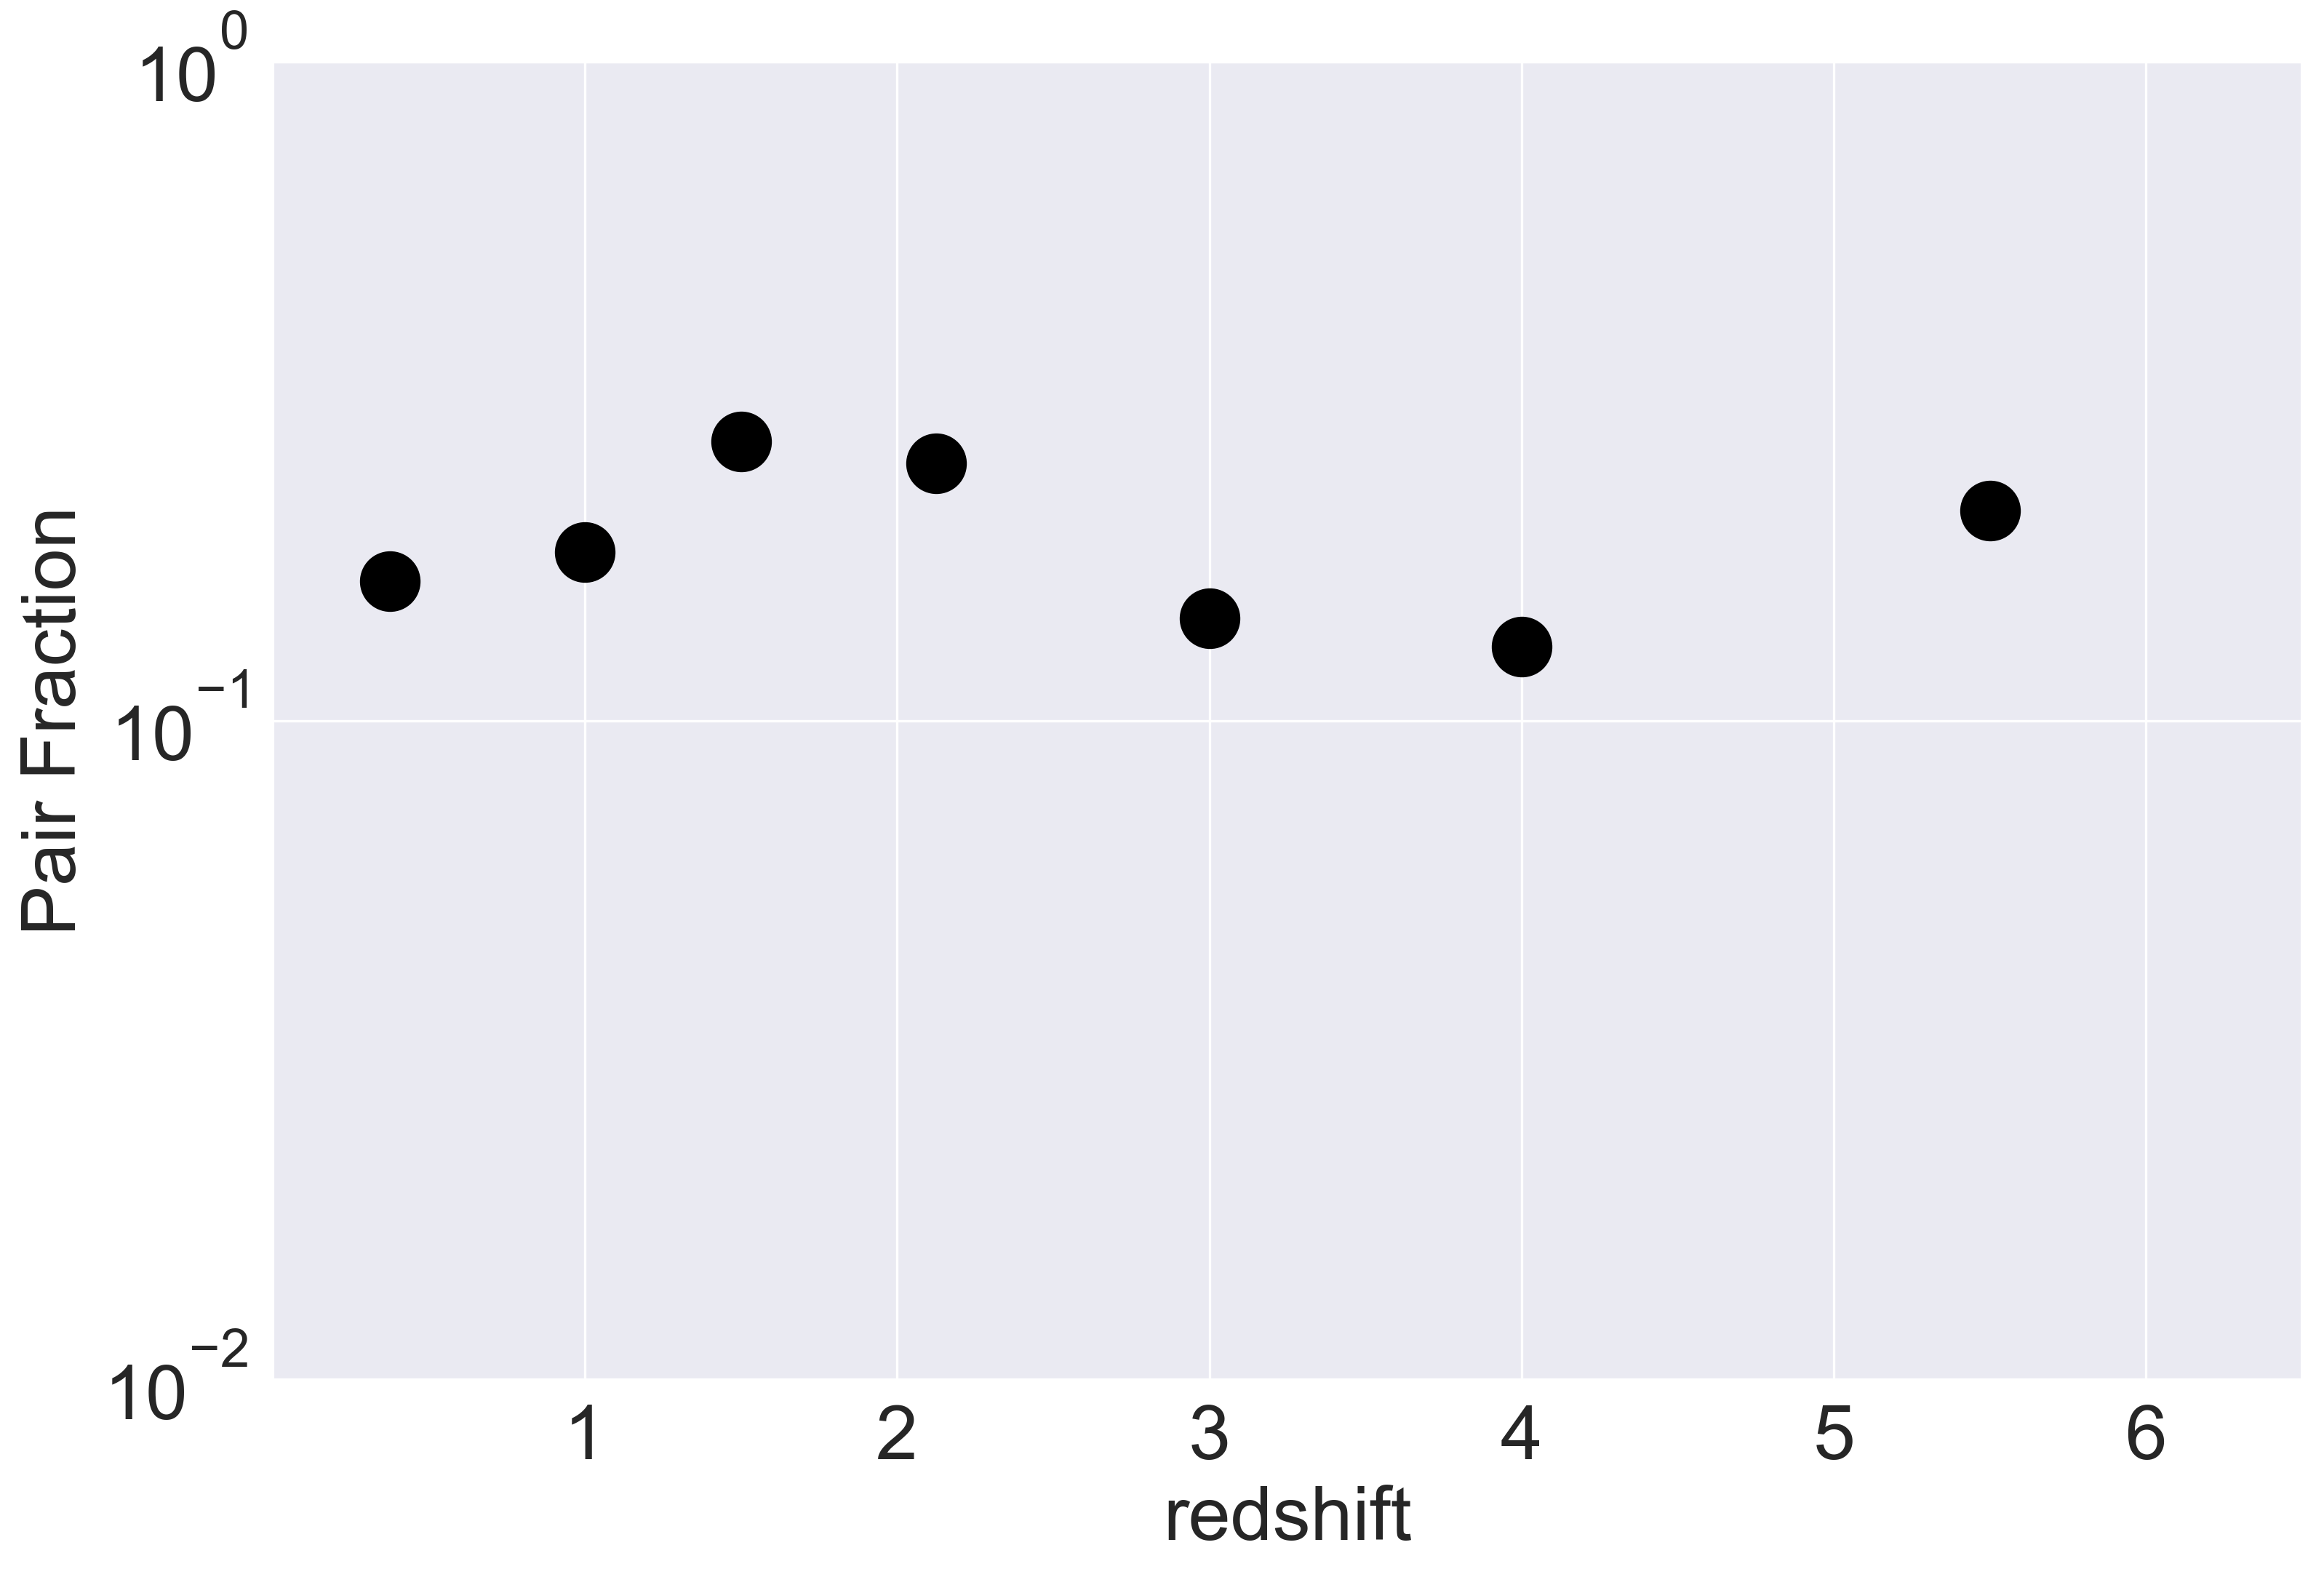

2675 possible primaries found, 59409 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 279
Pairs detected for this bin: 27
Pair fraction for this bin: 0.0967741935483871
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 561
Pairs detected for this bin: 78
Pair fraction for this bin: 0.13903743315508021
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 551
Pairs detected for this bin: 127
Pair fraction for this bin: 0.23049001814882034
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 736
Pairs detected for this bin: 171
Pair fraction for this bin: 0.23233695652173914
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 439
Pairs detected for this bin: 83
Pair fraction for this bin: 0.1890660592

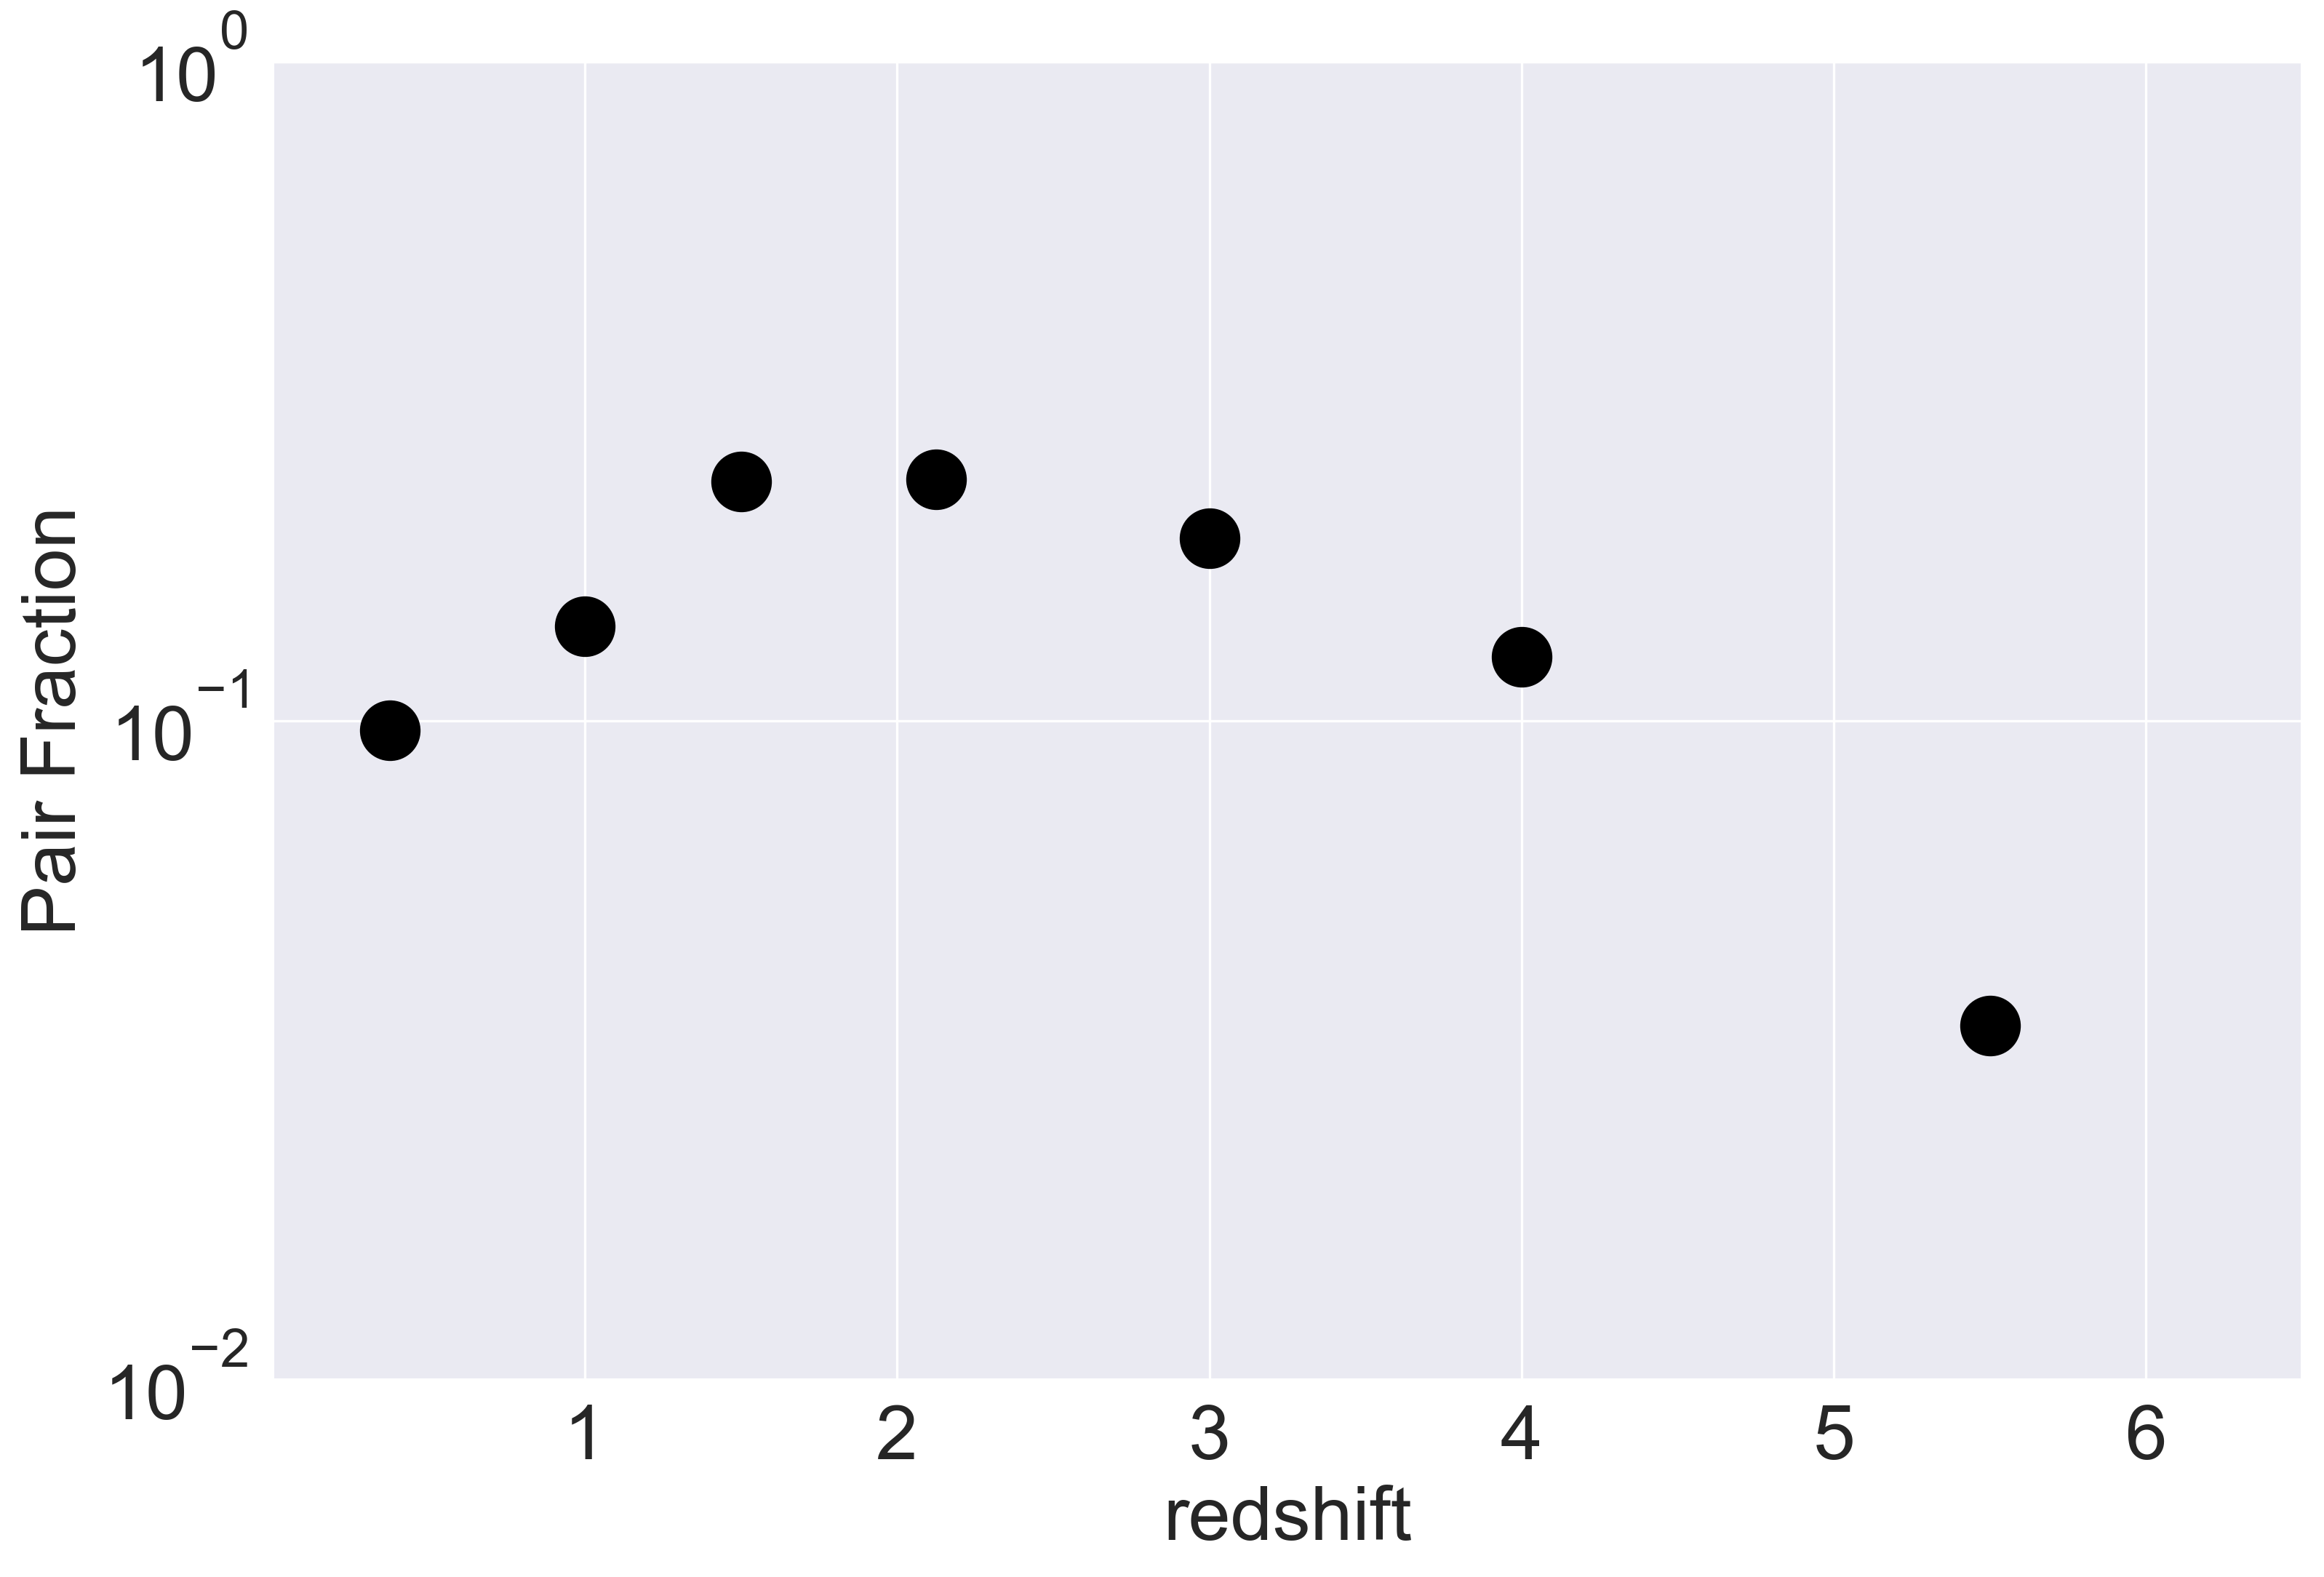

2734 possible primaries found, 58676 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 251
Pairs detected for this bin: 21
Pair fraction for this bin: 0.08366533864541832
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 662
Pairs detected for this bin: 144
Pair fraction for this bin: 0.2175226586102719
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 675
Pairs detected for this bin: 153
Pair fraction for this bin: 0.22666666666666666
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 726
Pairs detected for this bin: 162
Pair fraction for this bin: 0.2231404958677686
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 316
Pairs detected for this bin: 45
Pair fraction for this bin: 0.1424050632

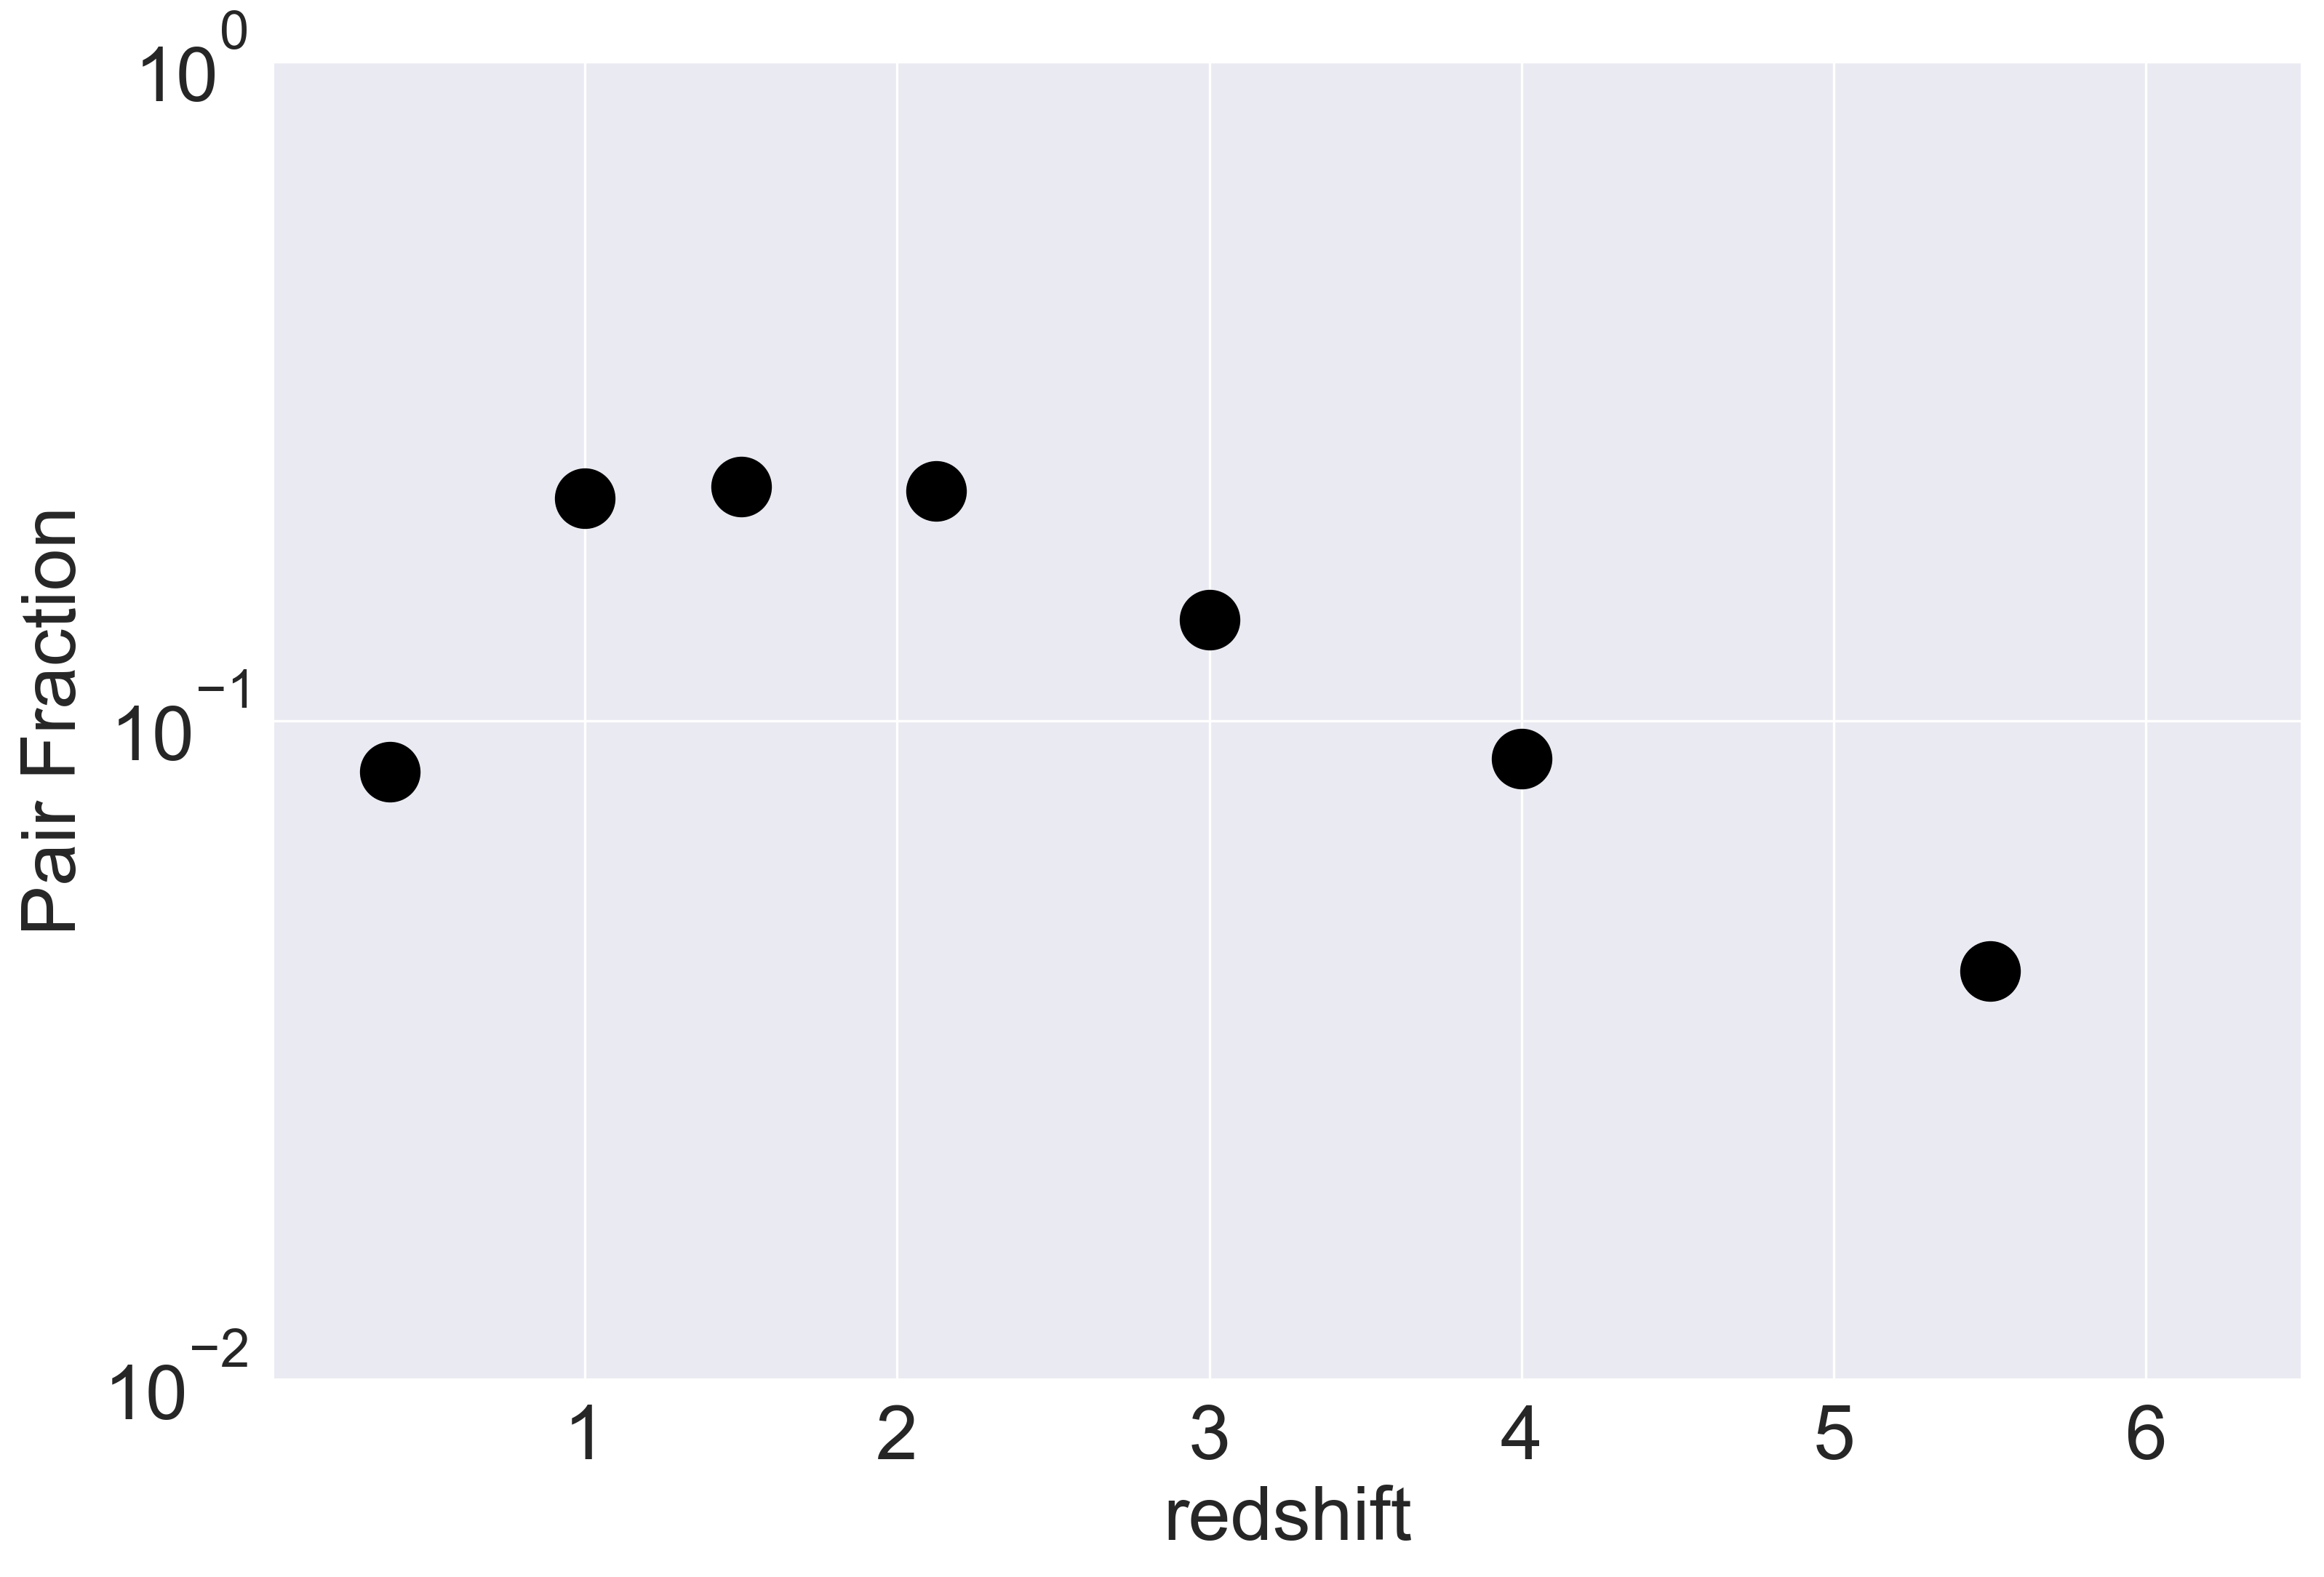

In [14]:
xyz_info = pairs_plots(dash1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1)
yxz_info = pairs_plots(dash1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1)
zyx_info = pairs_plots(dash1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1)

1040 possible primaries found, 26592 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 158
Pairs detected for this bin: 19
Pair fraction for this bin: 0.12025316455696203
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 291
Pairs detected for this bin: 29
Pair fraction for this bin: 0.09965635738831616
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 210
Pairs detected for this bin: 22
Pair fraction for this bin: 0.10476190476190476
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 231
Pairs detected for this bin: 27
Pair fraction for this bin: 0.11688311688311688
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 114
Pairs detected for this bin: 32
Pair fraction for this bin: 0.28070175438

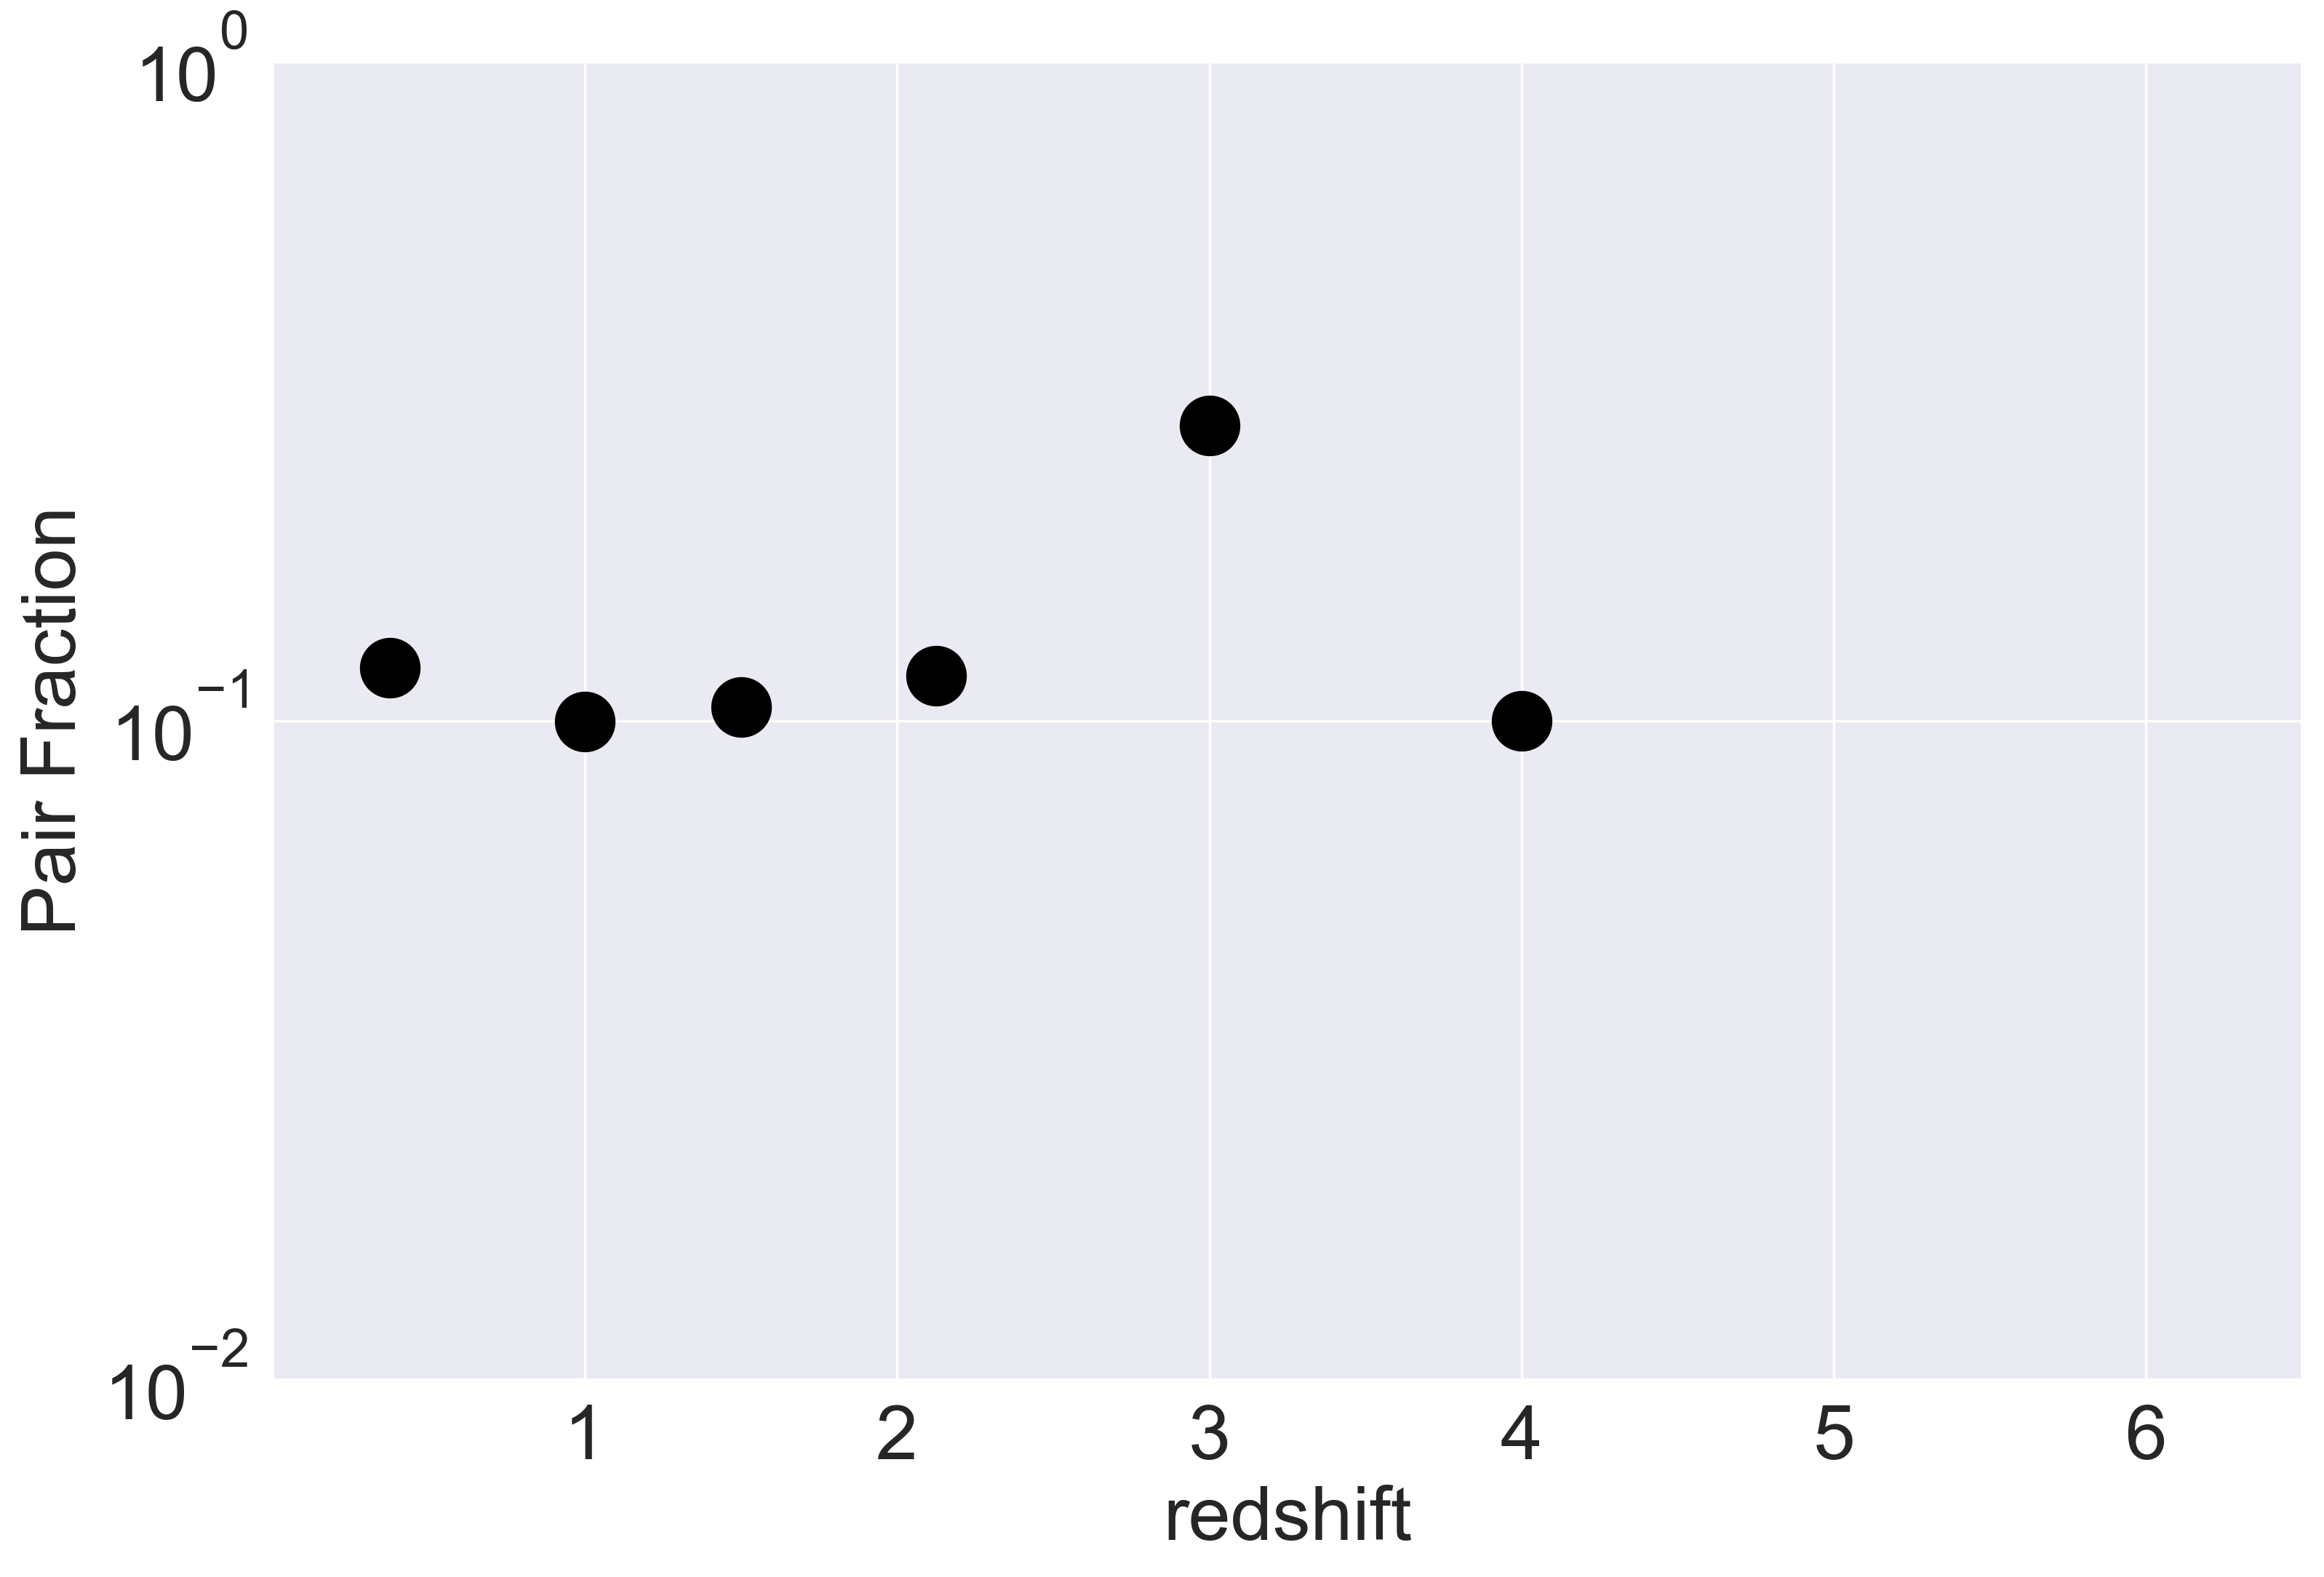

1209 possible primaries found, 27093 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 277
Pairs detected for this bin: 29
Pair fraction for this bin: 0.10469314079422383
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 208
Pairs detected for this bin: 20
Pair fraction for this bin: 0.09615384615384616
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 294
Pairs detected for this bin: 34
Pair fraction for this bin: 0.11564625850340136
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 248
Pairs detected for this bin: 23
Pair fraction for this bin: 0.09274193548387097
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 162
Pairs detected for this bin: 19
Pair fraction for this bin: 0.11728395061

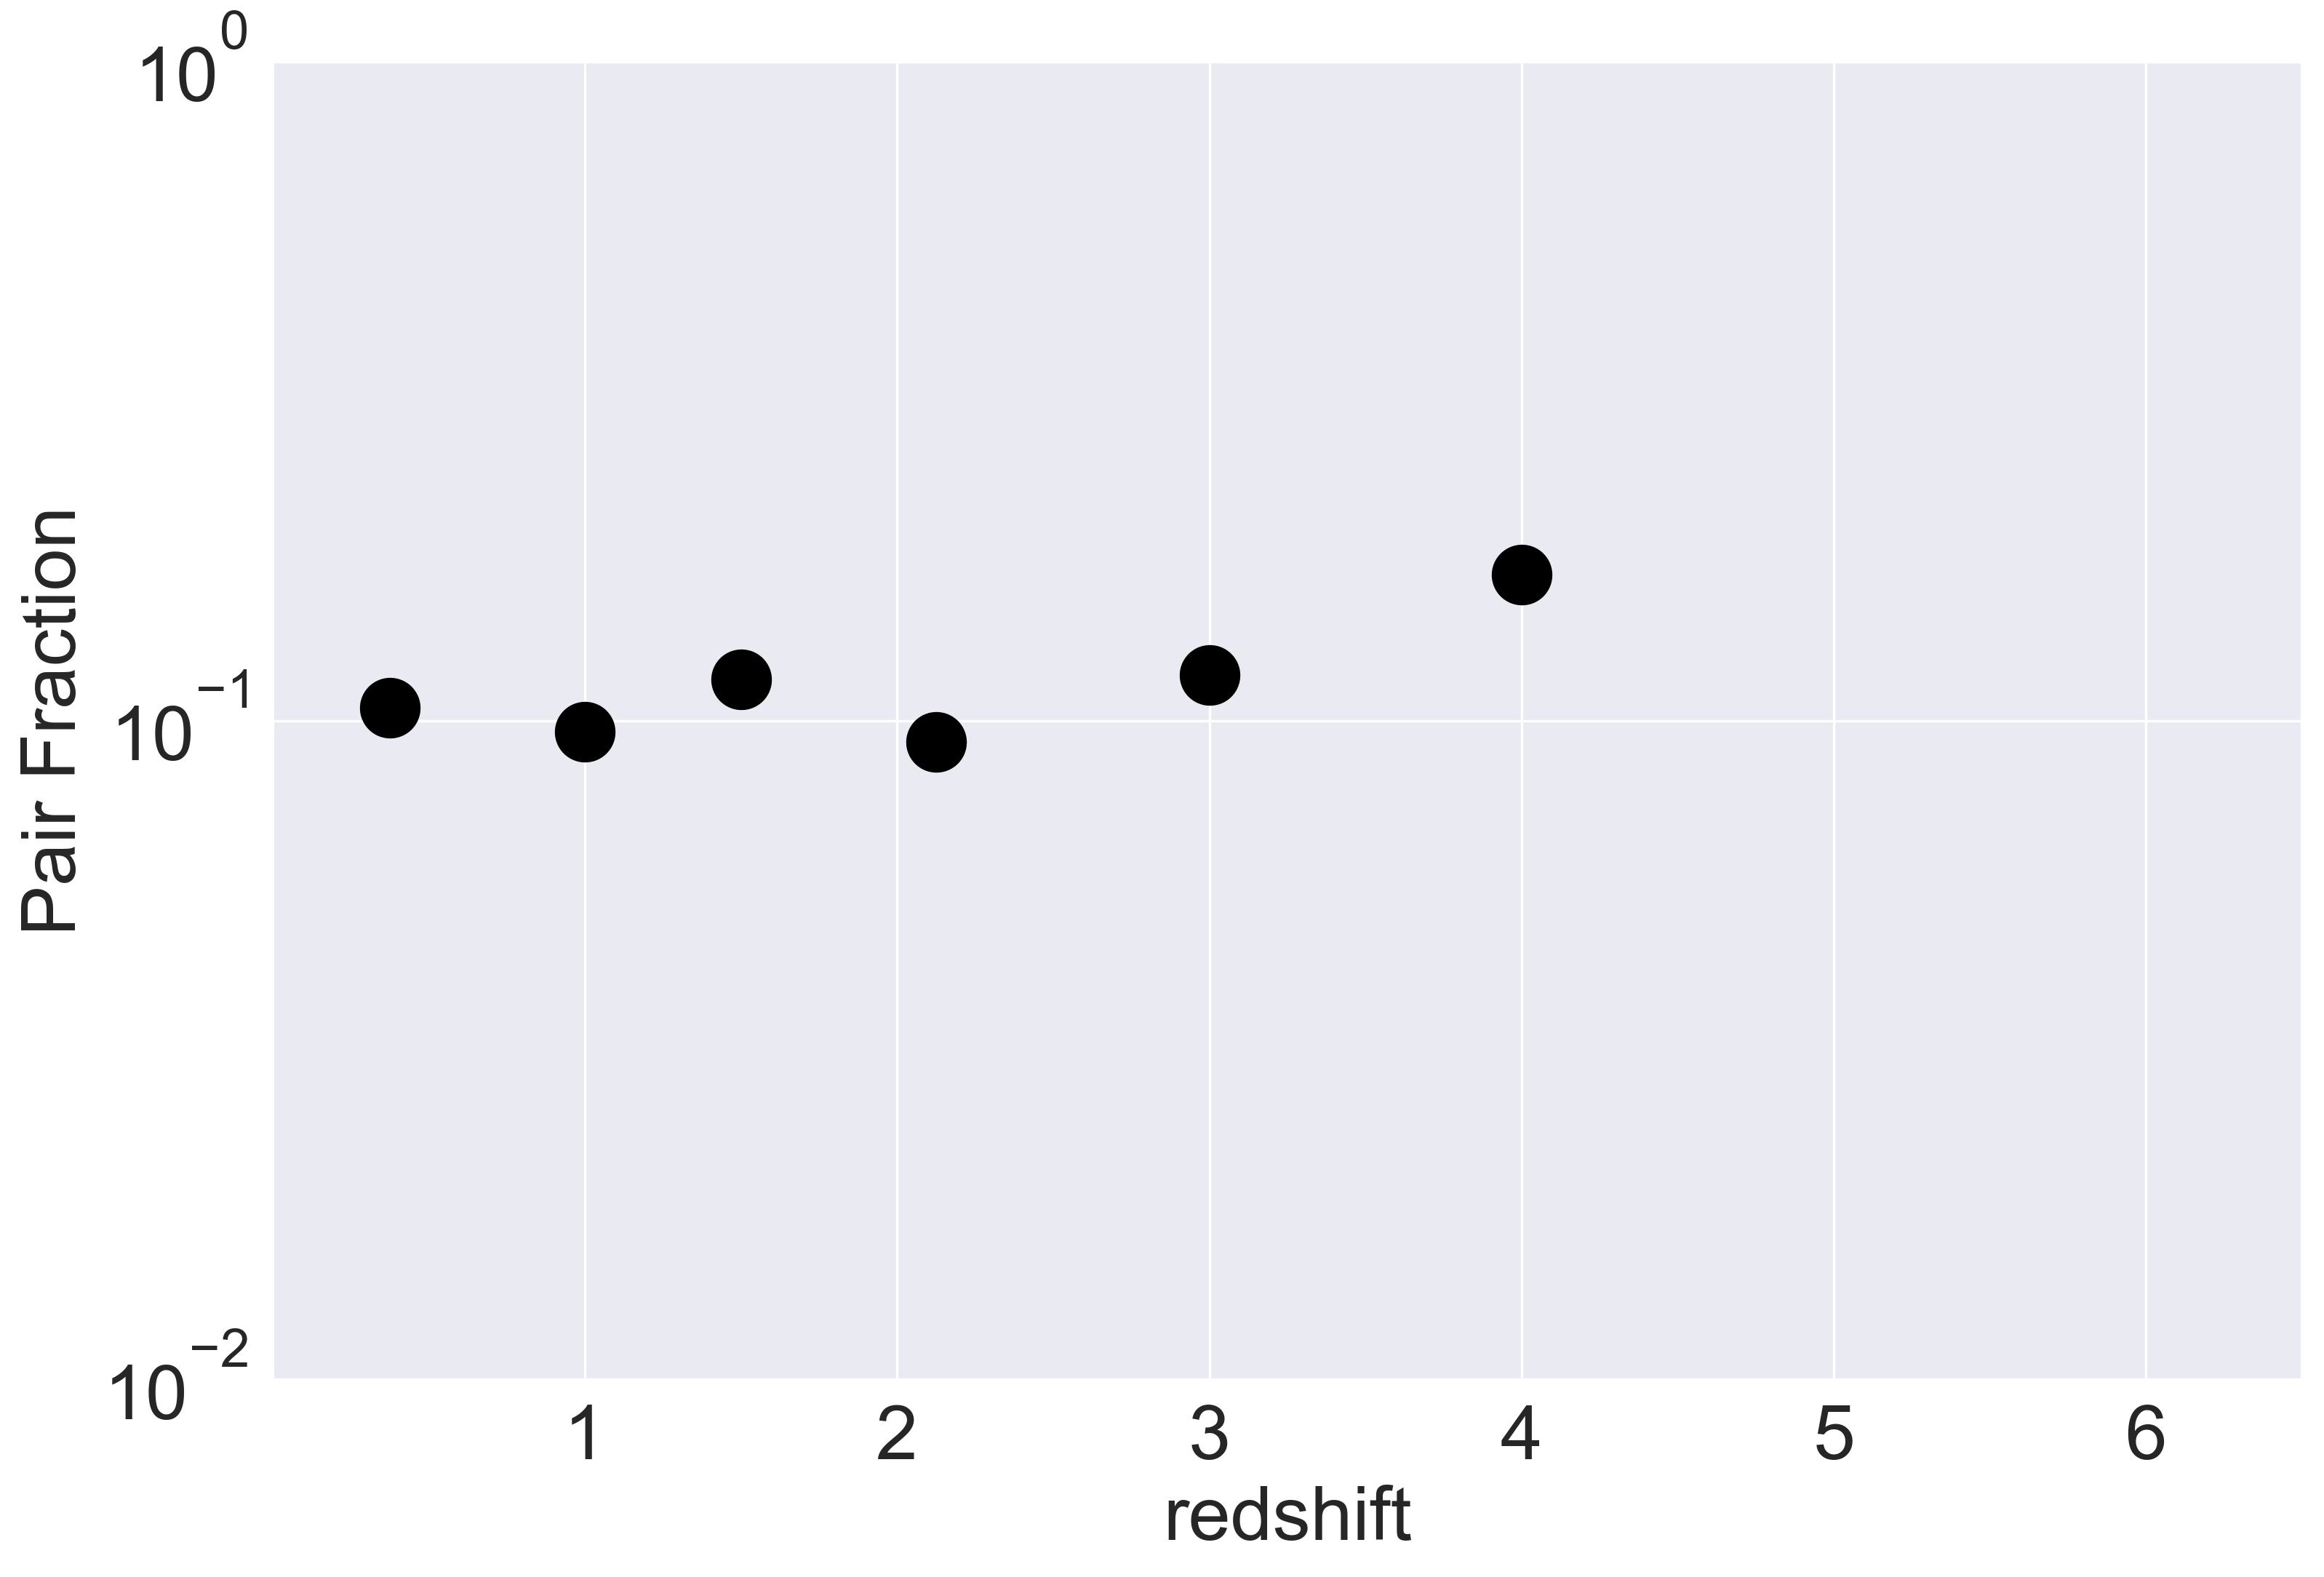

1089 possible primaries found, 26250 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 158
Pairs detected for this bin: 16
Pair fraction for this bin: 0.10126582278481013
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 226
Pairs detected for this bin: 23
Pair fraction for this bin: 0.10176991150442478
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 297
Pairs detected for this bin: 41
Pair fraction for this bin: 0.13804713804713806
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 298
Pairs detected for this bin: 37
Pair fraction for this bin: 0.12416107382550336
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 93
Pairs detected for this bin: 14
Pair fraction for this bin: 0.150537634408

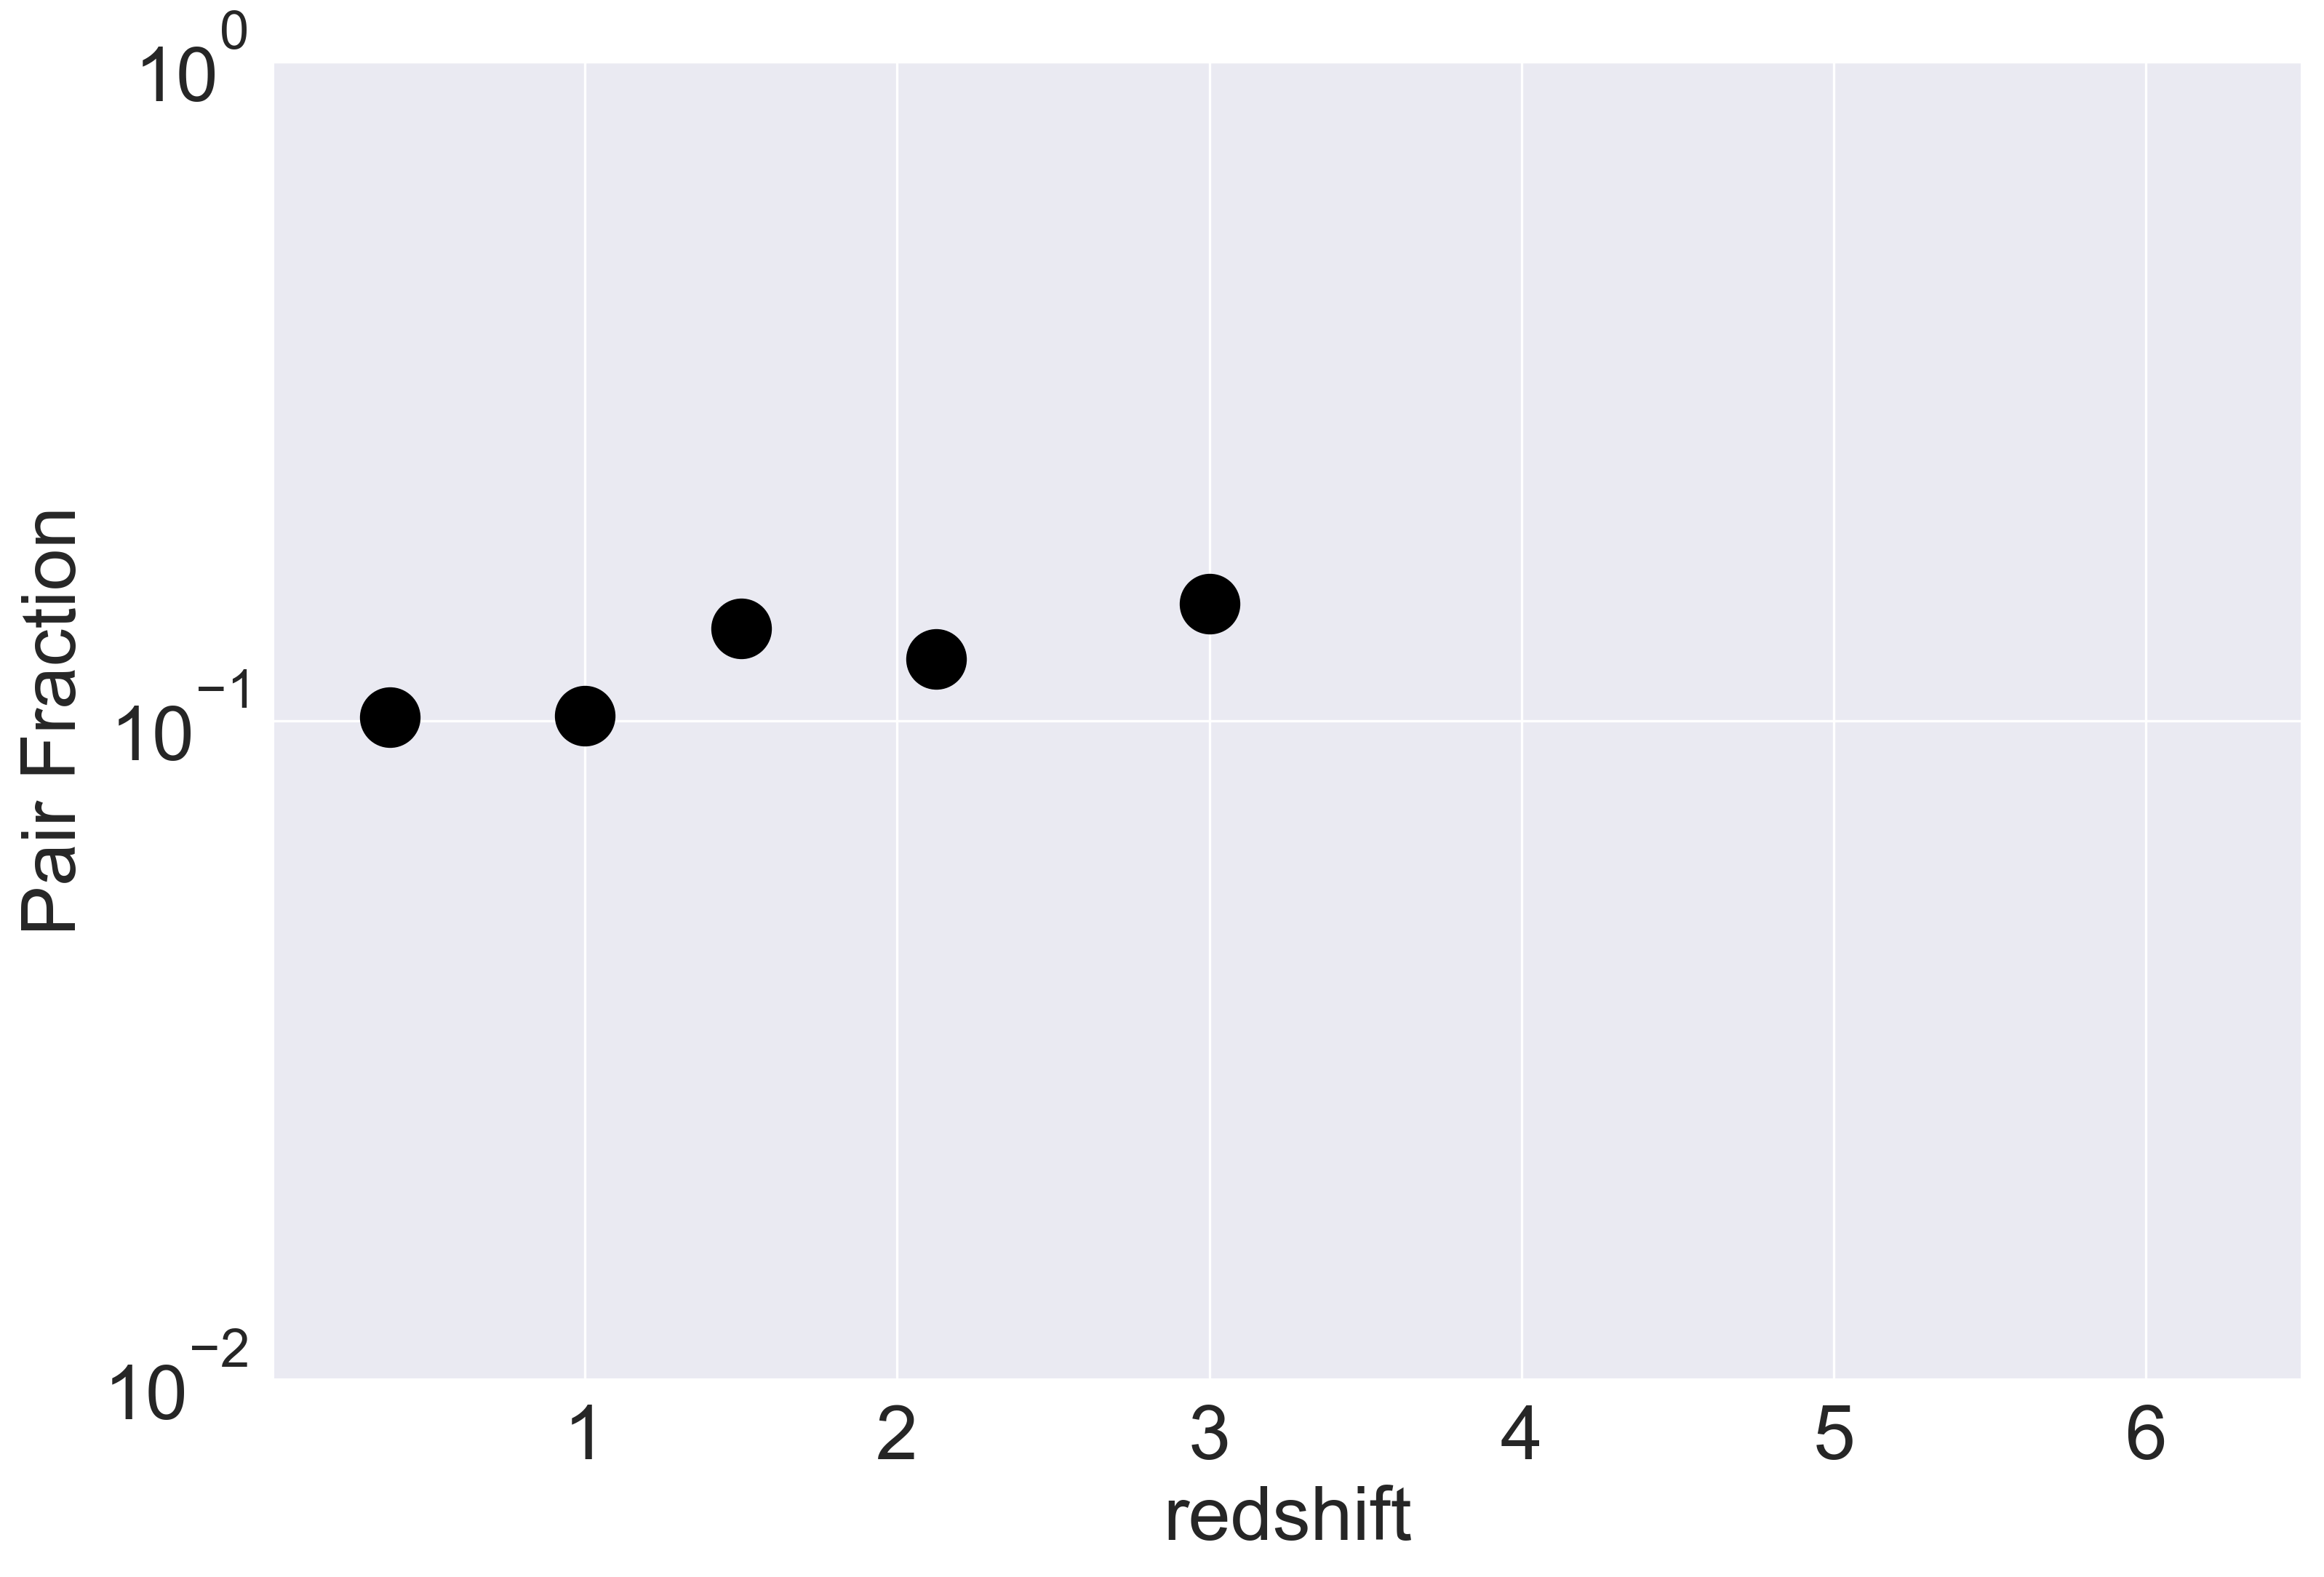

In [40]:
xyz_infoil1 = pairs_plots(il1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1)
yxz_infoil1 = pairs_plots(il1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1)
zyx_infoil1 = pairs_plots(il1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1)

2771 possible primaries found, 59045 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 405
Pairs detected for this bin: 136
Pair fraction for this bin: 0.3358024691358025
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 488
Pairs detected for this bin: 194
Pair fraction for this bin: 0.3975409836065574
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 754
Pairs detected for this bin: 400
Pair fraction for this bin: 0.5305039787798409
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 717
Pairs detected for this bin: 348
Pair fraction for this bin: 0.48535564853556484
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 329
Pairs detected for this bin: 111
Pair fraction for this bin: 0.337386018

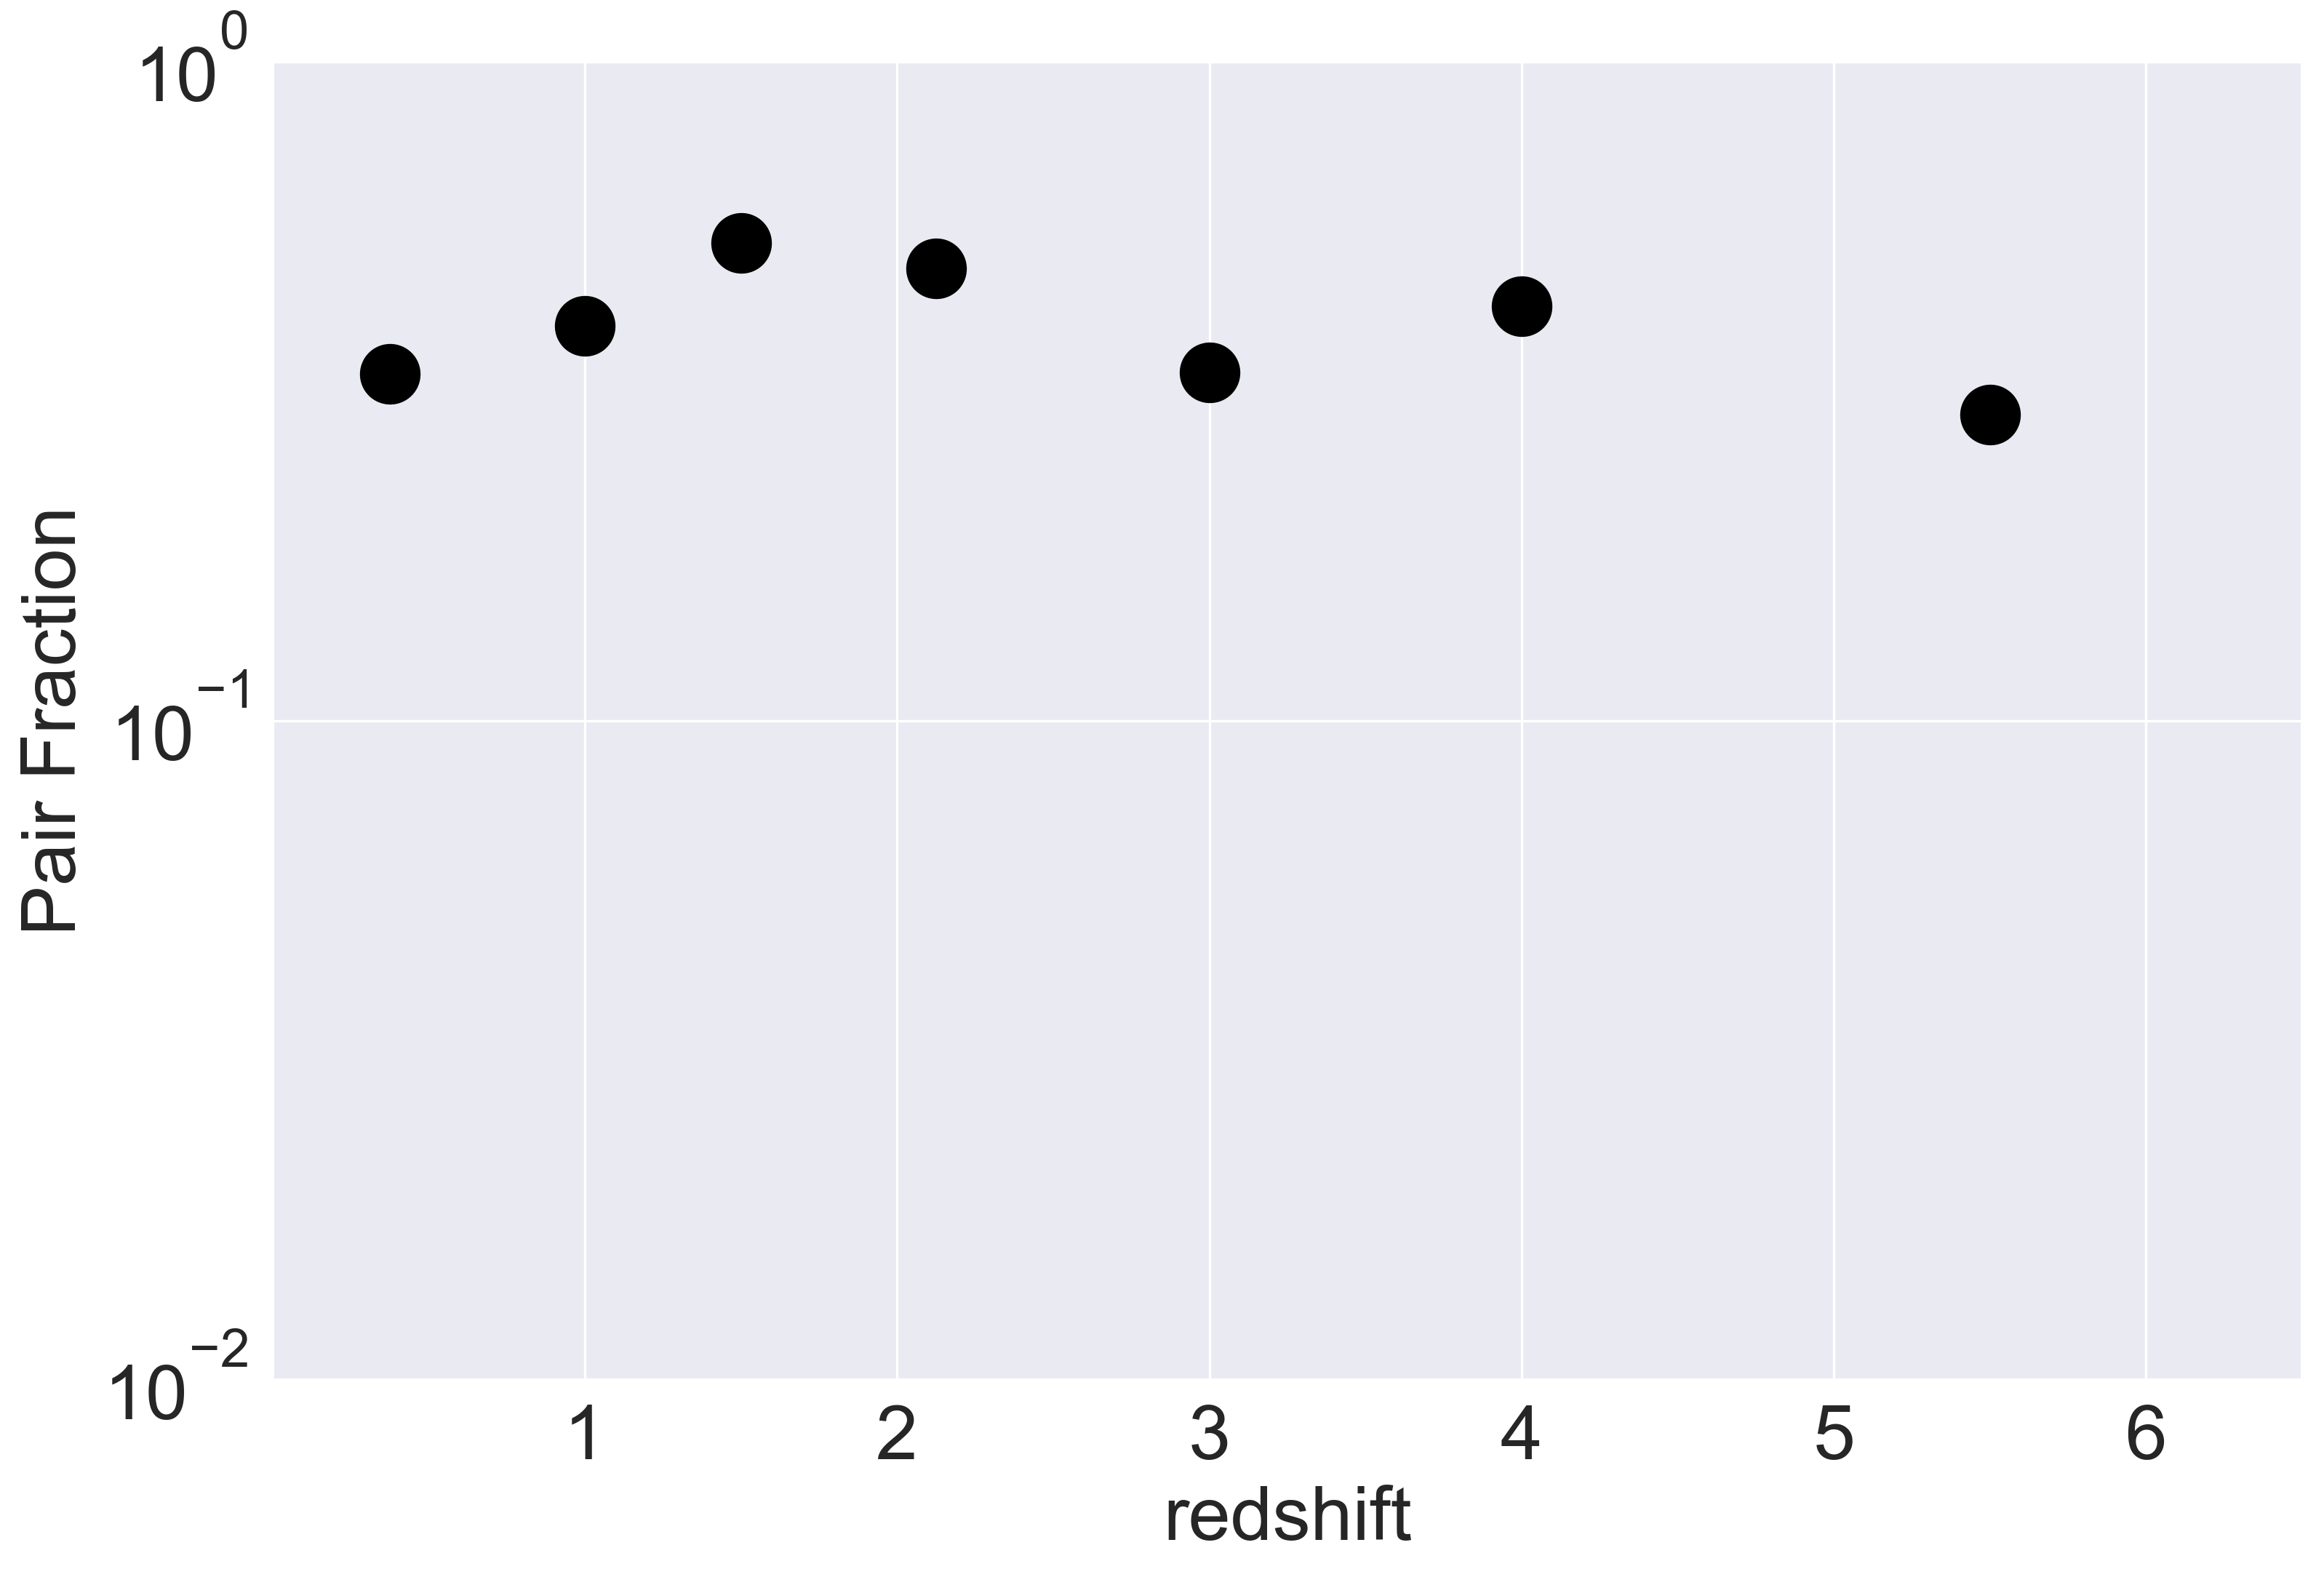

2675 possible primaries found, 59409 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 279
Pairs detected for this bin: 58
Pair fraction for this bin: 0.2078853046594982
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 561
Pairs detected for this bin: 204
Pair fraction for this bin: 0.36363636363636365
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 551
Pairs detected for this bin: 270
Pair fraction for this bin: 0.4900181488203267
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 736
Pairs detected for this bin: 391
Pair fraction for this bin: 0.53125
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 439
Pairs detected for this bin: 202
Pair fraction for this bin: 0.4601366742596811
----

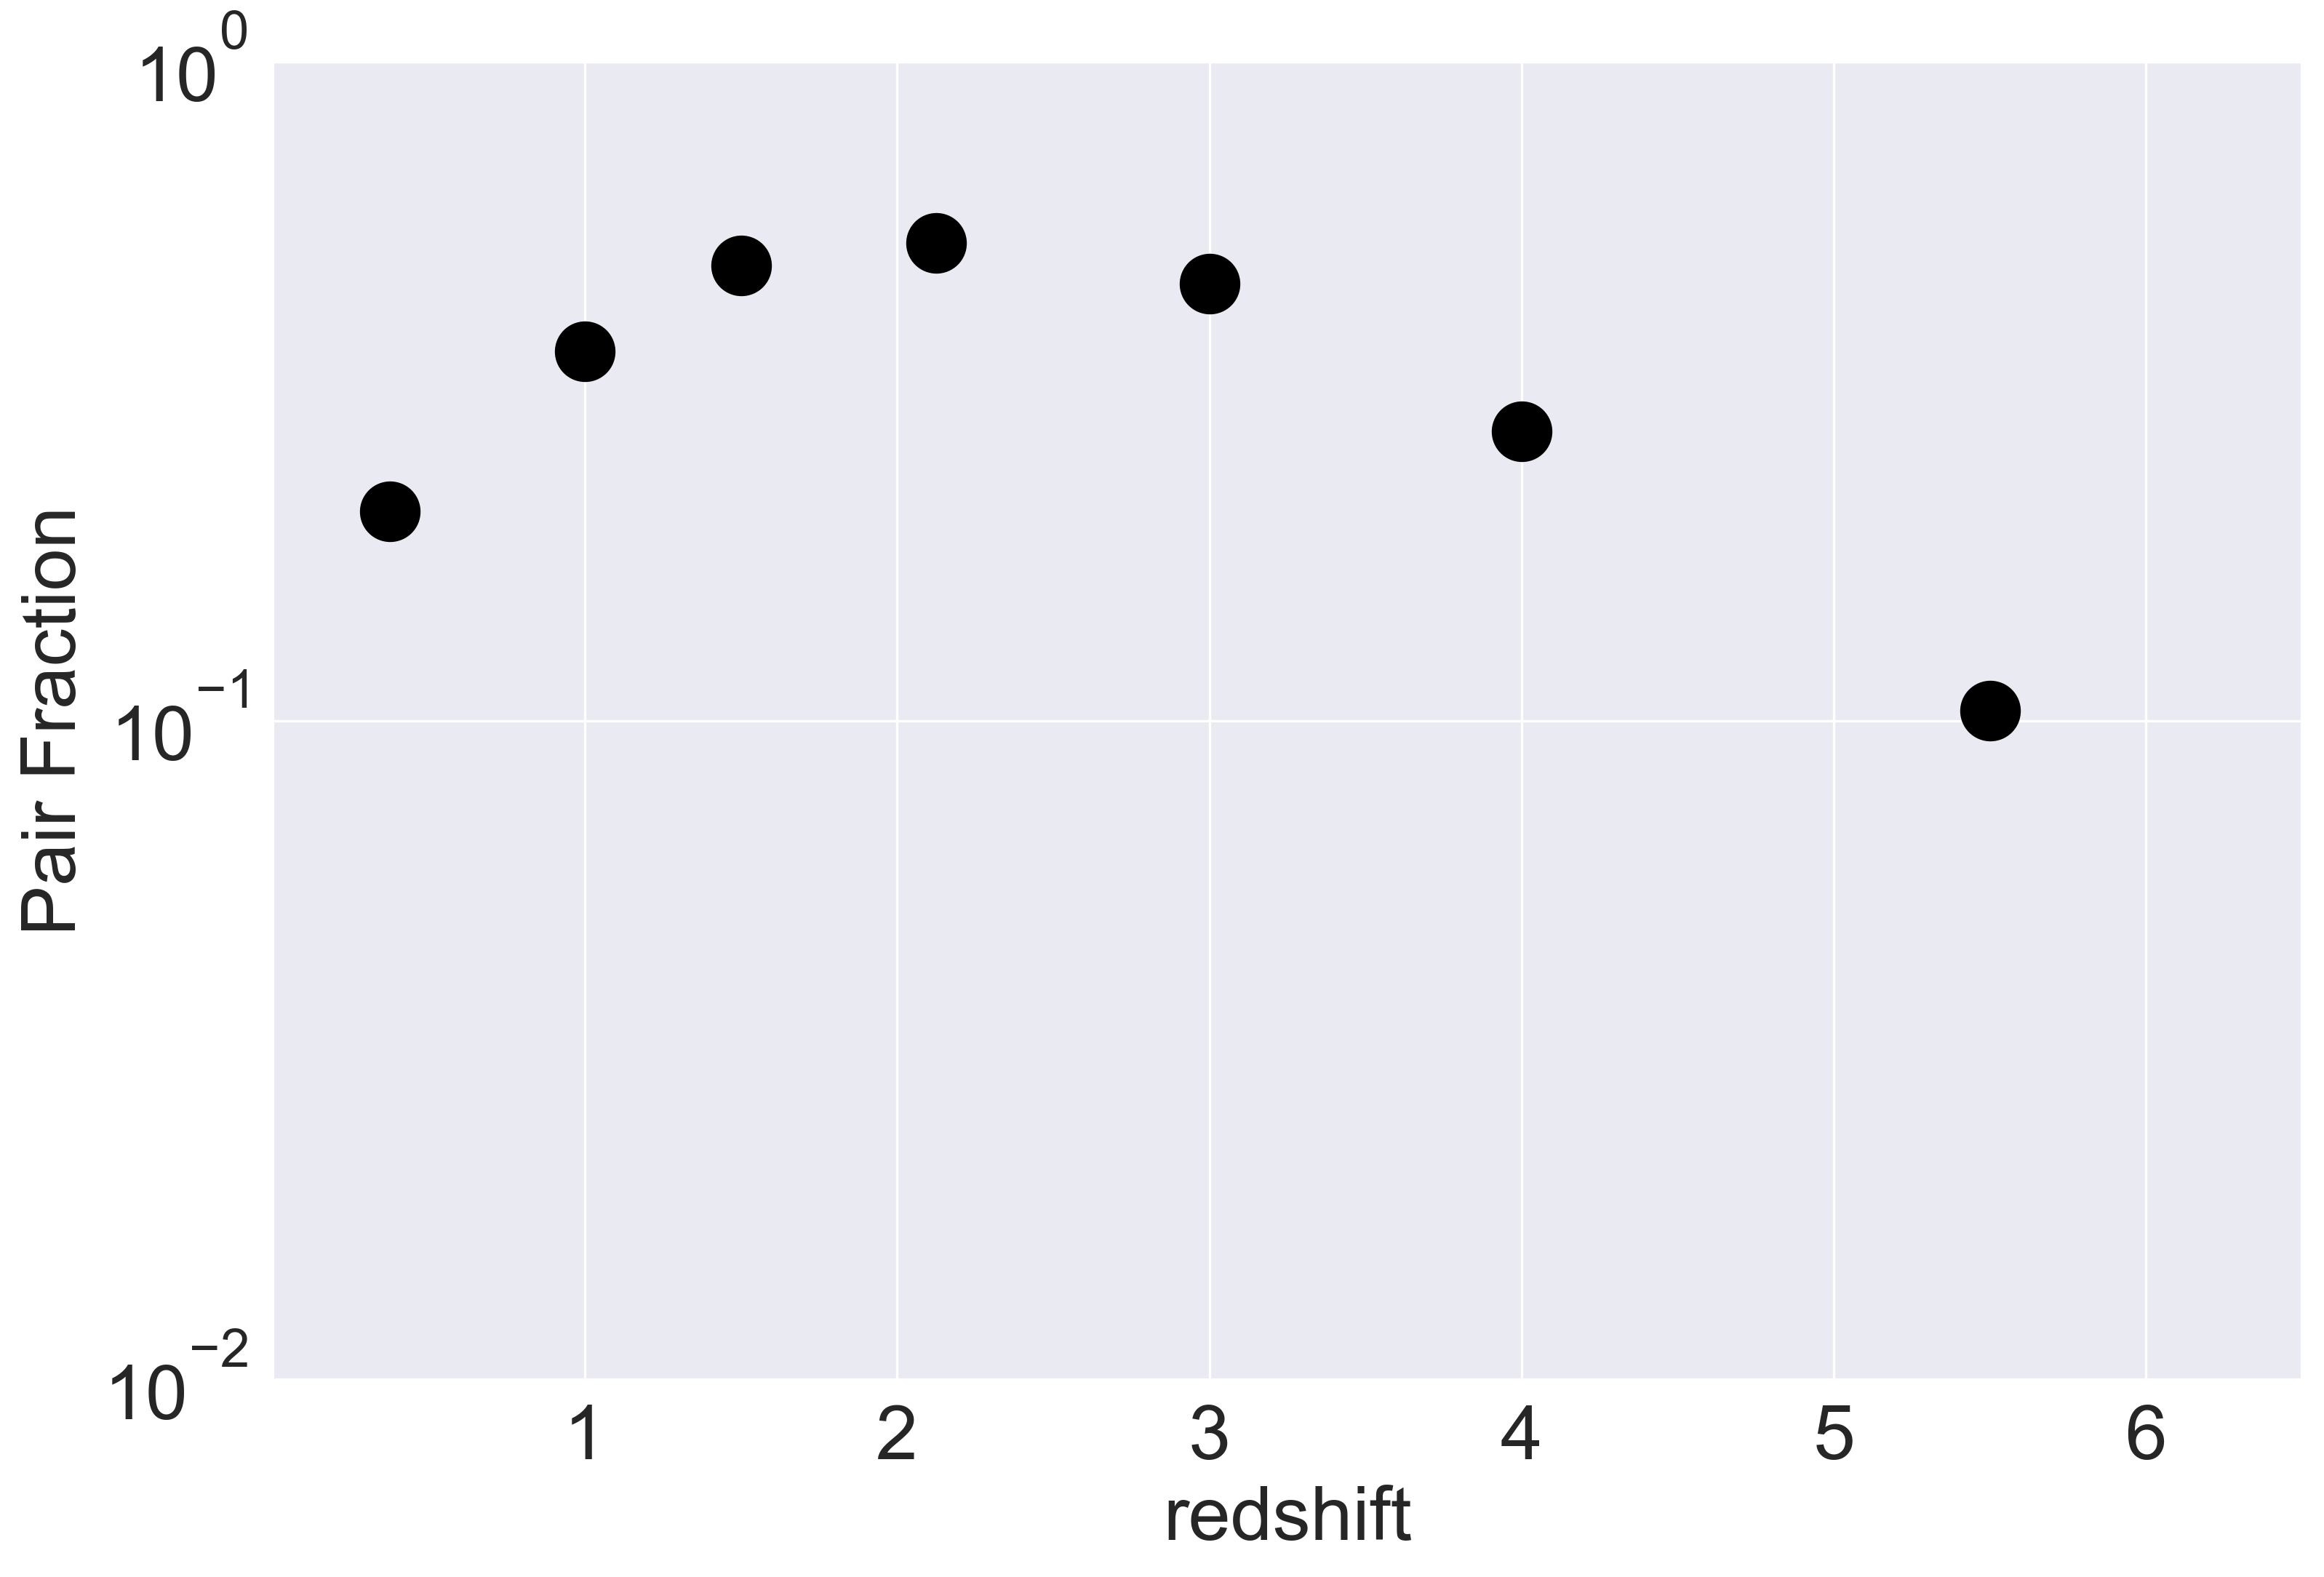

2734 possible primaries found, 58676 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 251
Pairs detected for this bin: 47
Pair fraction for this bin: 0.18725099601593626
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 662
Pairs detected for this bin: 303
Pair fraction for this bin: 0.45770392749244715
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 675
Pairs detected for this bin: 301
Pair fraction for this bin: 0.44592592592592595
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 726
Pairs detected for this bin: 354
Pair fraction for this bin: 0.48760330578512395
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 316
Pairs detected for this bin: 120
Pair fraction for this bin: 0.3797468

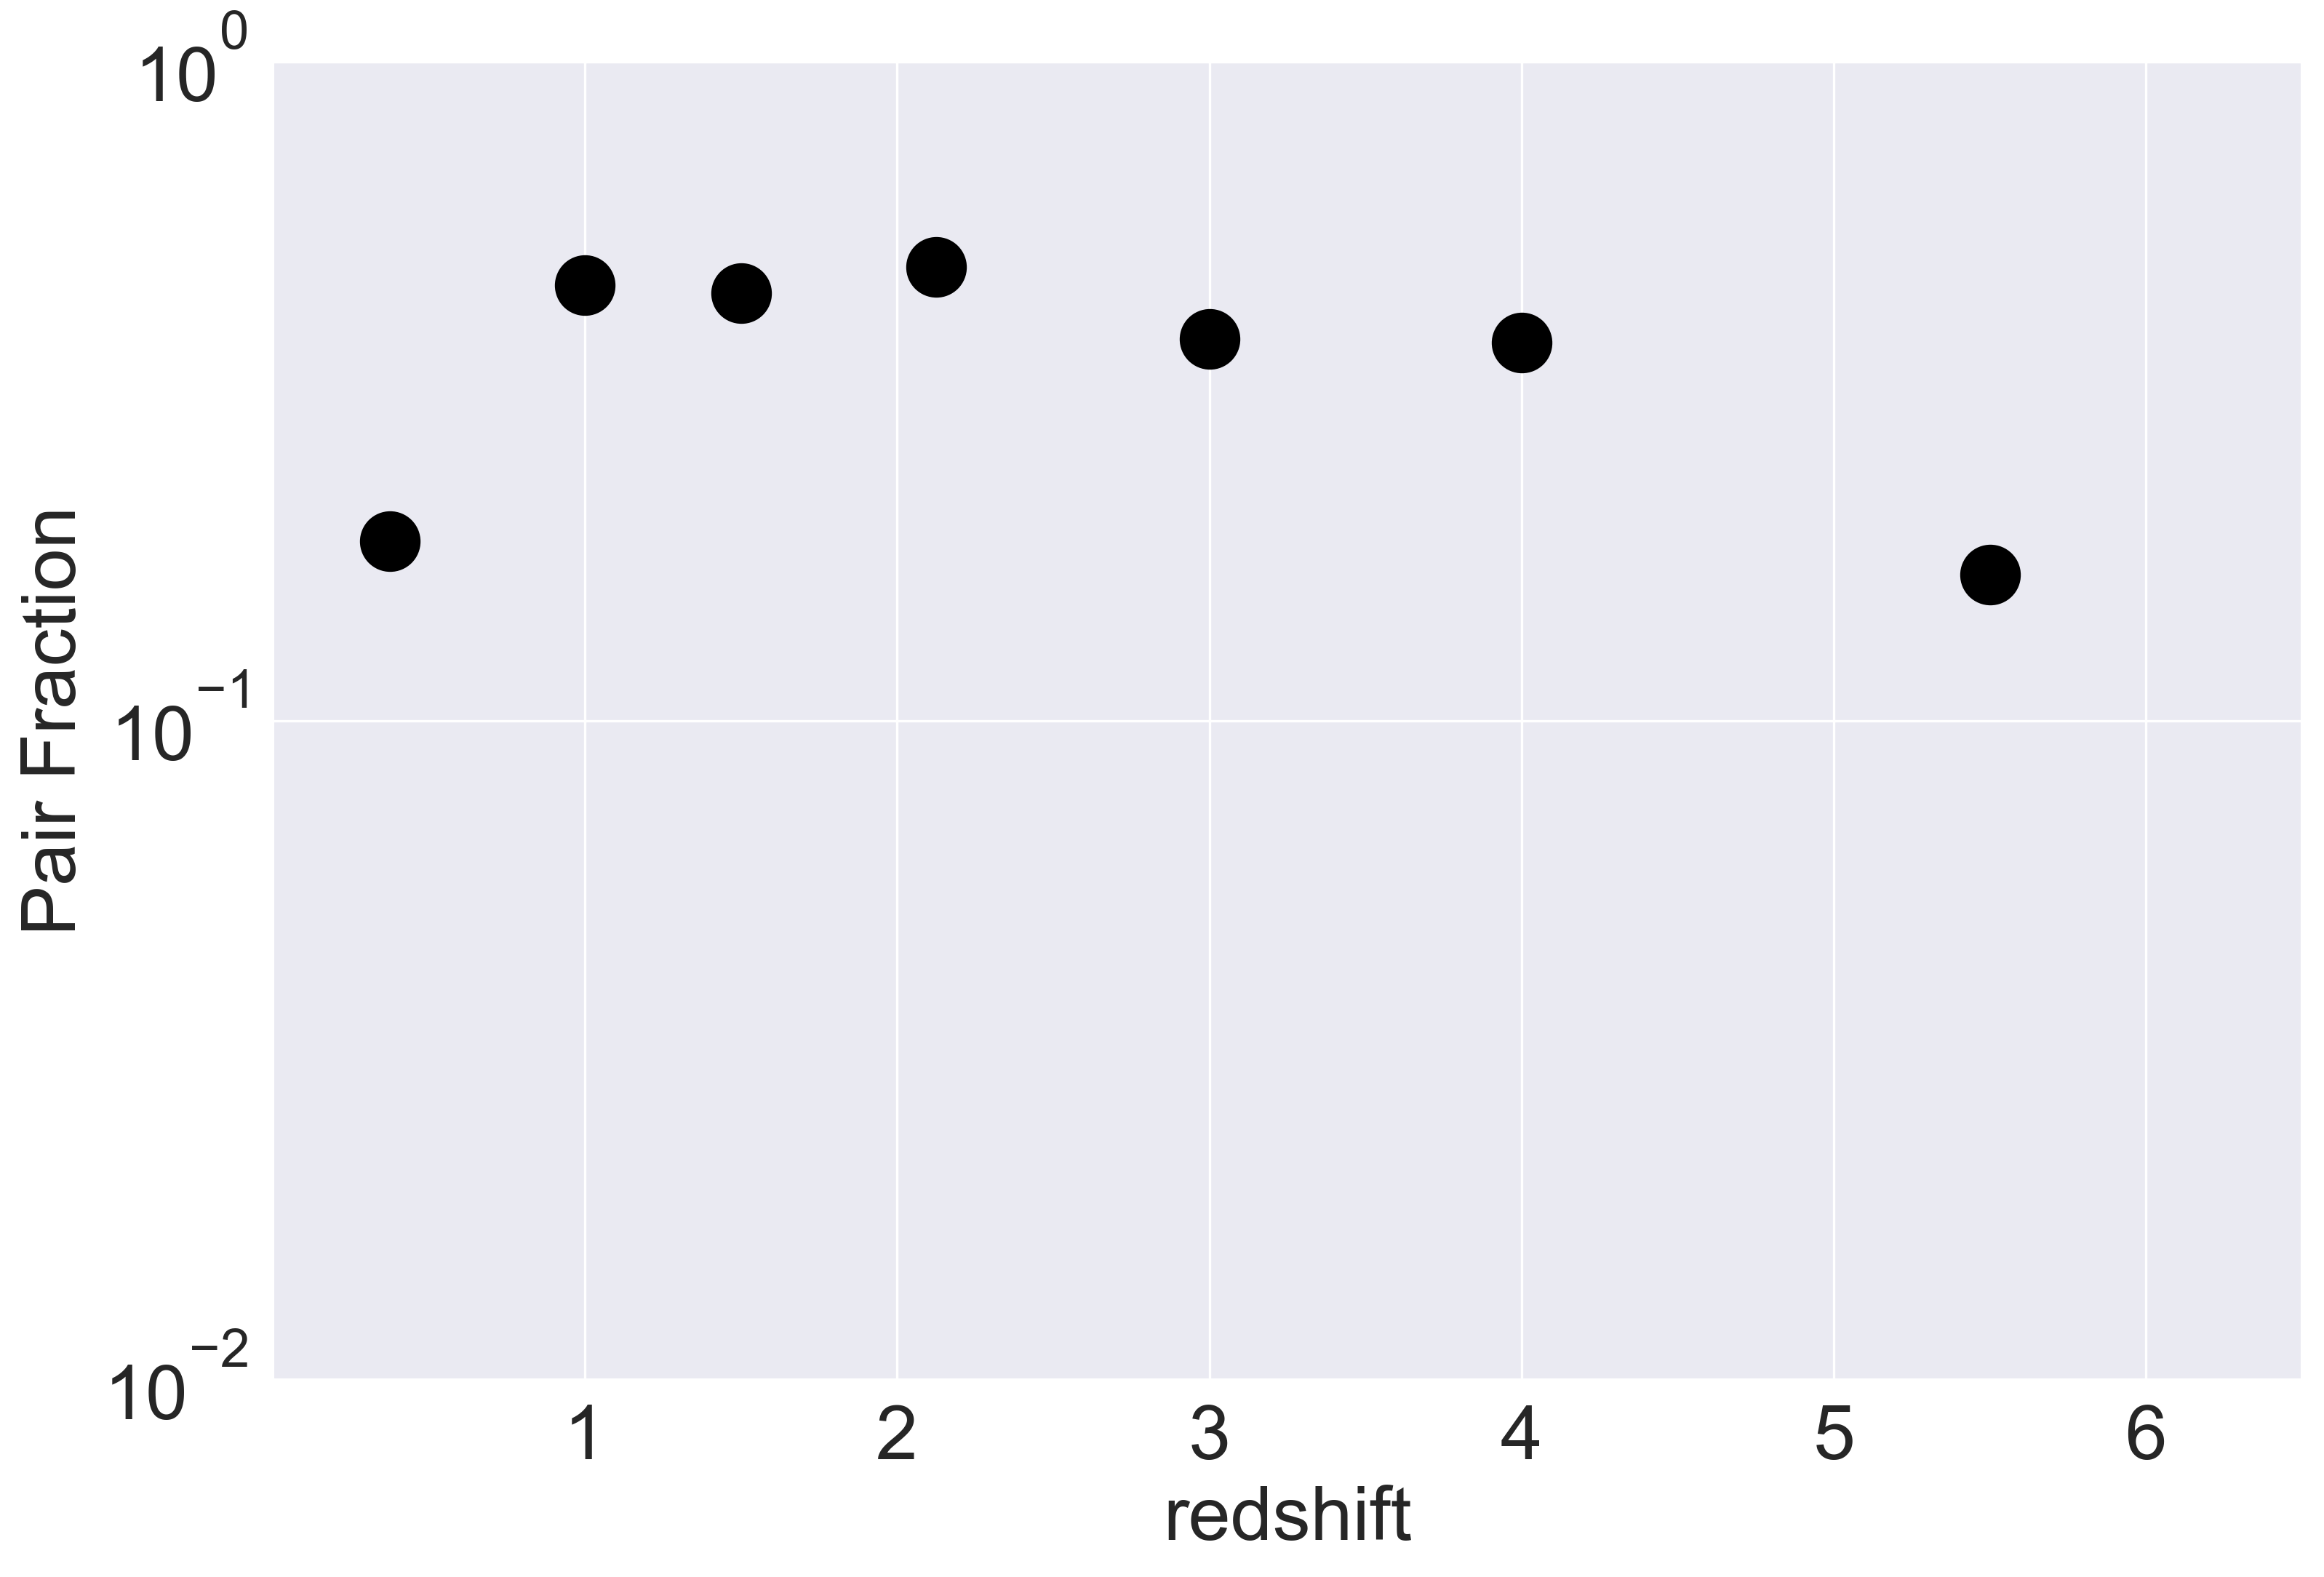

In [15]:
xyz_info01 = pairs_plots(dash1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1,mfrac=0.1)
yxz_info01 = pairs_plots(dash1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1,mfrac=0.1)
zyx_info01 = pairs_plots(dash1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1,mfrac=0.1)

15747 possible primaries found, 124206 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 1674
Pairs detected for this bin: 310
Pair fraction for this bin: 0.18518518518518517
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 2467
Pairs detected for this bin: 551
Pair fraction for this bin: 0.22334819618970408
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 3629
Pairs detected for this bin: 1010
Pair fraction for this bin: 0.27831358500964454
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 4190
Pairs detected for this bin: 993
Pair fraction for this bin: 0.2369928400954654
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 2693
Pairs detected for this bin: 612
Pair fraction for this bin: 0

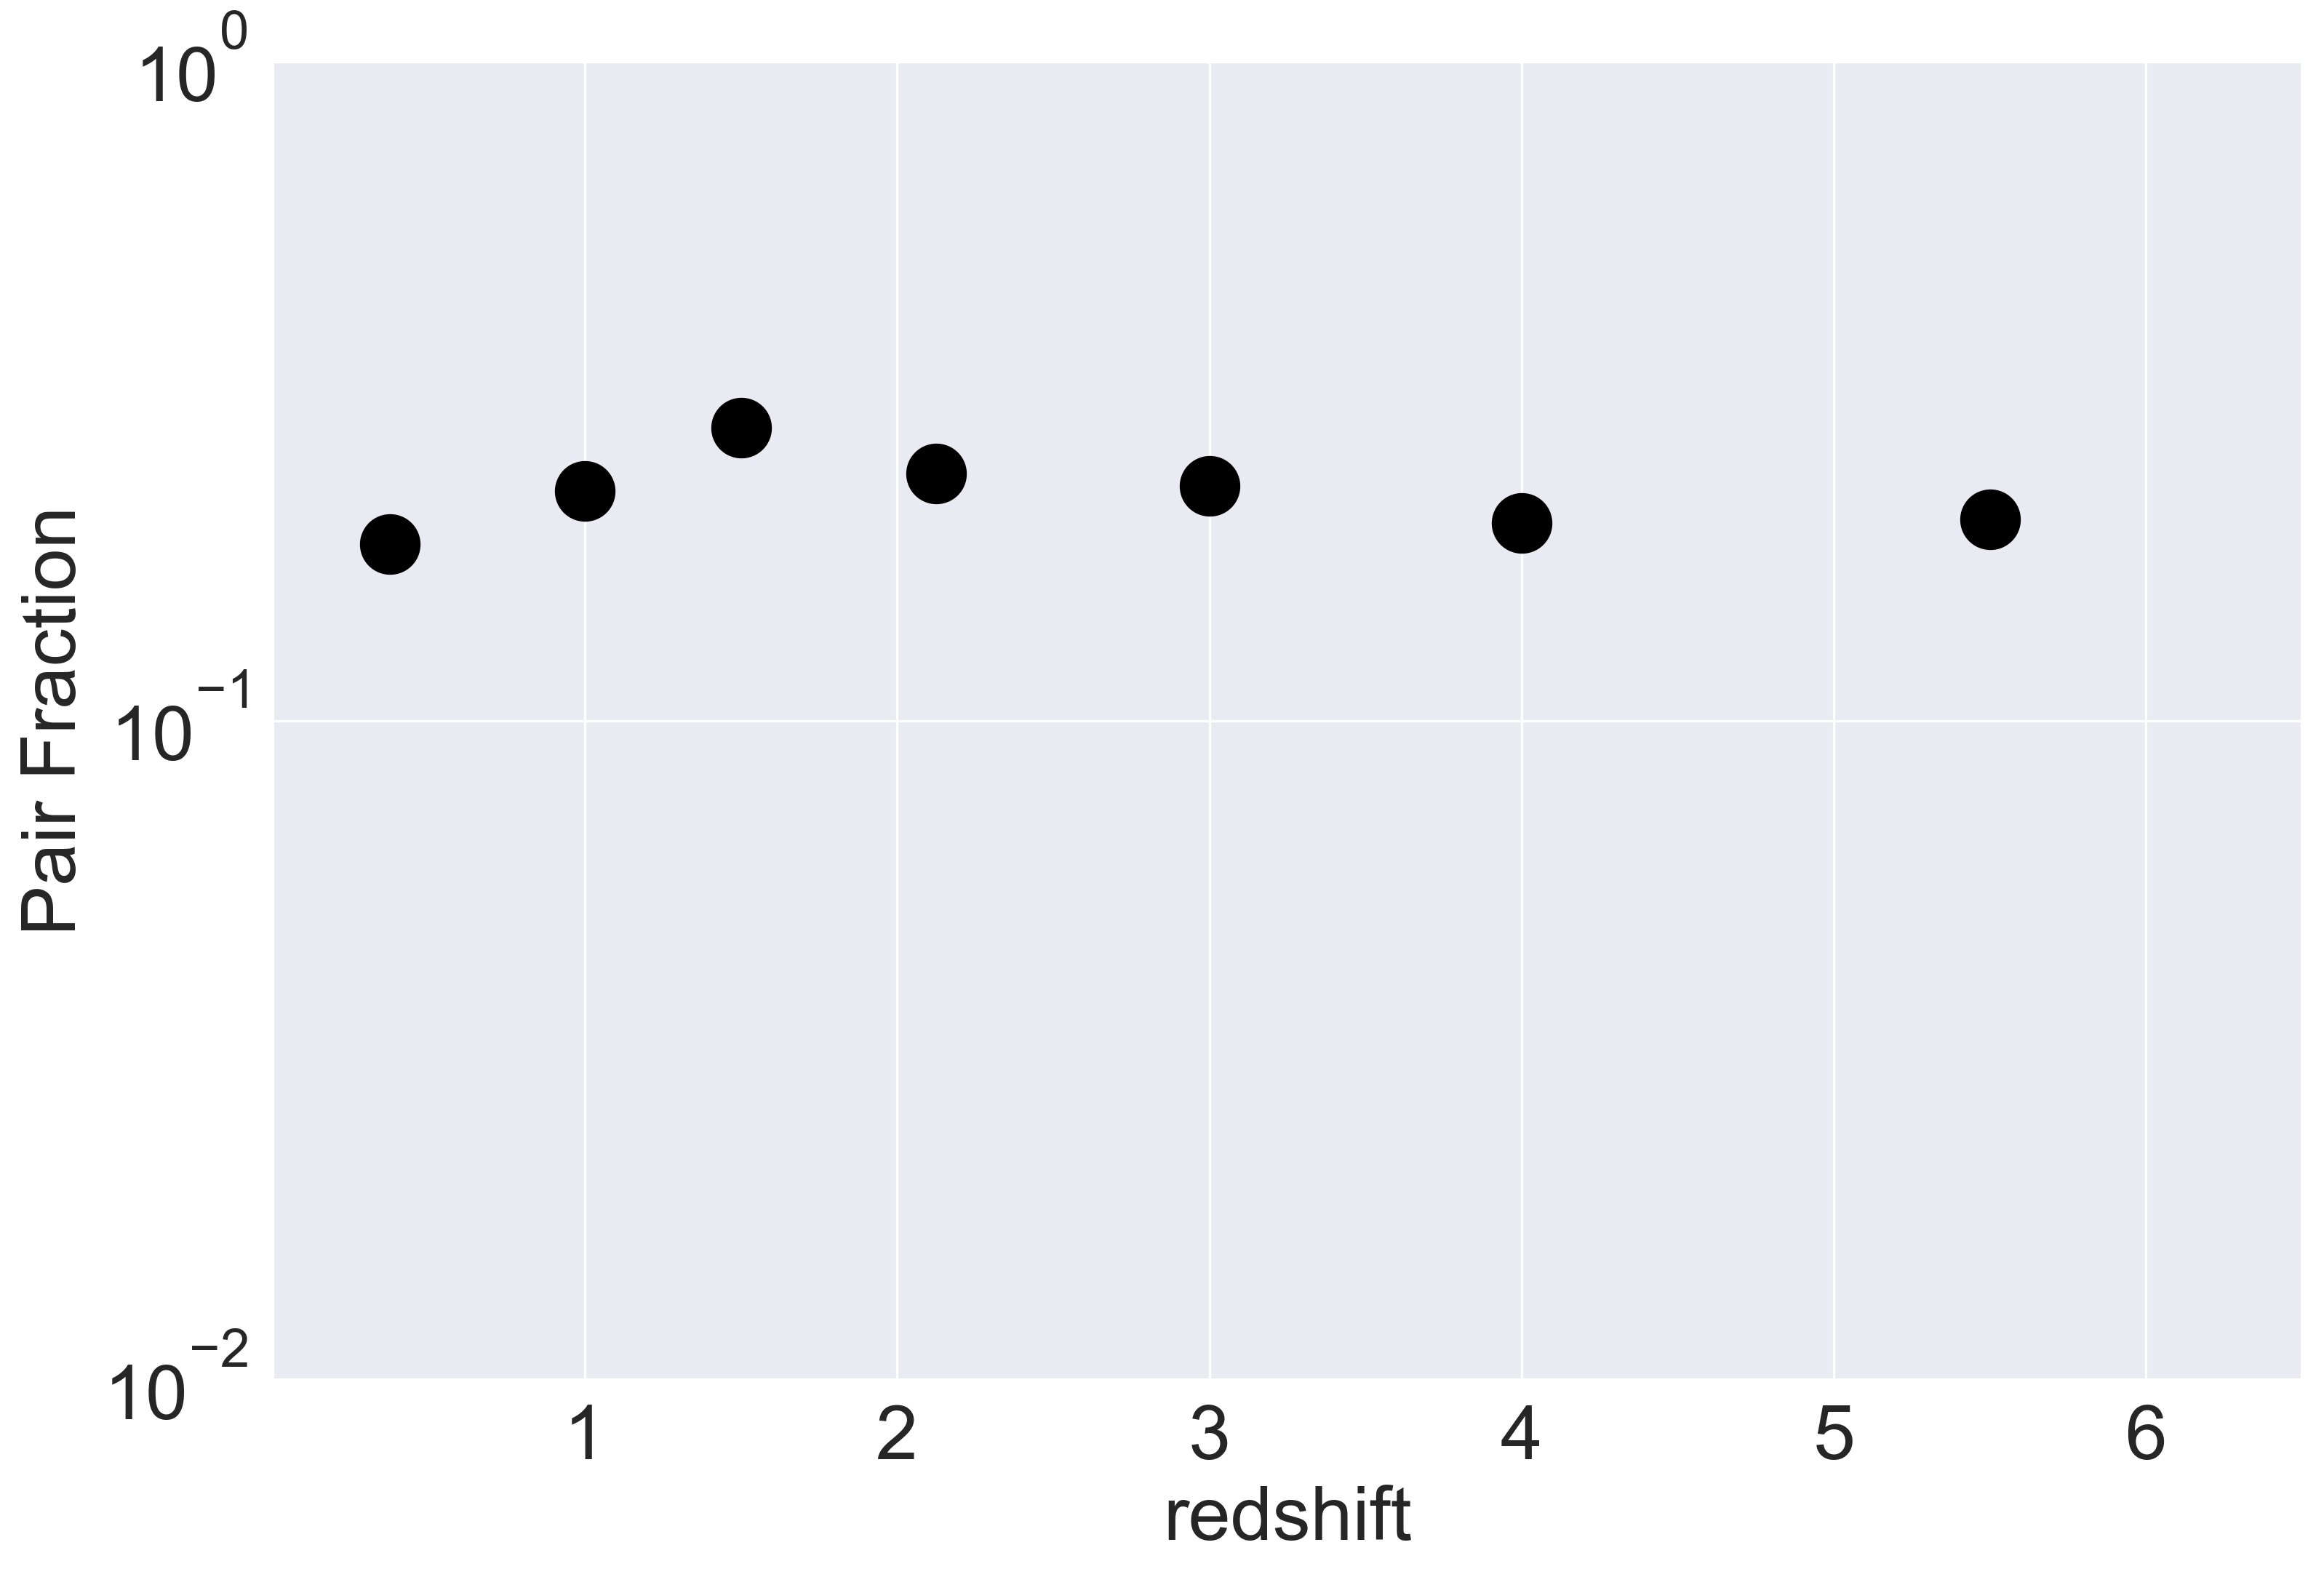

15419 possible primaries found, 123389 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 1170
Pairs detected for this bin: 162
Pair fraction for this bin: 0.13846153846153847
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 2531
Pairs detected for this bin: 403
Pair fraction for this bin: 0.15922560252864482
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 2998
Pairs detected for this bin: 805
Pair fraction for this bin: 0.2685123415610407
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 4310
Pairs detected for this bin: 1183
Pair fraction for this bin: 0.27447795823665894
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 3025
Pairs detected for this bin: 830
Pair fraction for this bin: 0

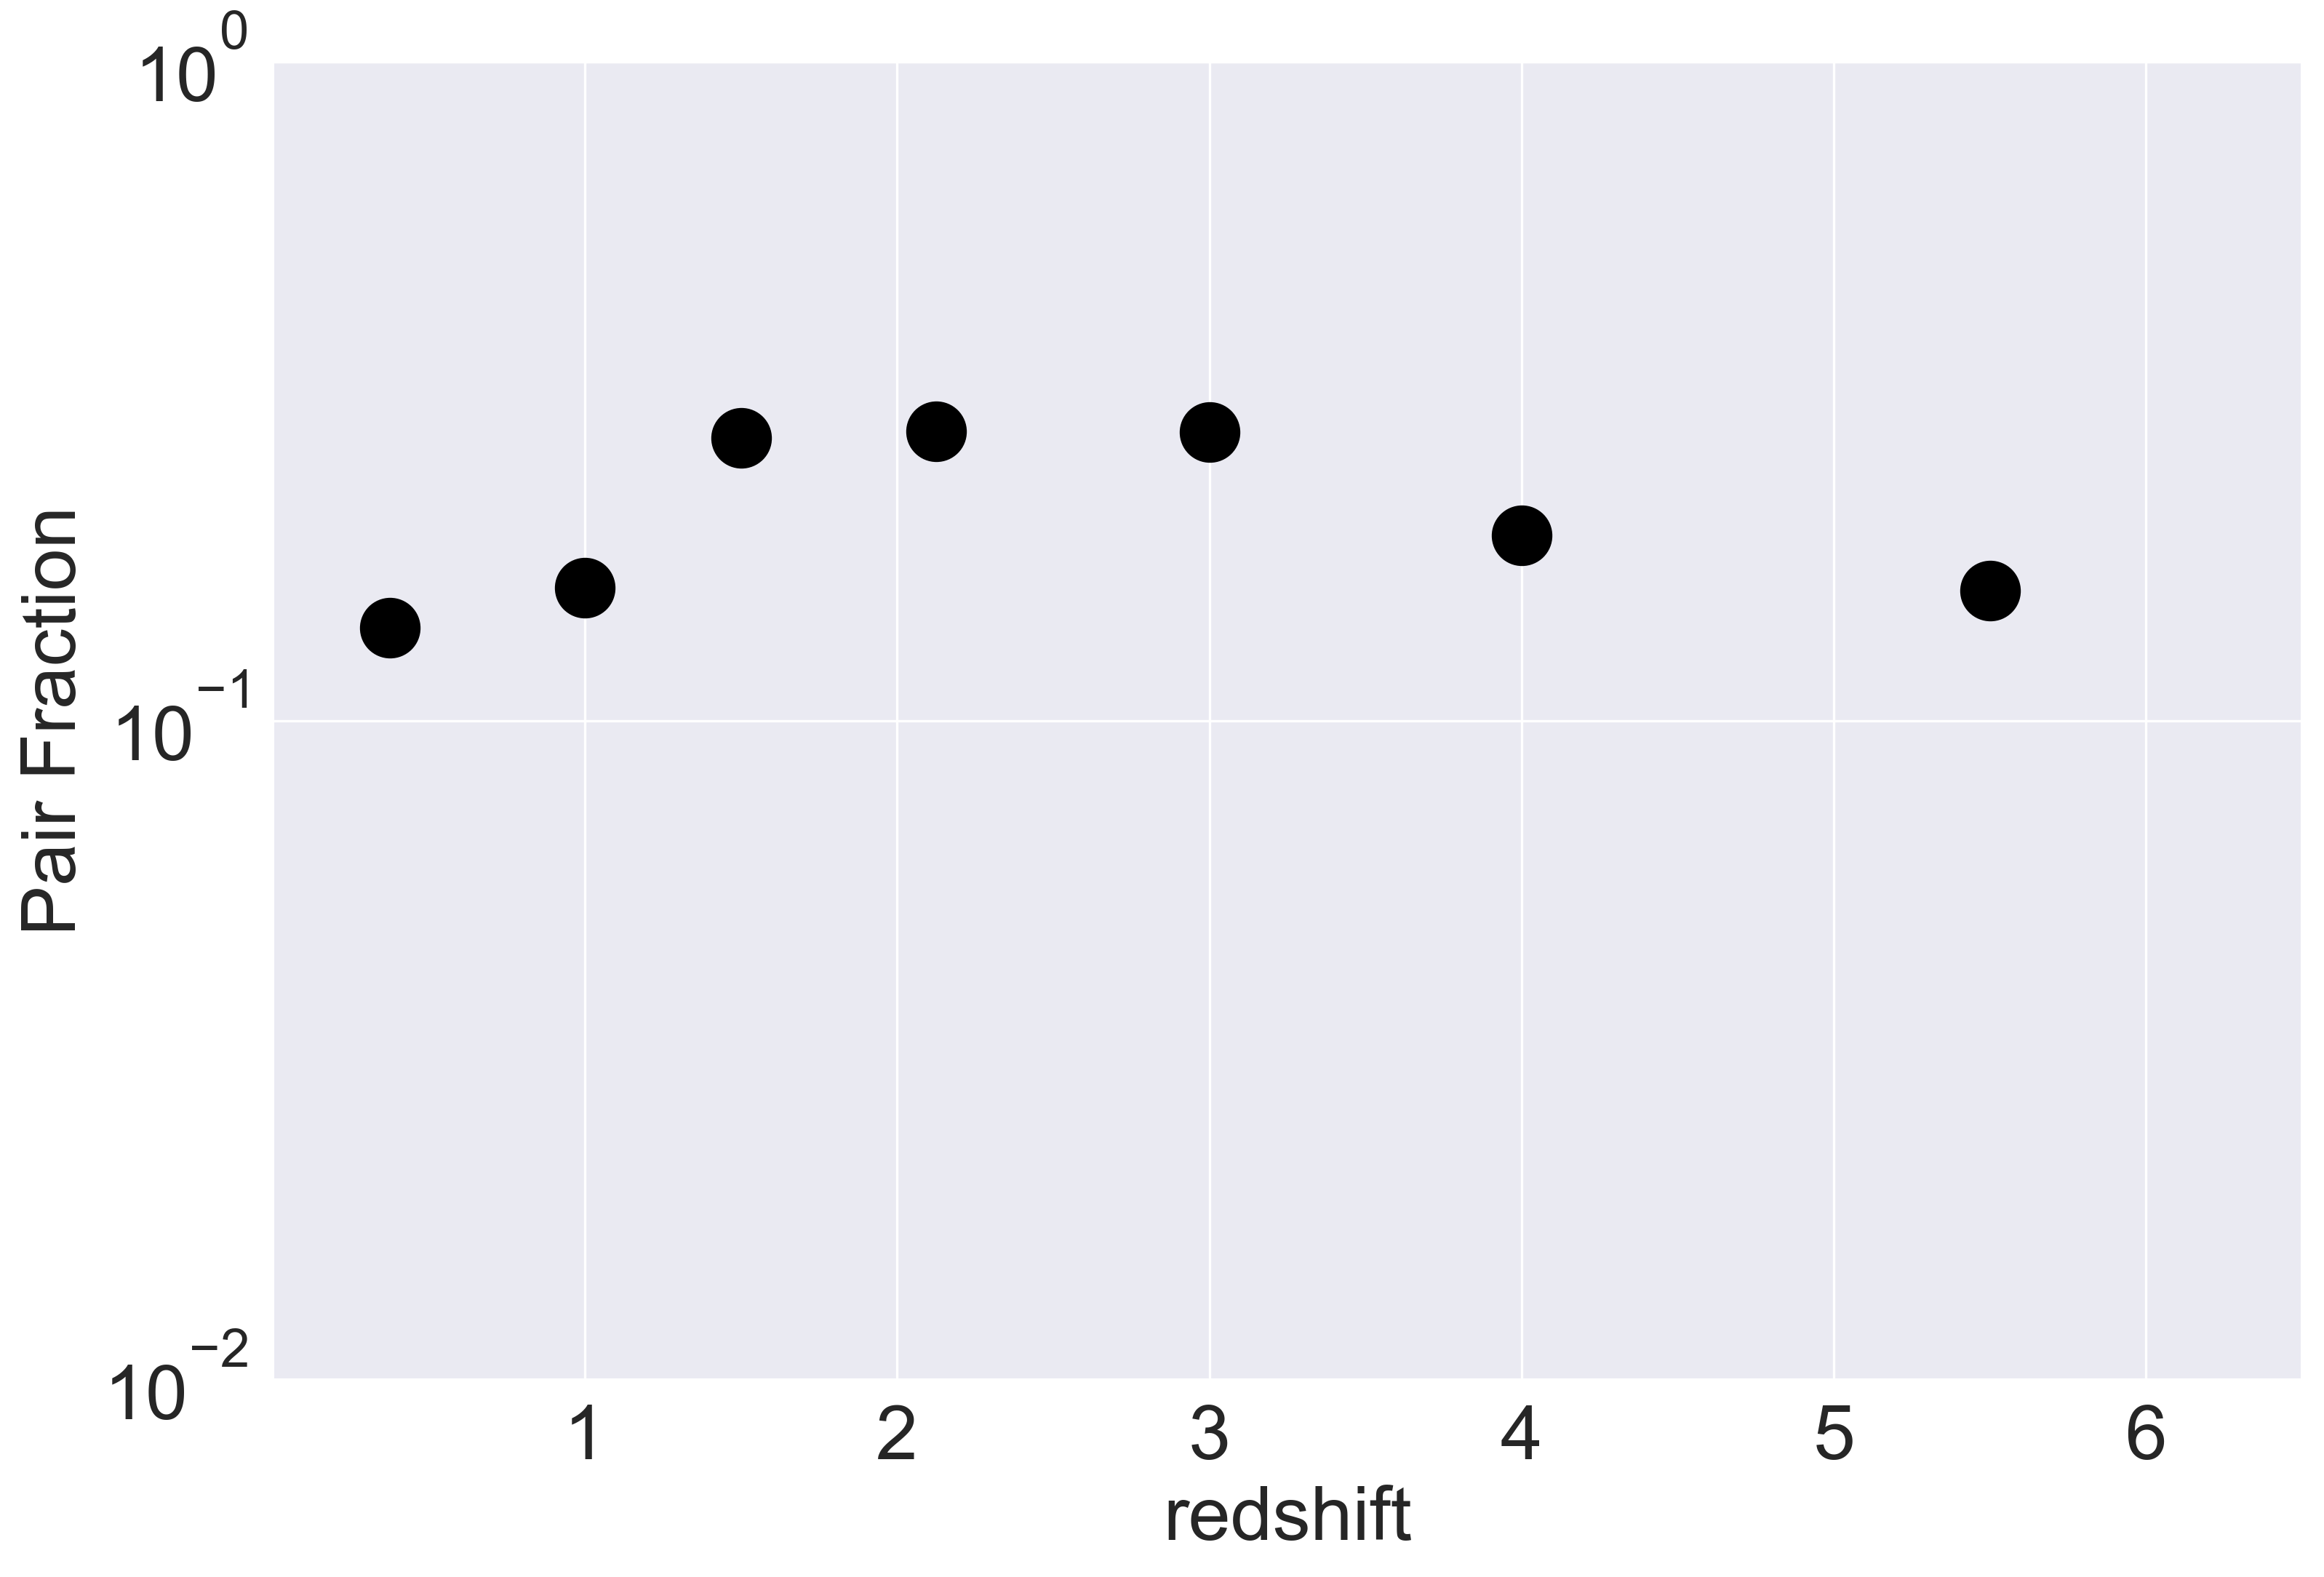

15502 possible primaries found, 123090 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 1053
Pairs detected for this bin: 133
Pair fraction for this bin: 0.12630579297245964
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 3147
Pairs detected for this bin: 750
Pair fraction for this bin: 0.23832221163012393
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 3342
Pairs detected for this bin: 778
Pair fraction for this bin: 0.23279473369239975
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 4128
Pairs detected for this bin: 1172
Pair fraction for this bin: 0.28391472868217055
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 2560
Pairs detected for this bin: 526
Pair fraction for this bin: 

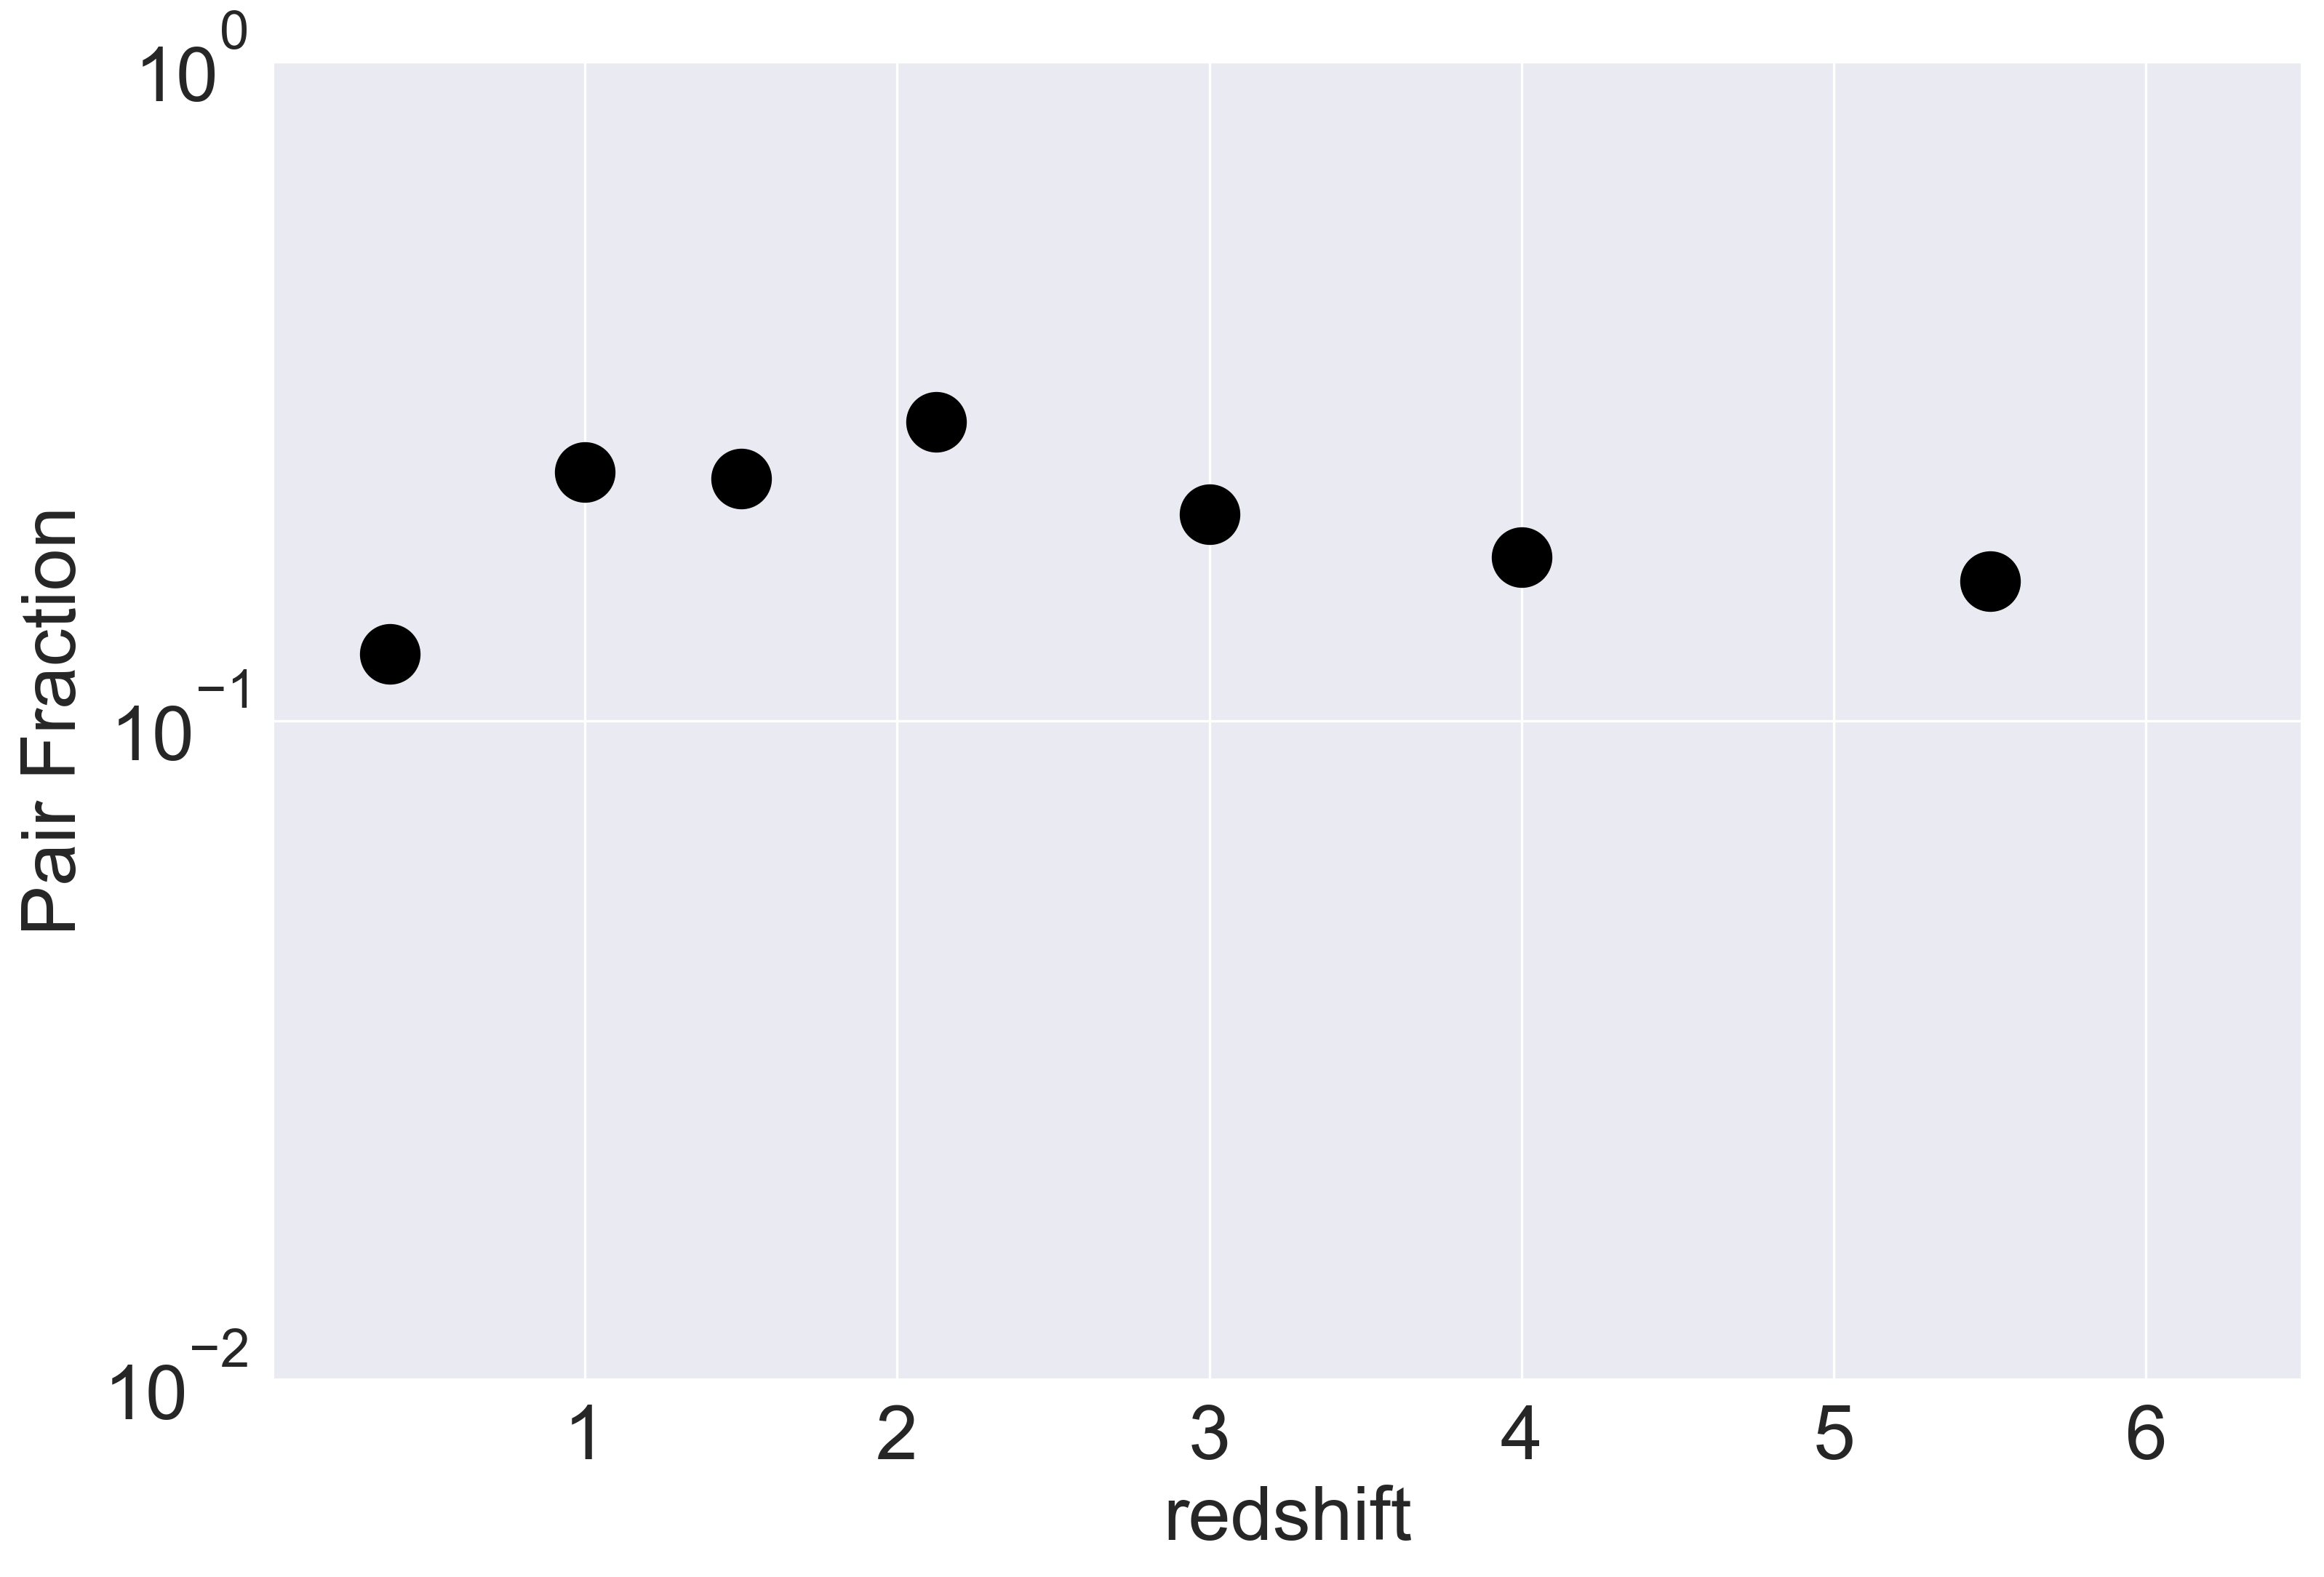

In [16]:
xyz_inforeduced = pairs_plots(dash1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1,primary_mass=10**9.3)
yxz_inforeduced = pairs_plots(dash1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1,primary_mass=10**9.3)
zyx_inforeduced = pairs_plots(dash1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot1,primary_mass=10**9.3)


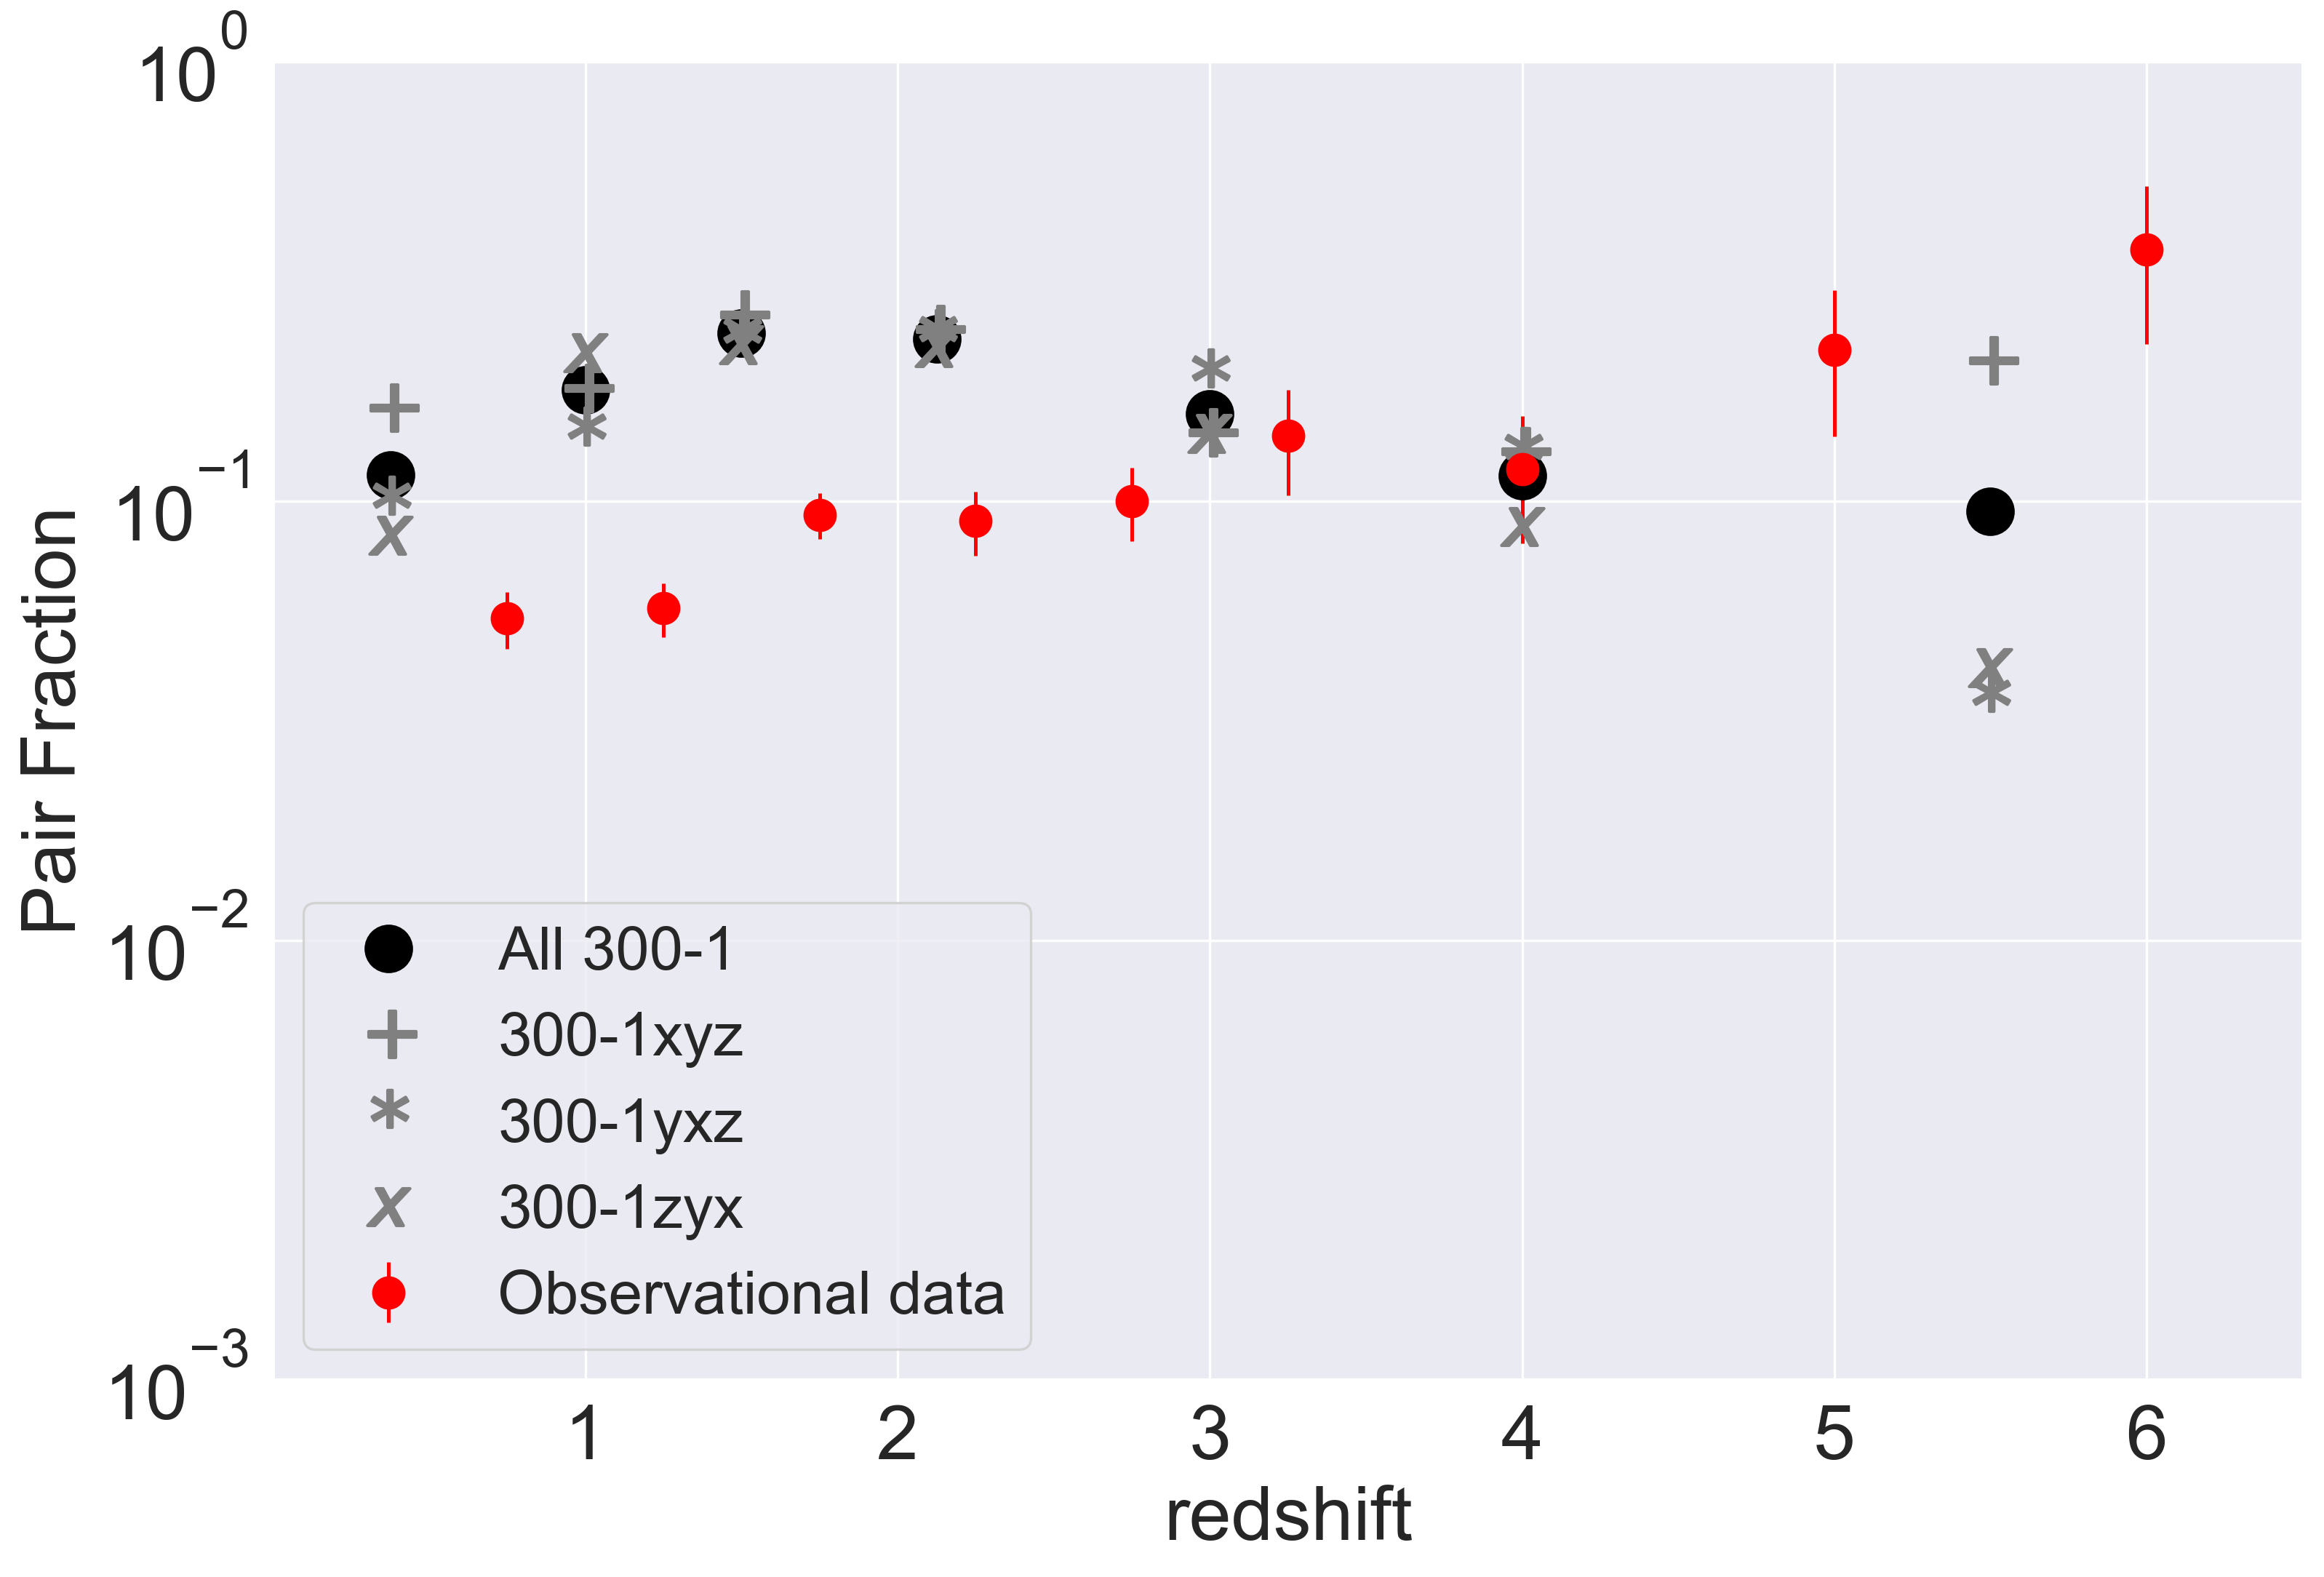

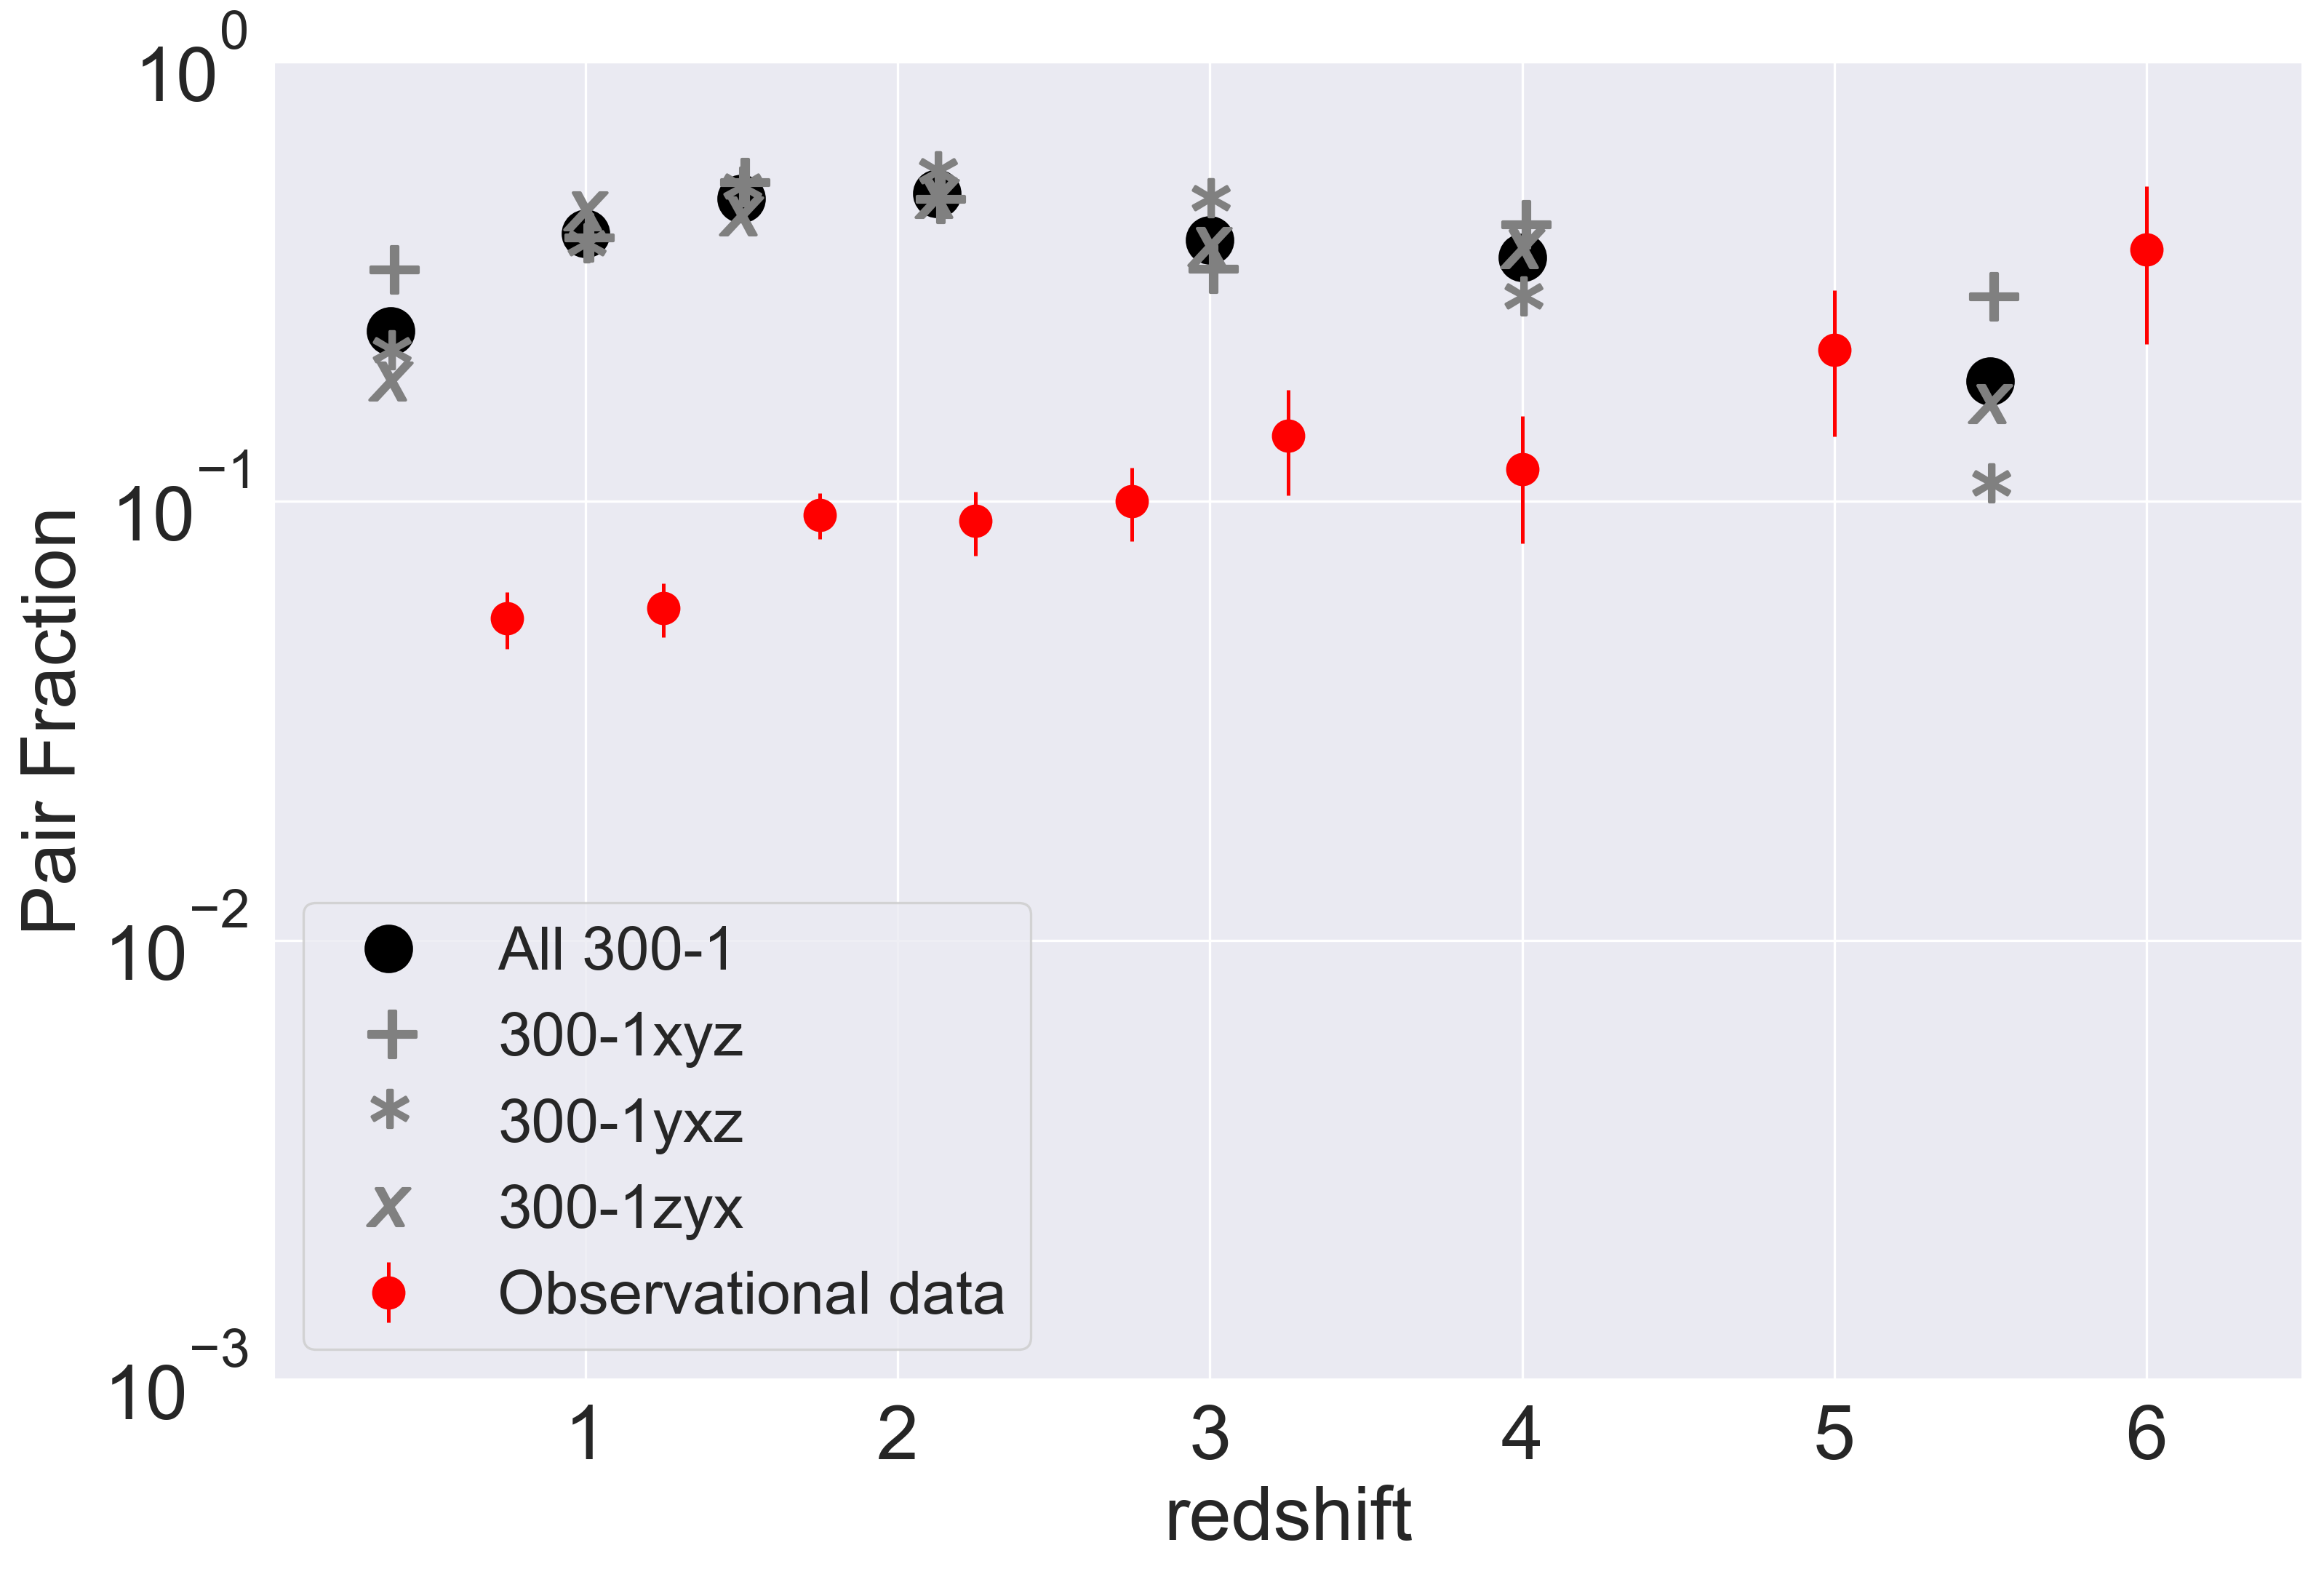

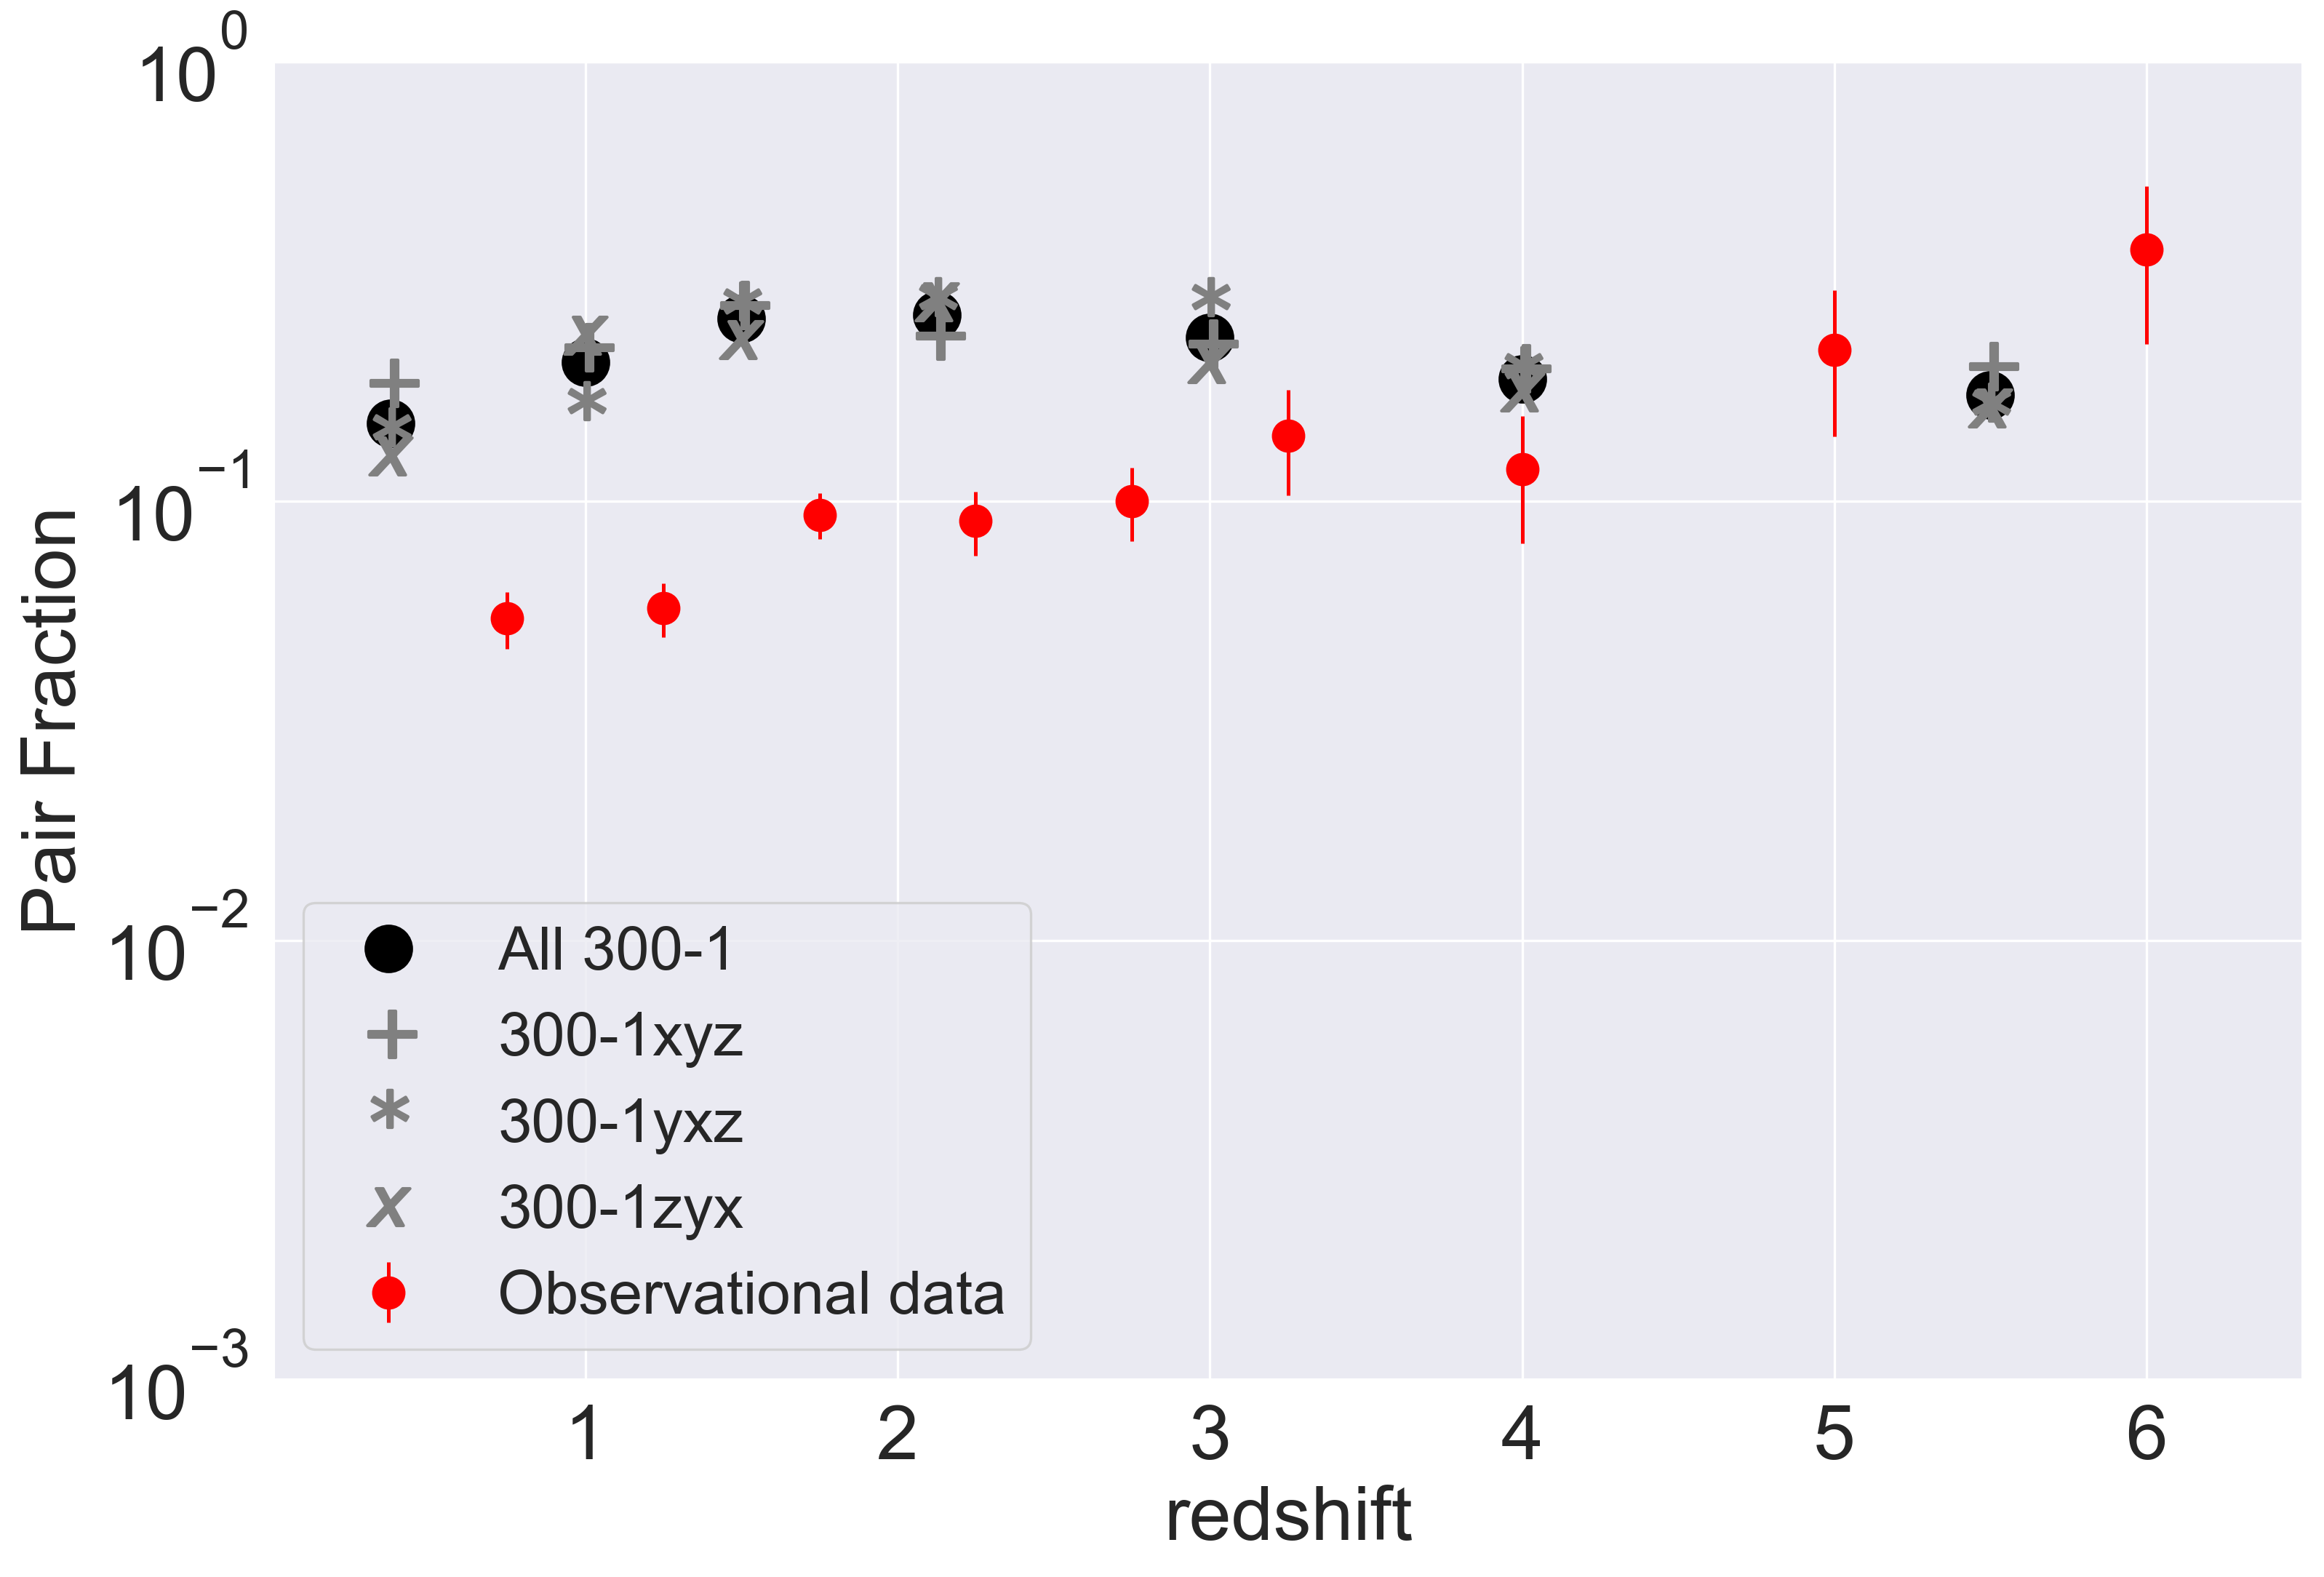

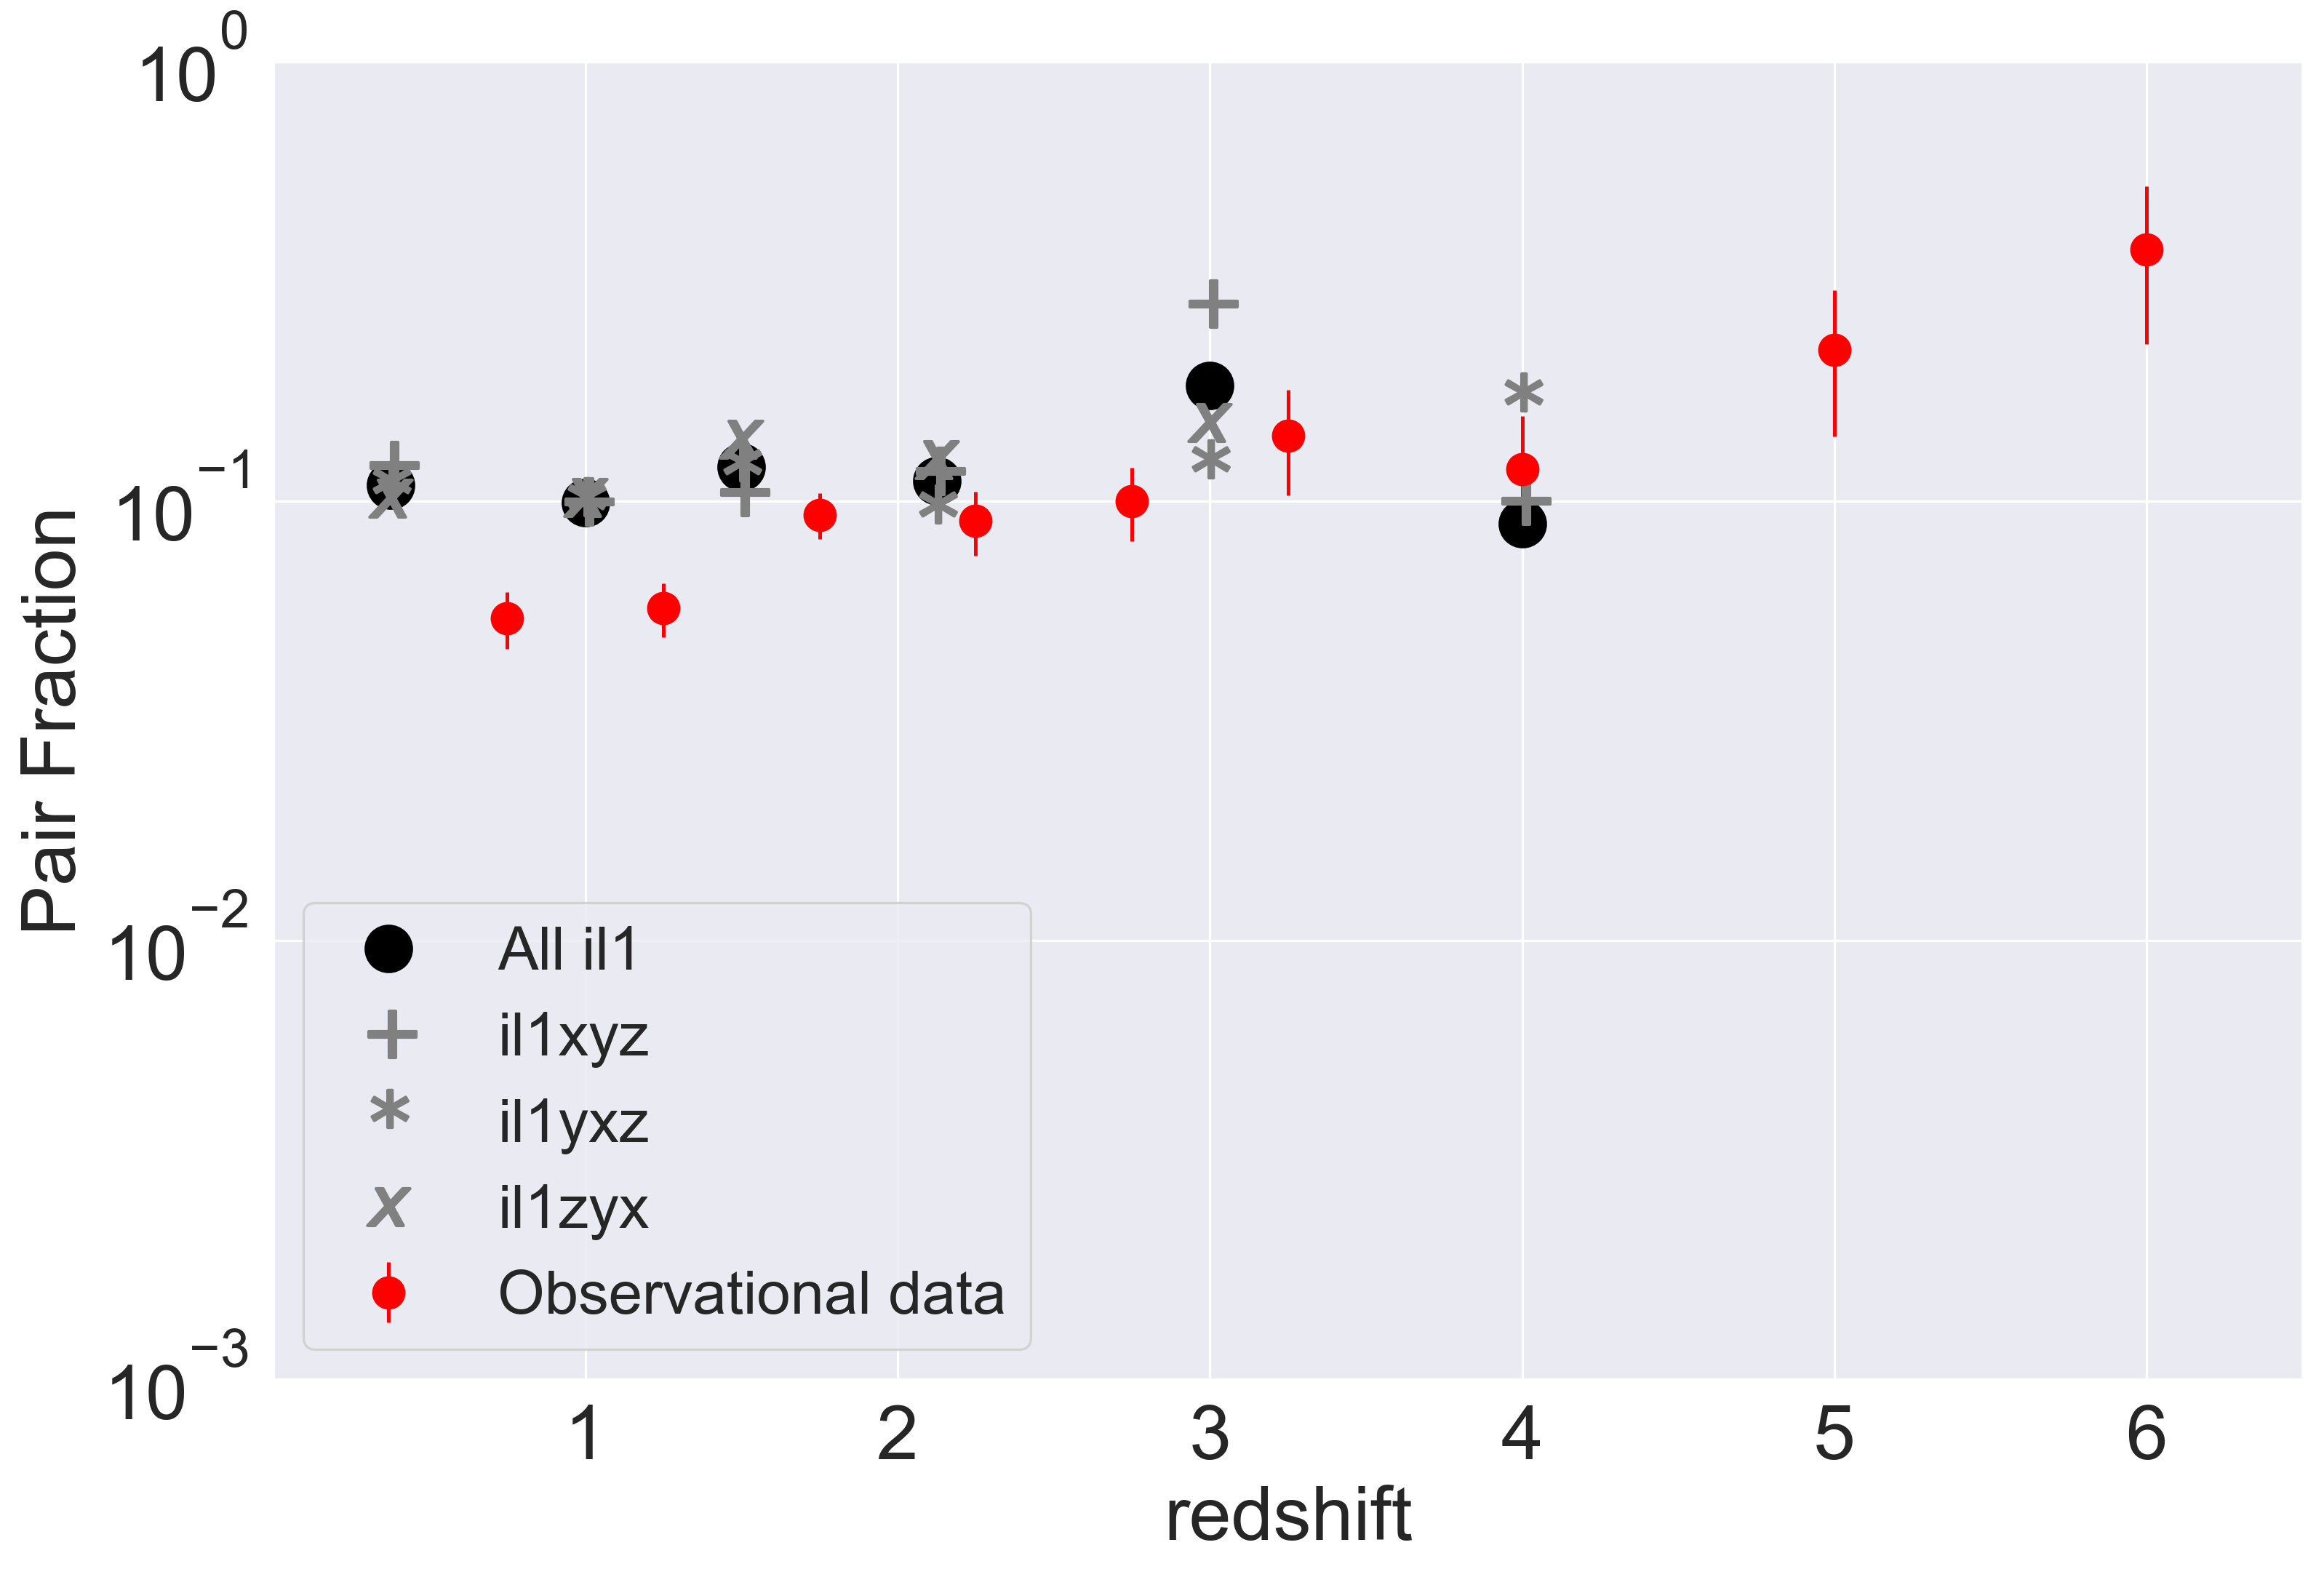

In [42]:
all_ = all_plot(xyz_info,yxz_info,zyx_info,obs=obs_info)
all01 = all_plot(xyz_info01, yxz_info01, zyx_info01, obs=obs_info)
allreduced = all_plot(xyz_inforeduced,yxz_inforeduced,zyx_inforeduced,obs=obs_info)
allil1 = all_plot(xyz_infoil1,yxz_infoil1,zyx_infoil1, obs=obs_info)

### Data cuts: Following Ducnan et al, Reduced mass limit, and reduced mass fraction

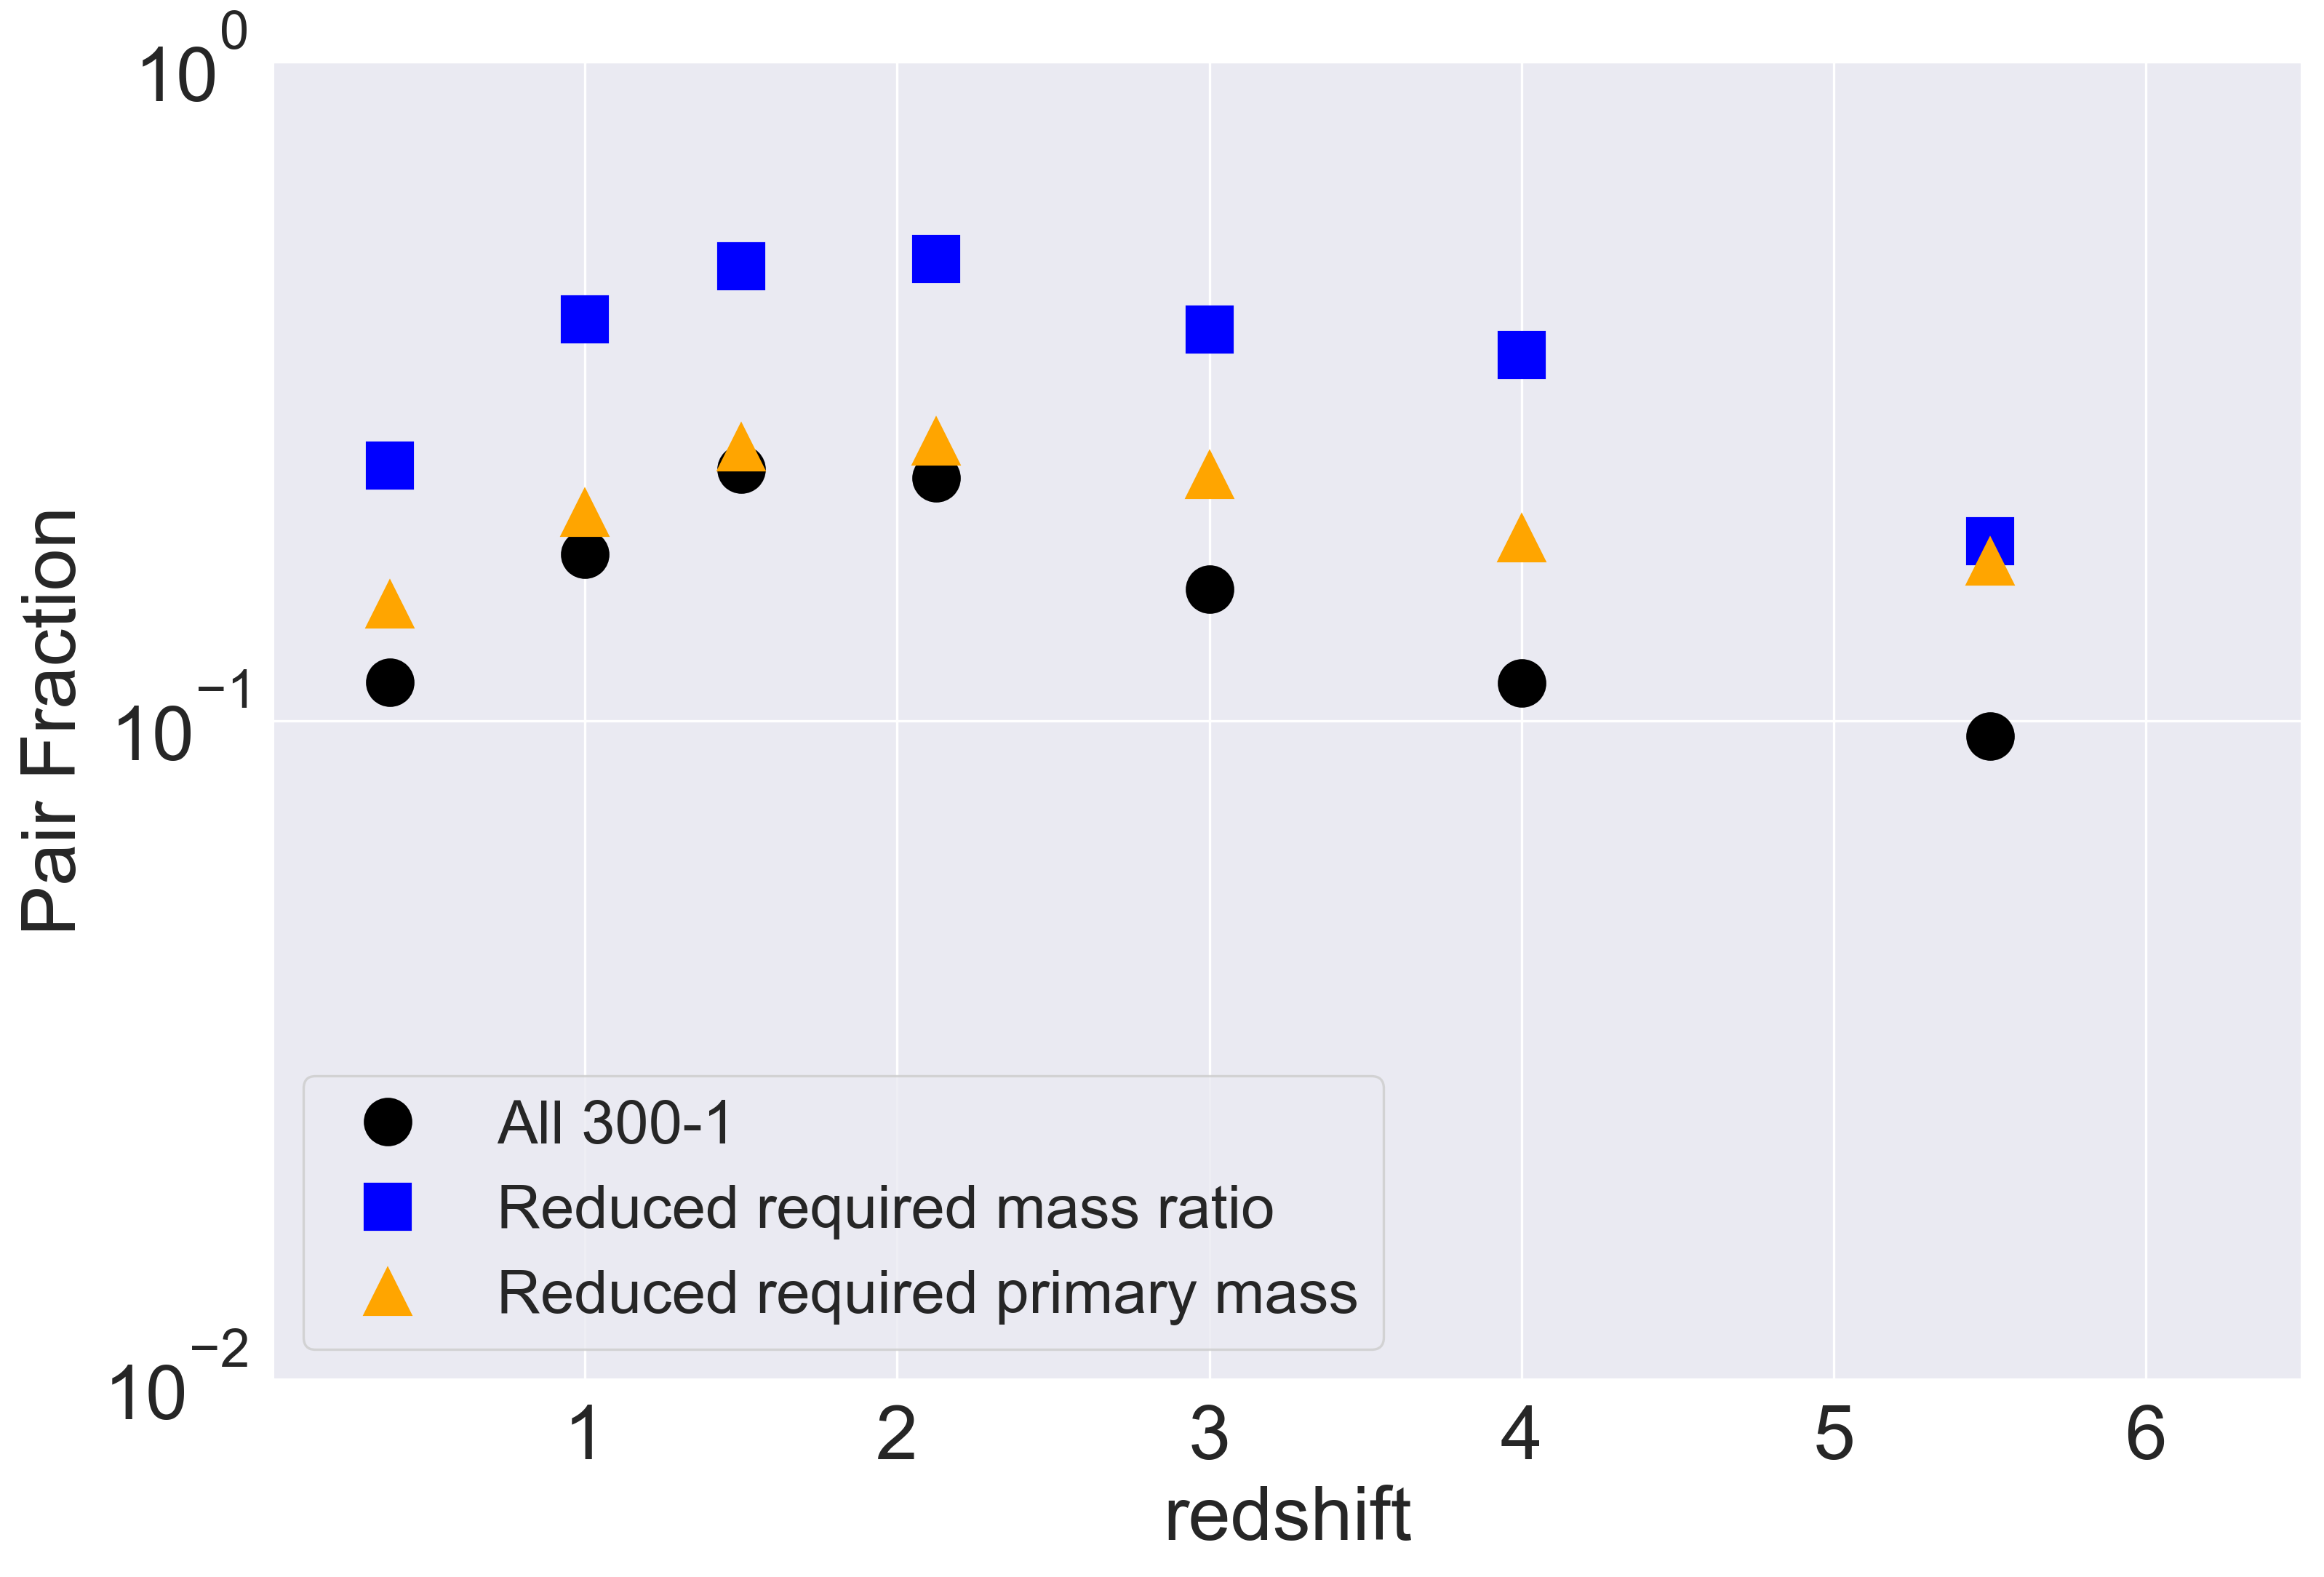

In [39]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(12, 8),dpi=300)
ax1.plot(all_[1],all_[0],marker='o',linestyle='None',markersize=15,color='black',label=('All 300-1'))
ax1.plot(all01[1],all01[0],marker='s',linestyle='None',markersize=15,color='blue',label=('Reduced required mass ratio'))
ax1.plot(allreduced[1],allreduced[0],marker='^',linestyle='None',markersize=15,color='orange',label=('Reduced required primary mass'))
#ax1.errorbar(obs_info[0], obs_info[1], yerr=obs_info[2], marker='o', linestyle='None', markersize=10, color='red', label = 'Observational data')
ax1.legend(loc='lower left',fontsize=20)

ax1.set_xlabel('redshift',size=25)
ax1.set_xlim(bins_for_plot[0][0], 6.5)
ax1.set_ylabel('Pair Fraction',size=25)
ax1.set_ylim([0.01, 1])
ax1.set_yscale('log')

ax1.tick_params(labelsize=25)
plt.show()

### Comparing Illustris-1 and TNG300-1 z=(.5 -- 6) > Save printout of number of pairs

In [53]:
bins_for_plot2 = ((0.00001,0.5),(0.5,1.0),(1.0,1.5),(1.5,2.0),(2.5,3.5),(3.5,4.5),(4.5,6.5))

2771 possible primaries found, 59045 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 120
Pairs detected for this bin: 17
Pair fraction for this bin: 0.14166666666666666
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 485
Pairs detected for this bin: 79
Pair fraction for this bin: 0.16288659793814433
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 775
Pairs detected for this bin: 178
Pair fraction for this bin: 0.2296774193548387
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 537
Pairs detected for this bin: 154
Pair fraction for this bin: 0.28677839851024206
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 329
Pairs detected for this bin: 47
Pair fraction for this bin: 0.1428571428571428

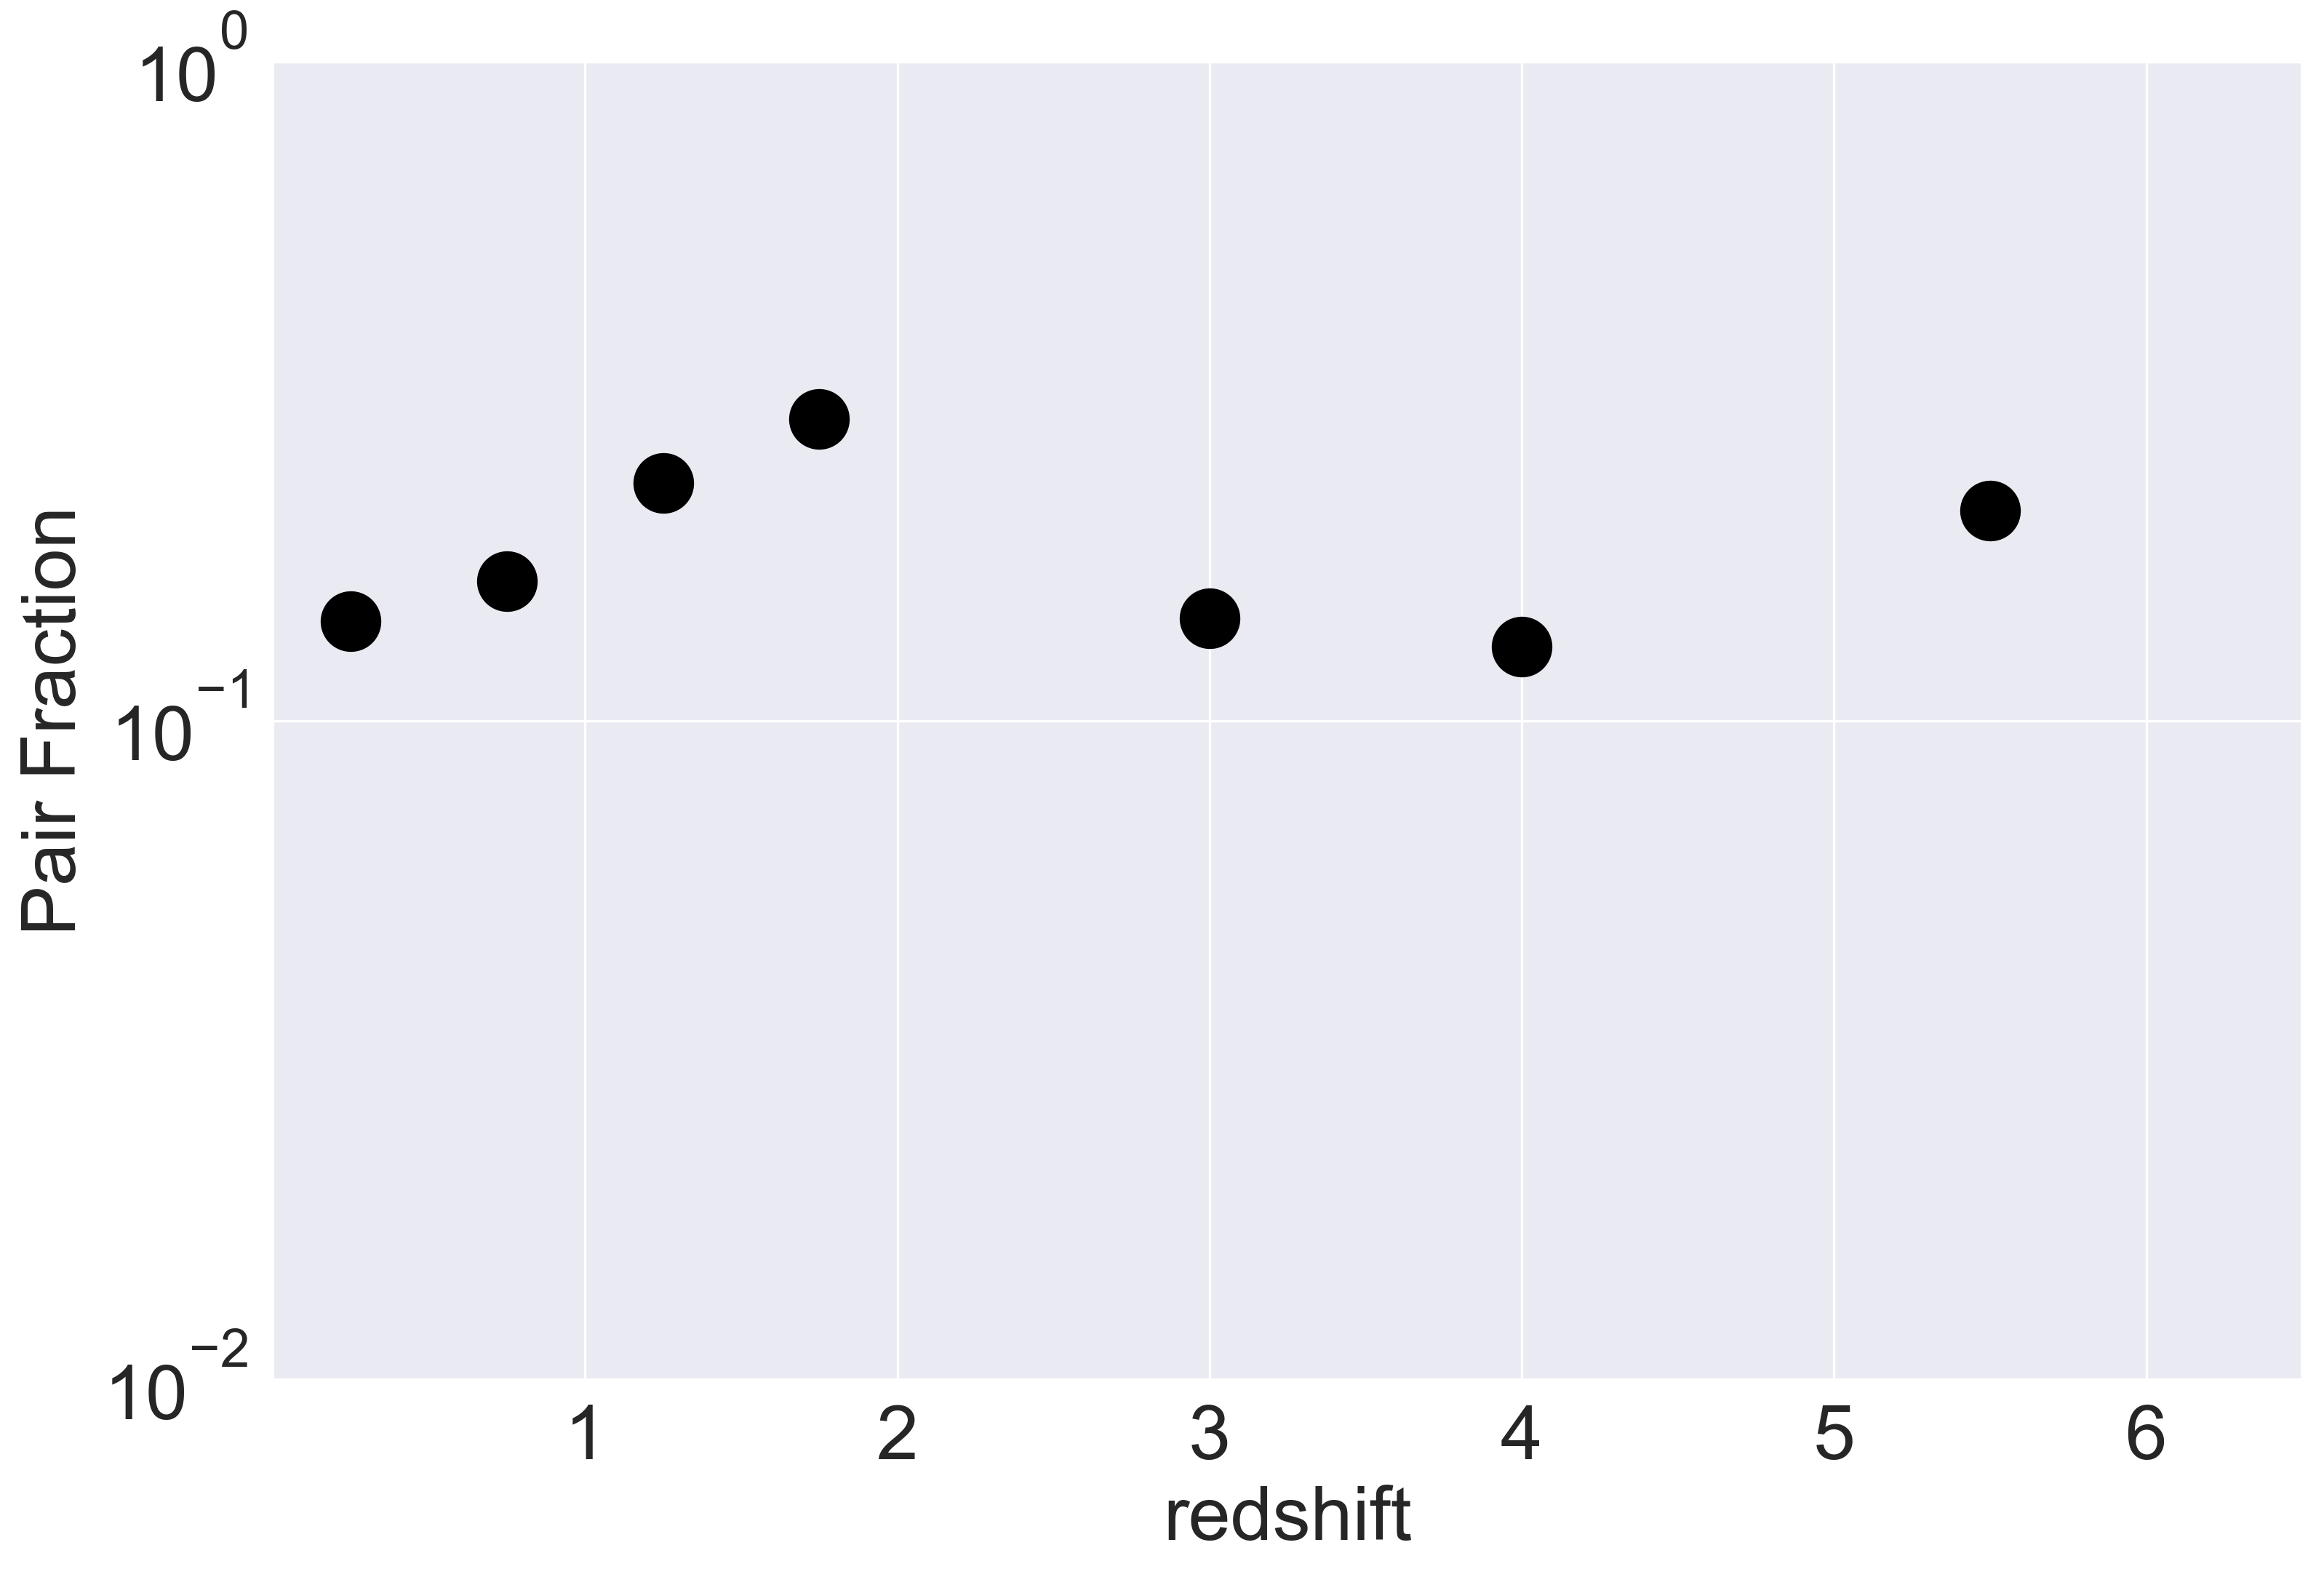

2675 possible primaries found, 59409 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 103
Pairs detected for this bin: 11
Pair fraction for this bin: 0.10679611650485436
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 402
Pairs detected for this bin: 33
Pair fraction for this bin: 0.08208955223880597
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 650
Pairs detected for this bin: 132
Pair fraction for this bin: 0.20307692307692307
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 539
Pairs detected for this bin: 129
Pair fraction for this bin: 0.23933209647495363
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 439
Pairs detected for this bin: 83
Pair fraction for this bin: 0.189066059225512

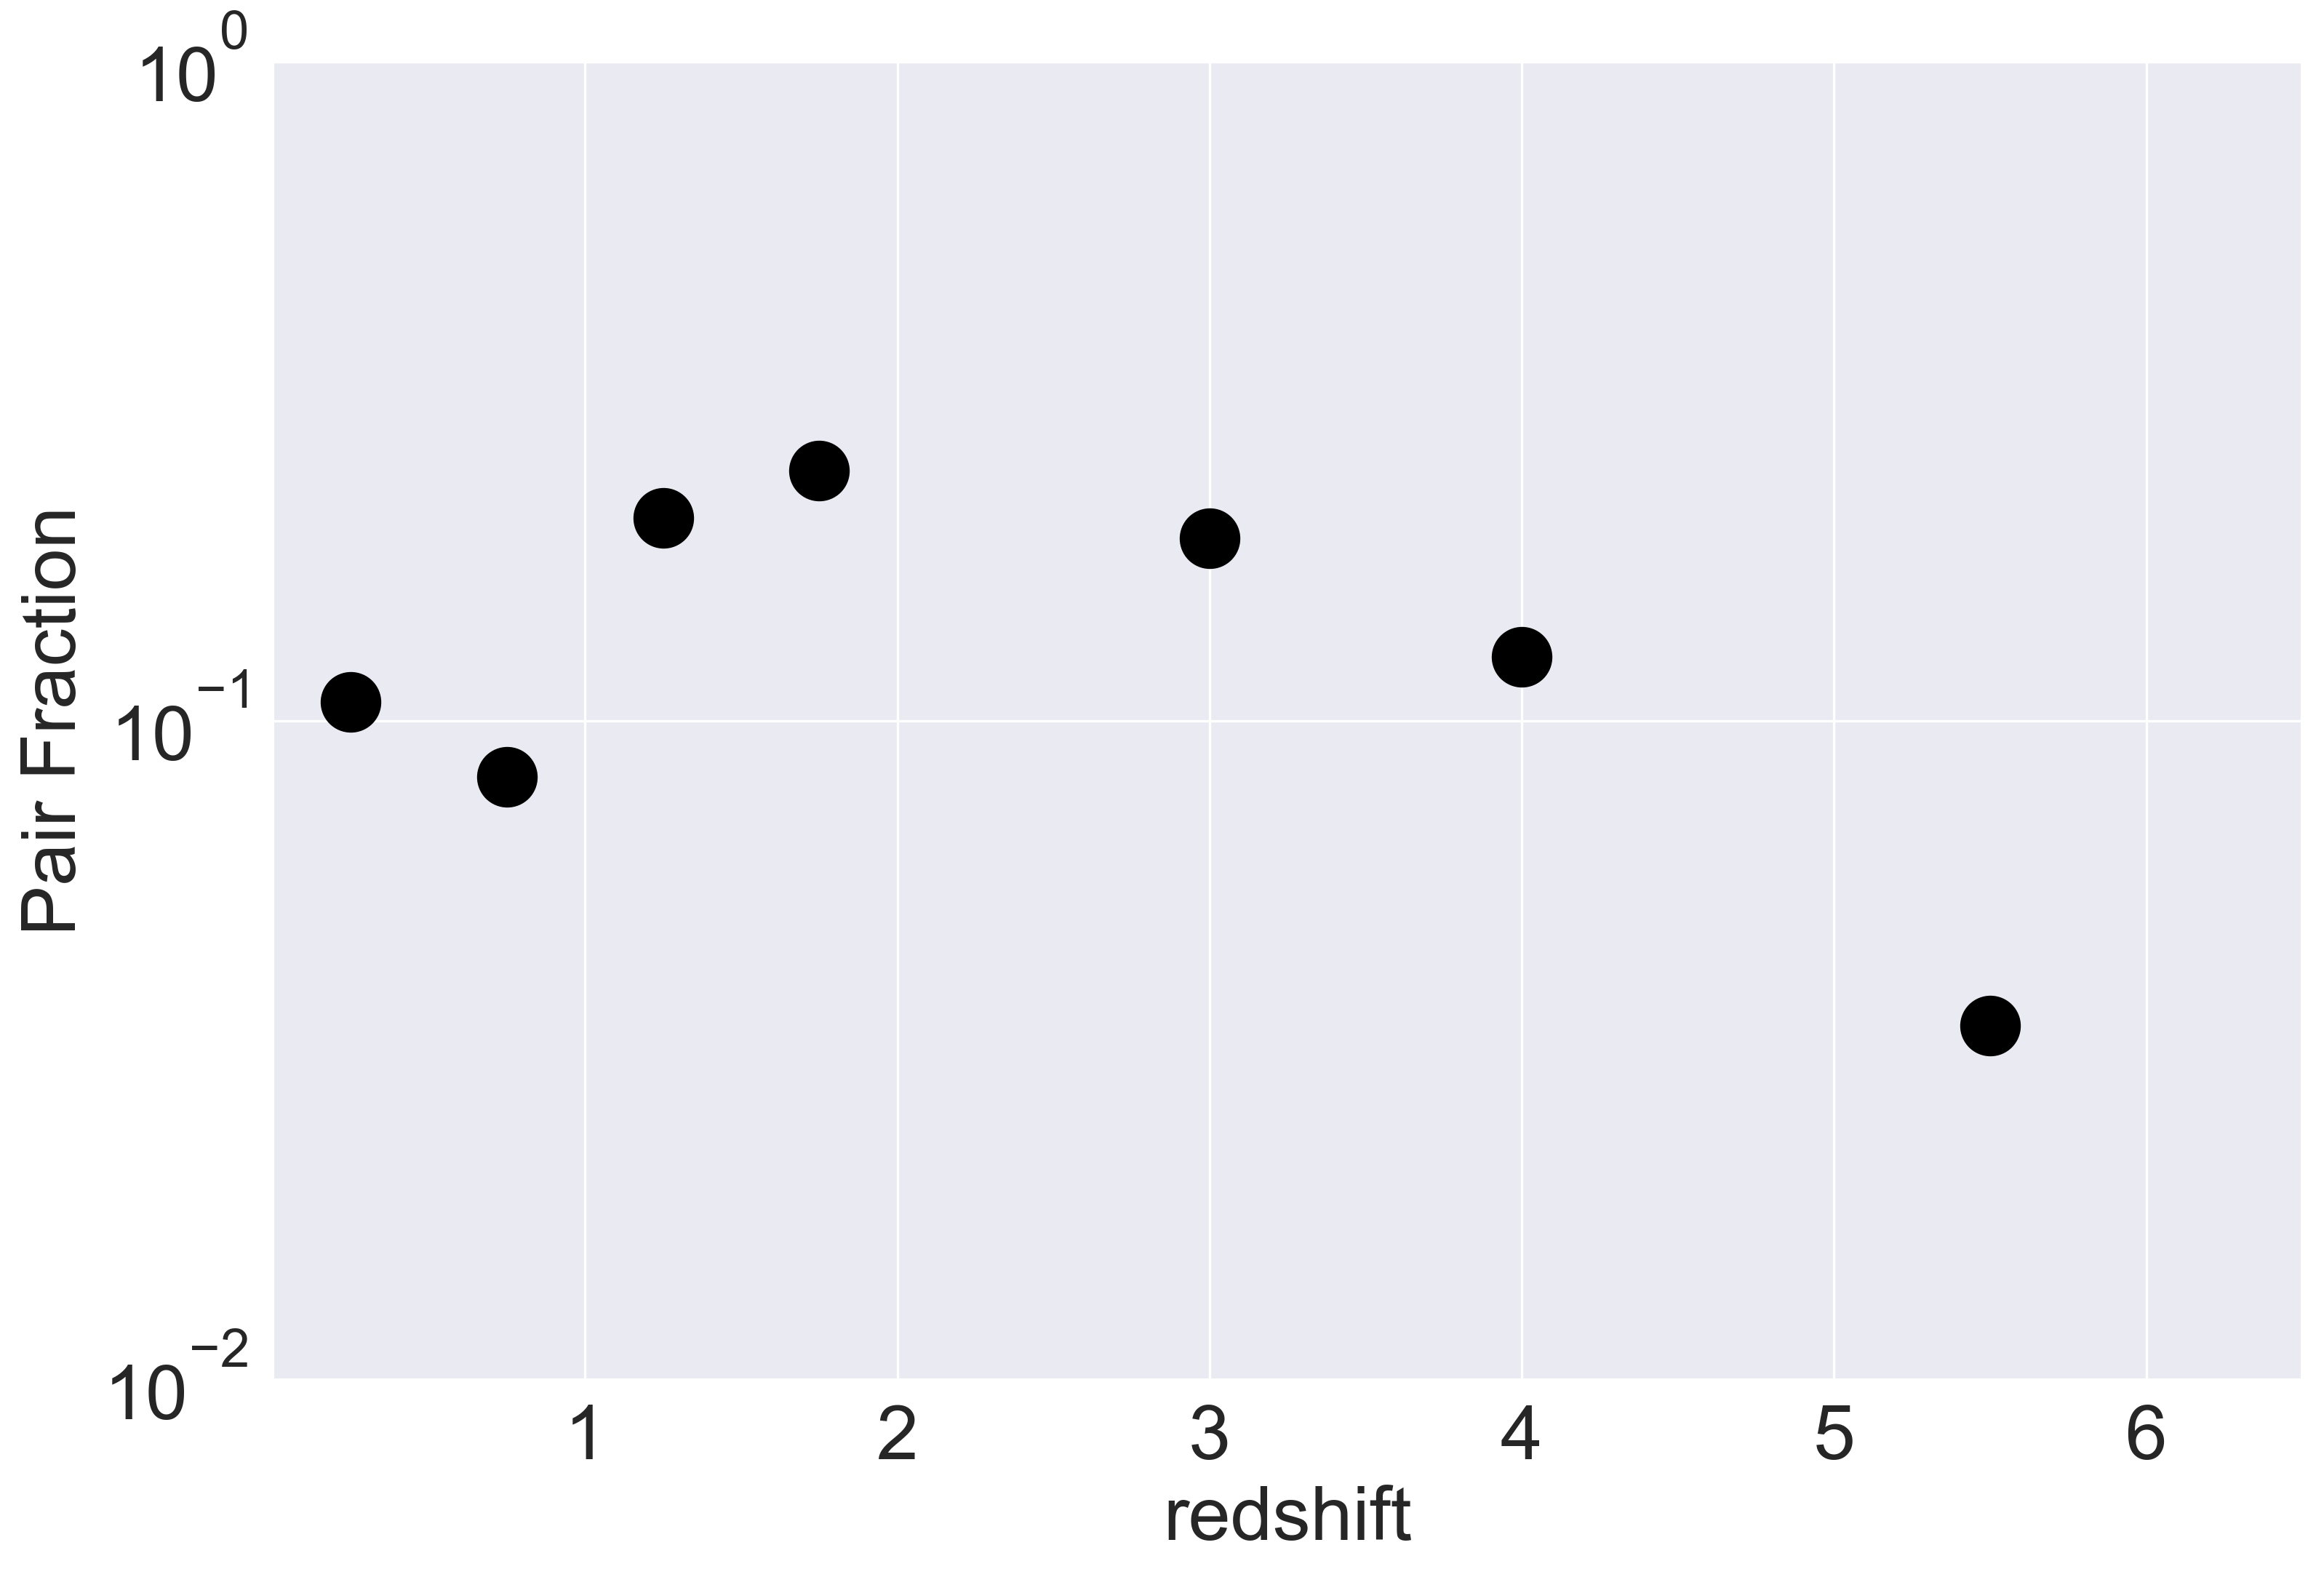

2734 possible primaries found, 58676 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 102
Pairs detected for this bin: 6
Pair fraction for this bin: 0.058823529411764705
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 452
Pairs detected for this bin: 75
Pair fraction for this bin: 0.16592920353982302
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 693
Pairs detected for this bin: 153
Pair fraction for this bin: 0.22077922077922077
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 558
Pairs detected for this bin: 146
Pair fraction for this bin: 0.2616487455197133
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 316
Pairs detected for this bin: 45
Pair fraction for this bin: 0.1424050632911392

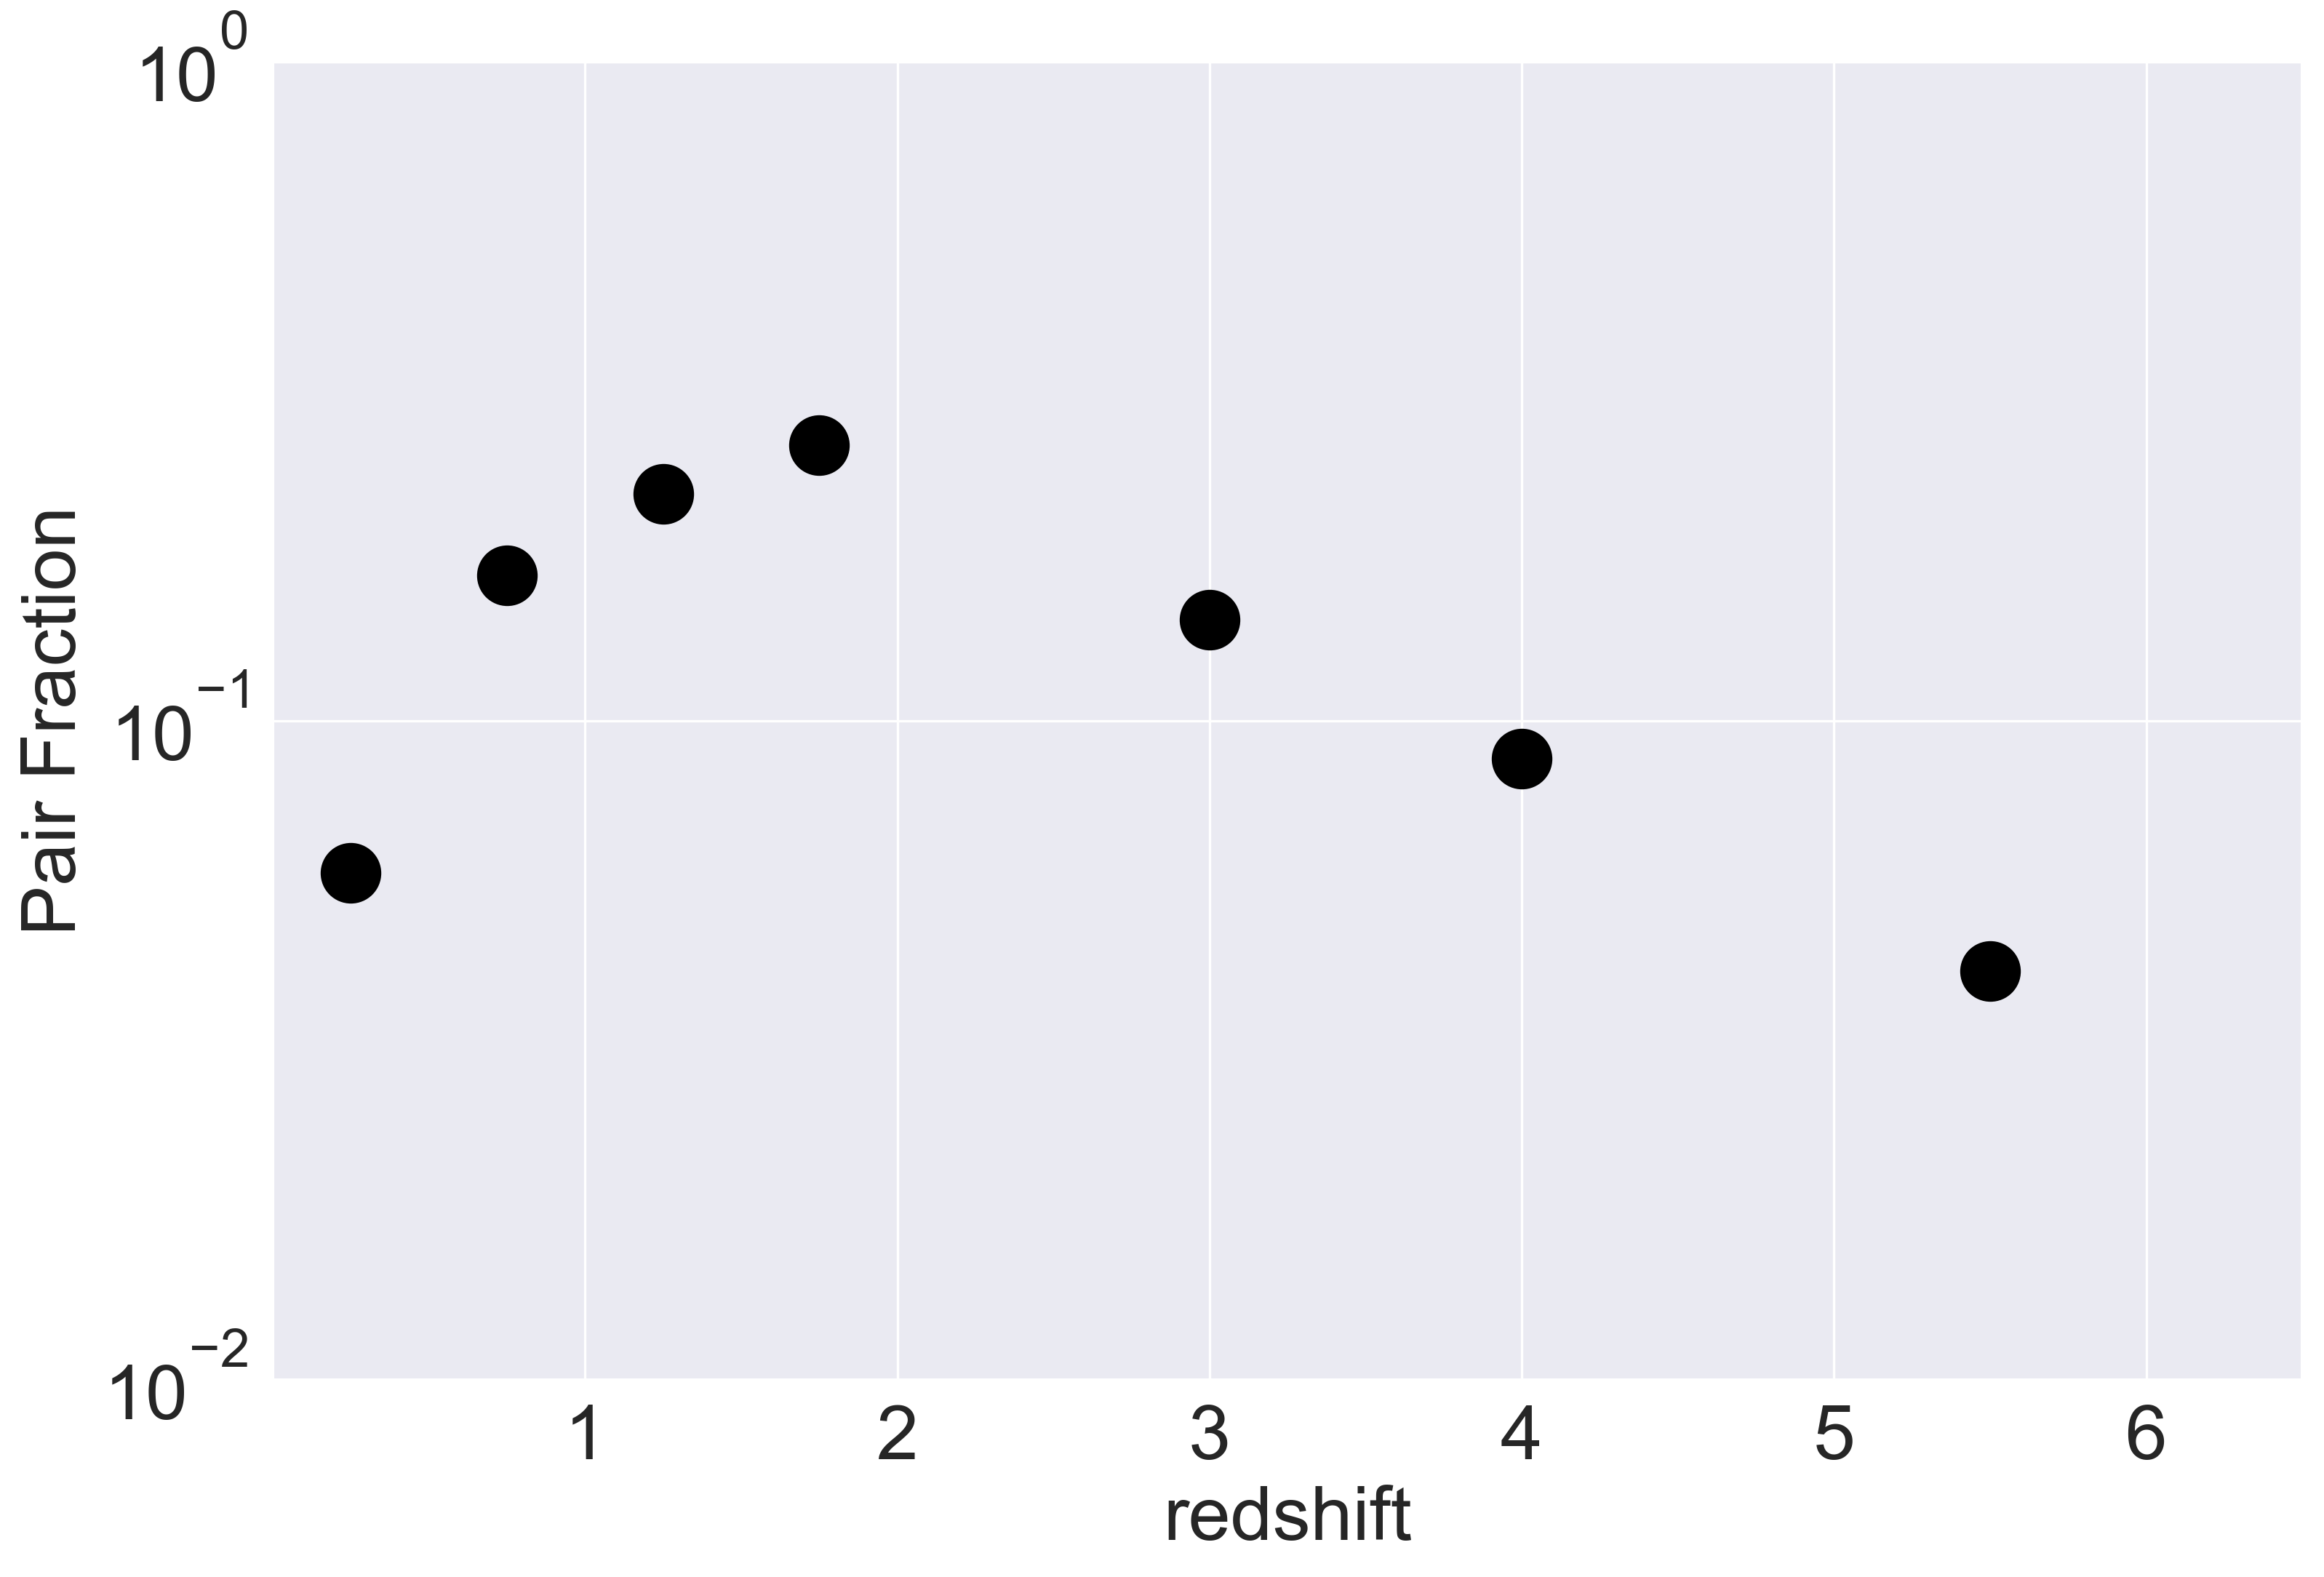

1040 possible primaries found, 26592 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 27
Pairs detected for this bin: 3
Pair fraction for this bin: 0.1111111111111111
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 296
Pairs detected for this bin: 36
Pair fraction for this bin: 0.12162162162162163
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 251
Pairs detected for this bin: 26
Pair fraction for this bin: 0.10358565737051793
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 196
Pairs detected for this bin: 20
Pair fraction for this bin: 0.10204081632653061
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 114
Pairs detected for this bin: 32
Pair fraction for this bin: 0.2807017543859649
---

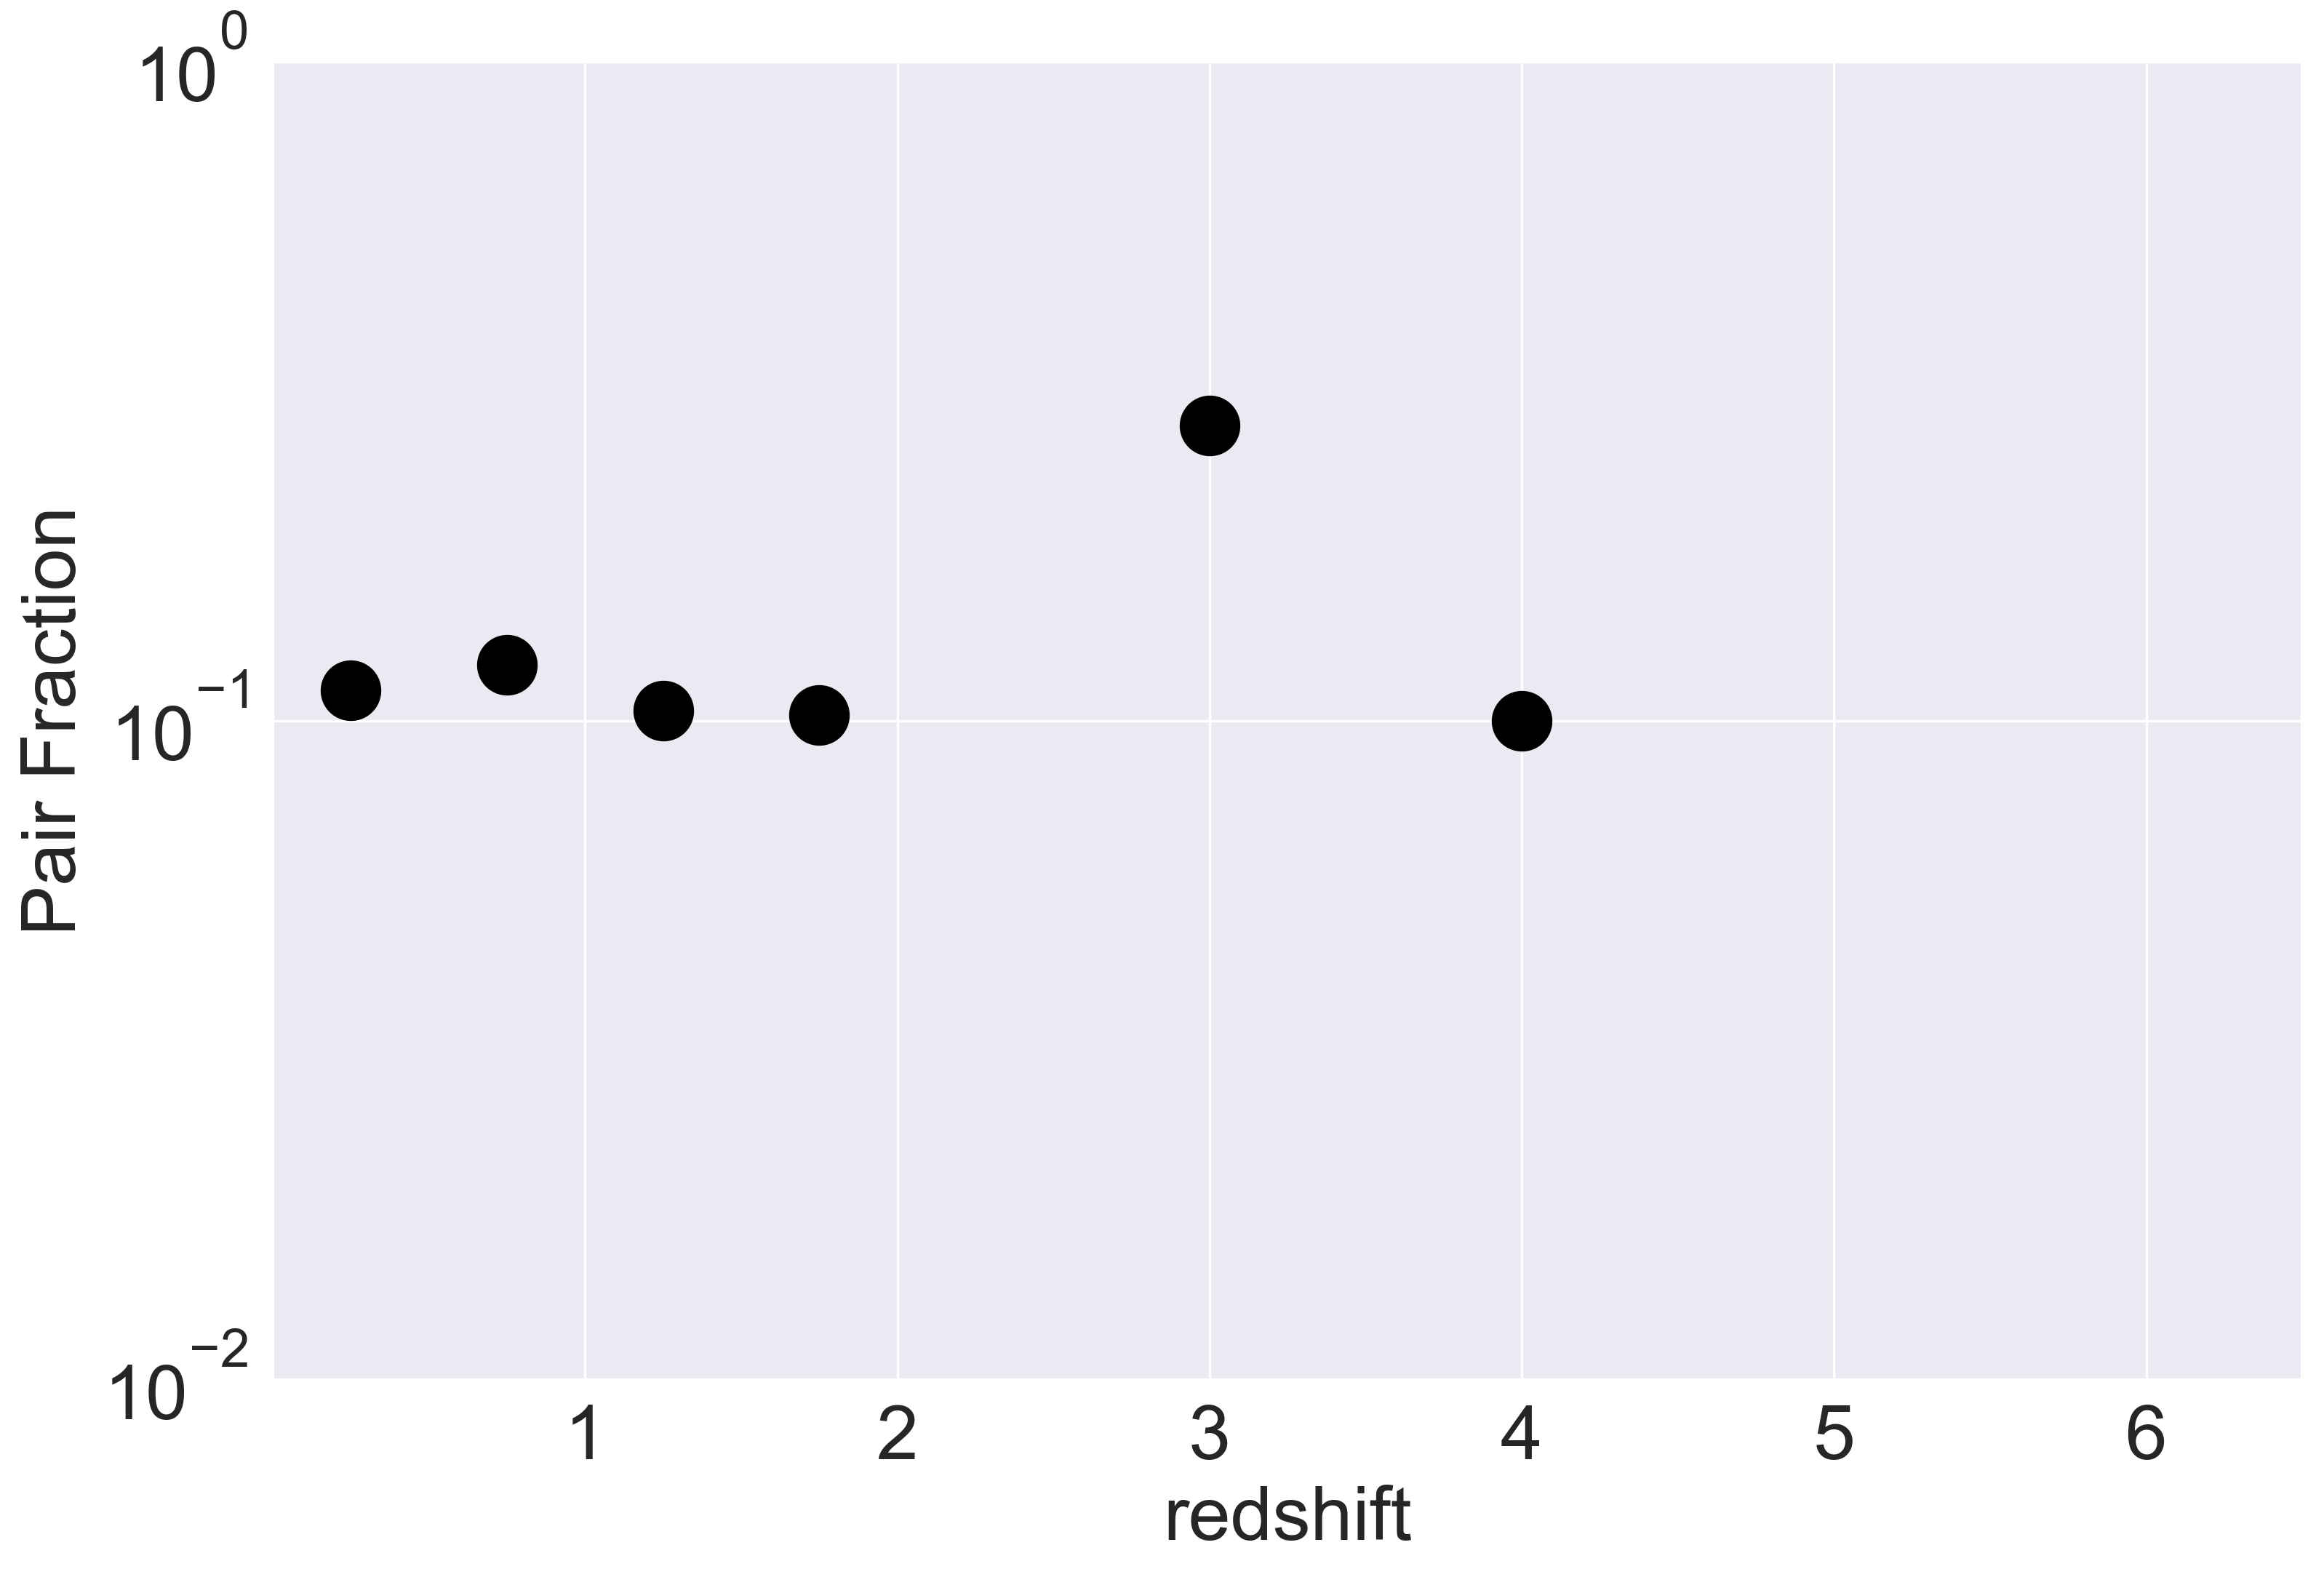

1209 possible primaries found, 27093 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 139
Pairs detected for this bin: 16
Pair fraction for this bin: 0.11510791366906475
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 241
Pairs detected for this bin: 18
Pair fraction for this bin: 0.07468879668049792
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 260
Pairs detected for this bin: 31
Pair fraction for this bin: 0.11923076923076924
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 215
Pairs detected for this bin: 22
Pair fraction for this bin: 0.10232558139534884
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 162
Pairs detected for this bin: 19
Pair fraction for this bin: 0.11728395061728394

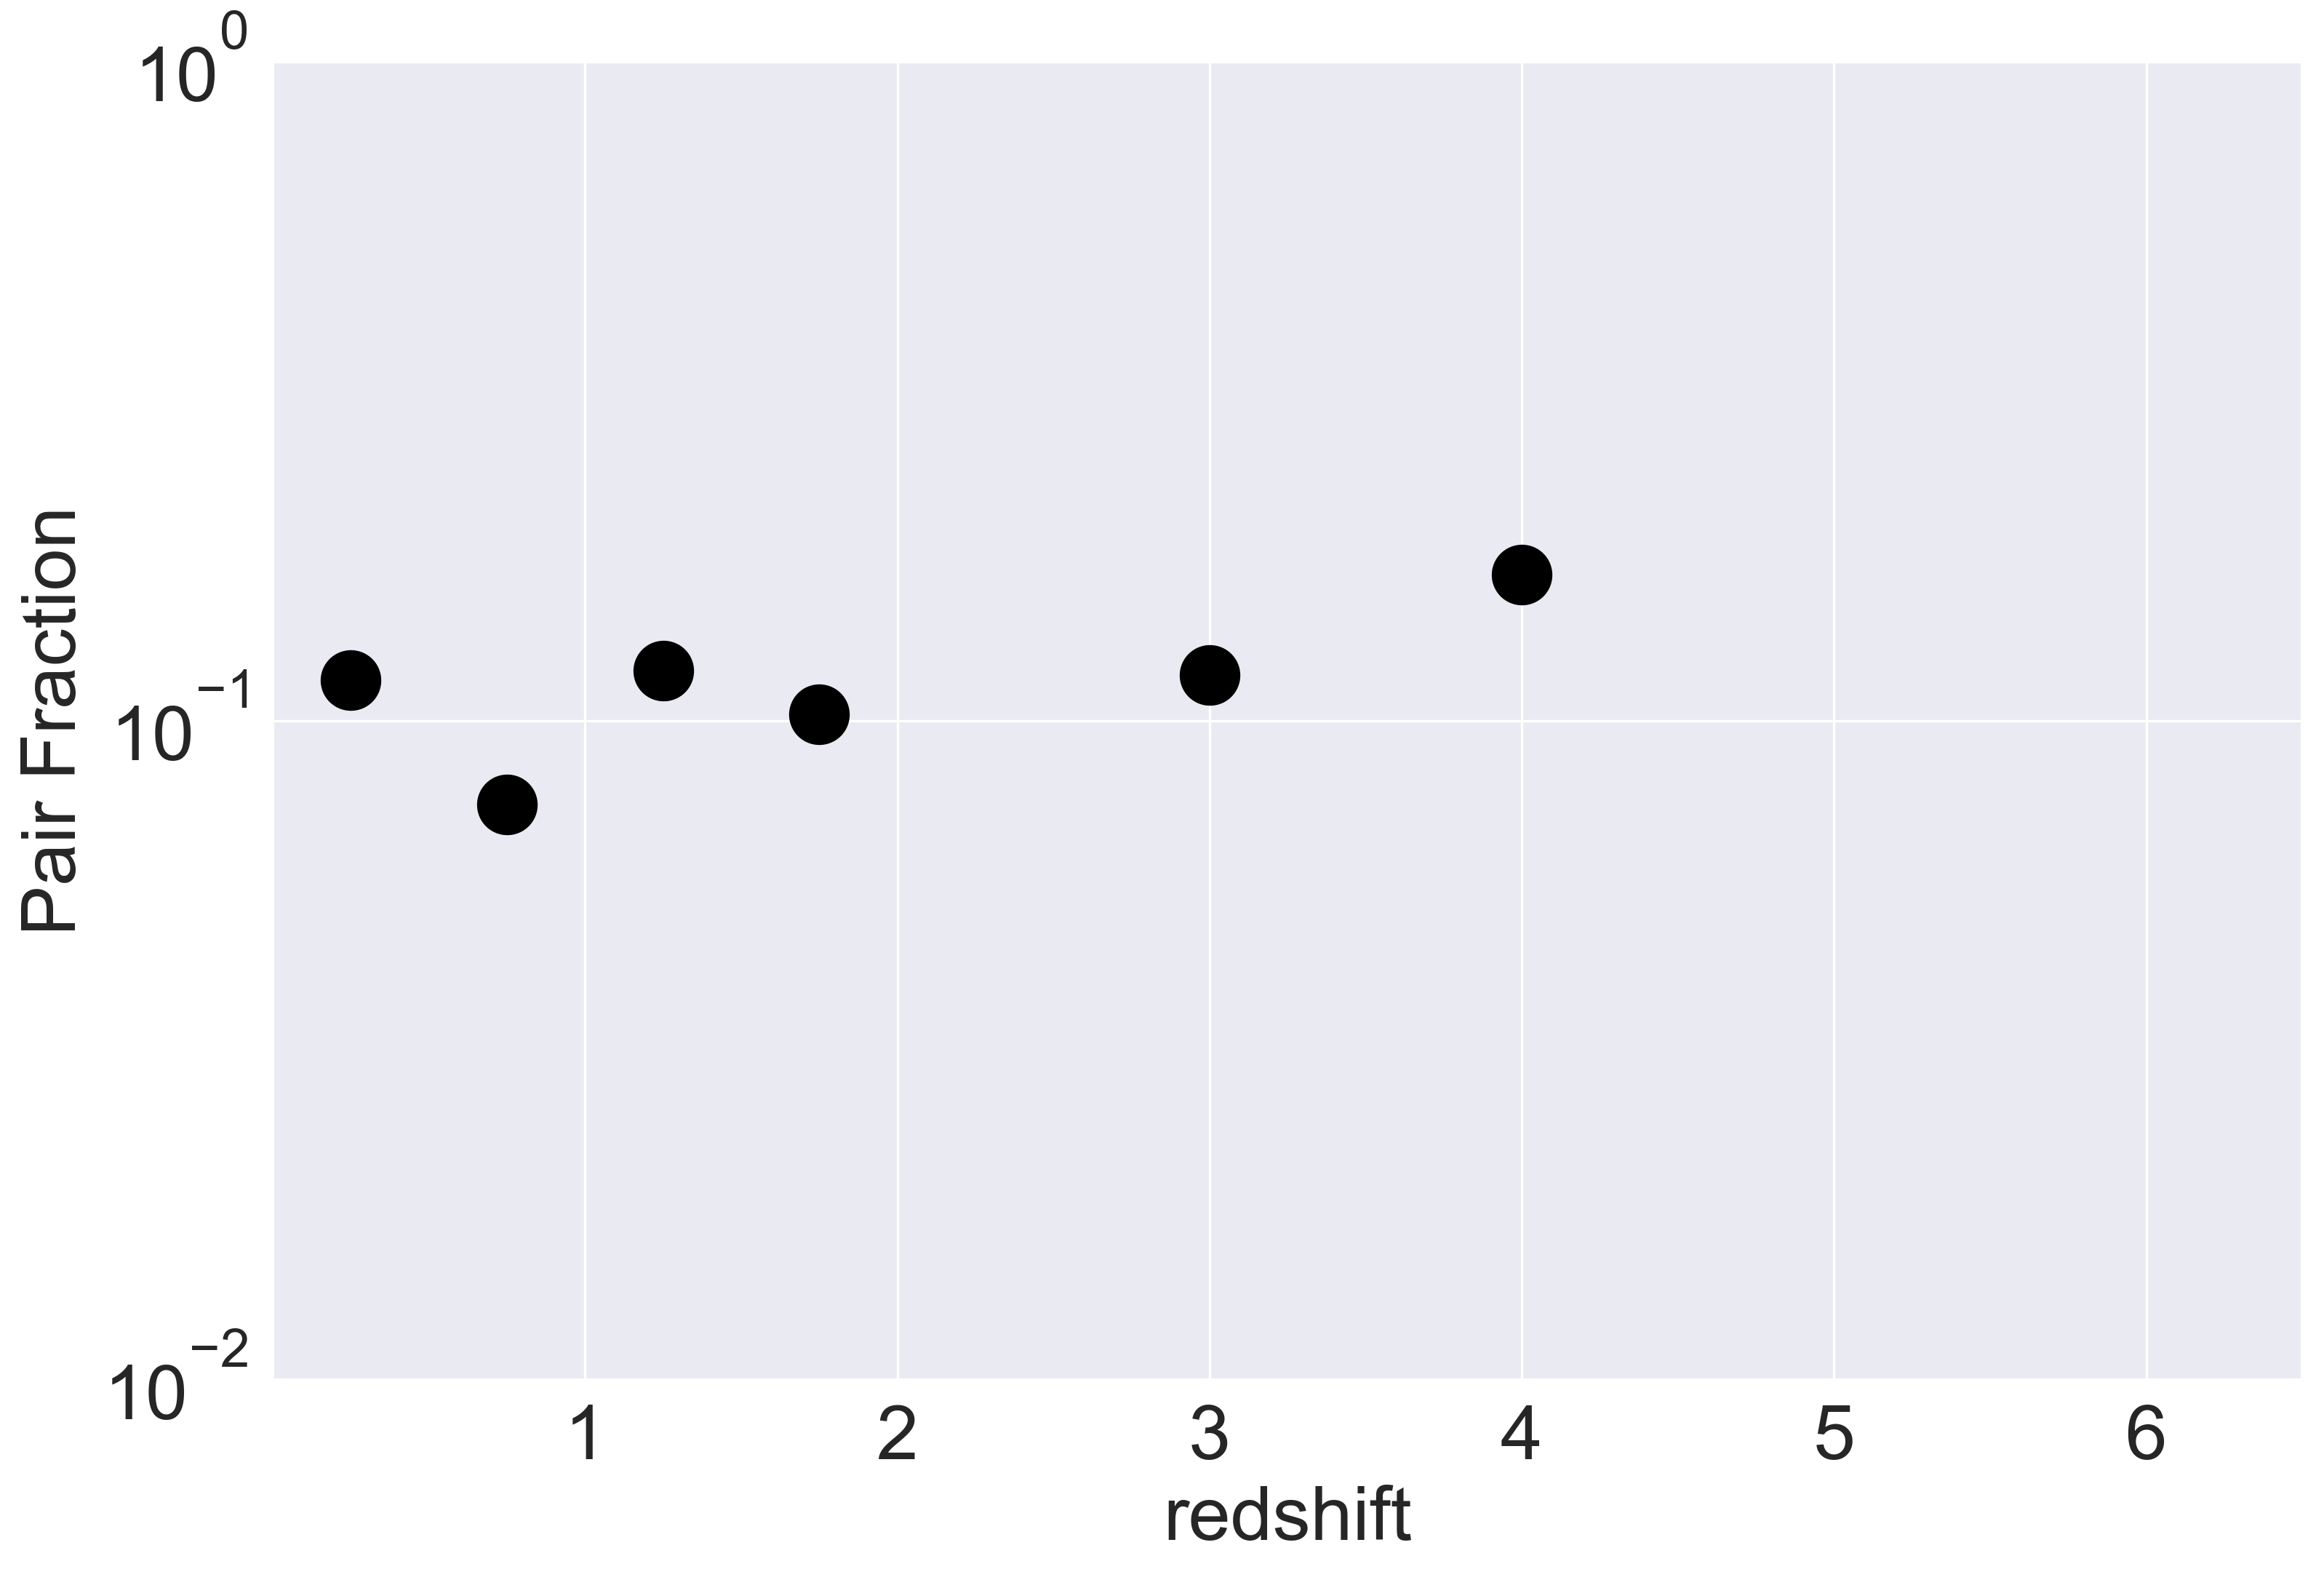

1089 possible primaries found, 26250 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 57
Pairs detected for this bin: 2
Pair fraction for this bin: 0.03508771929824561
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 202
Pairs detected for this bin: 26
Pair fraction for this bin: 0.12871287128712872
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 275
Pairs detected for this bin: 33
Pair fraction for this bin: 0.12
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 293
Pairs detected for this bin: 35
Pair fraction for this bin: 0.11945392491467577
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 93
Pairs detected for this bin: 14
Pair fraction for this bin: 0.15053763440860216
-----------------

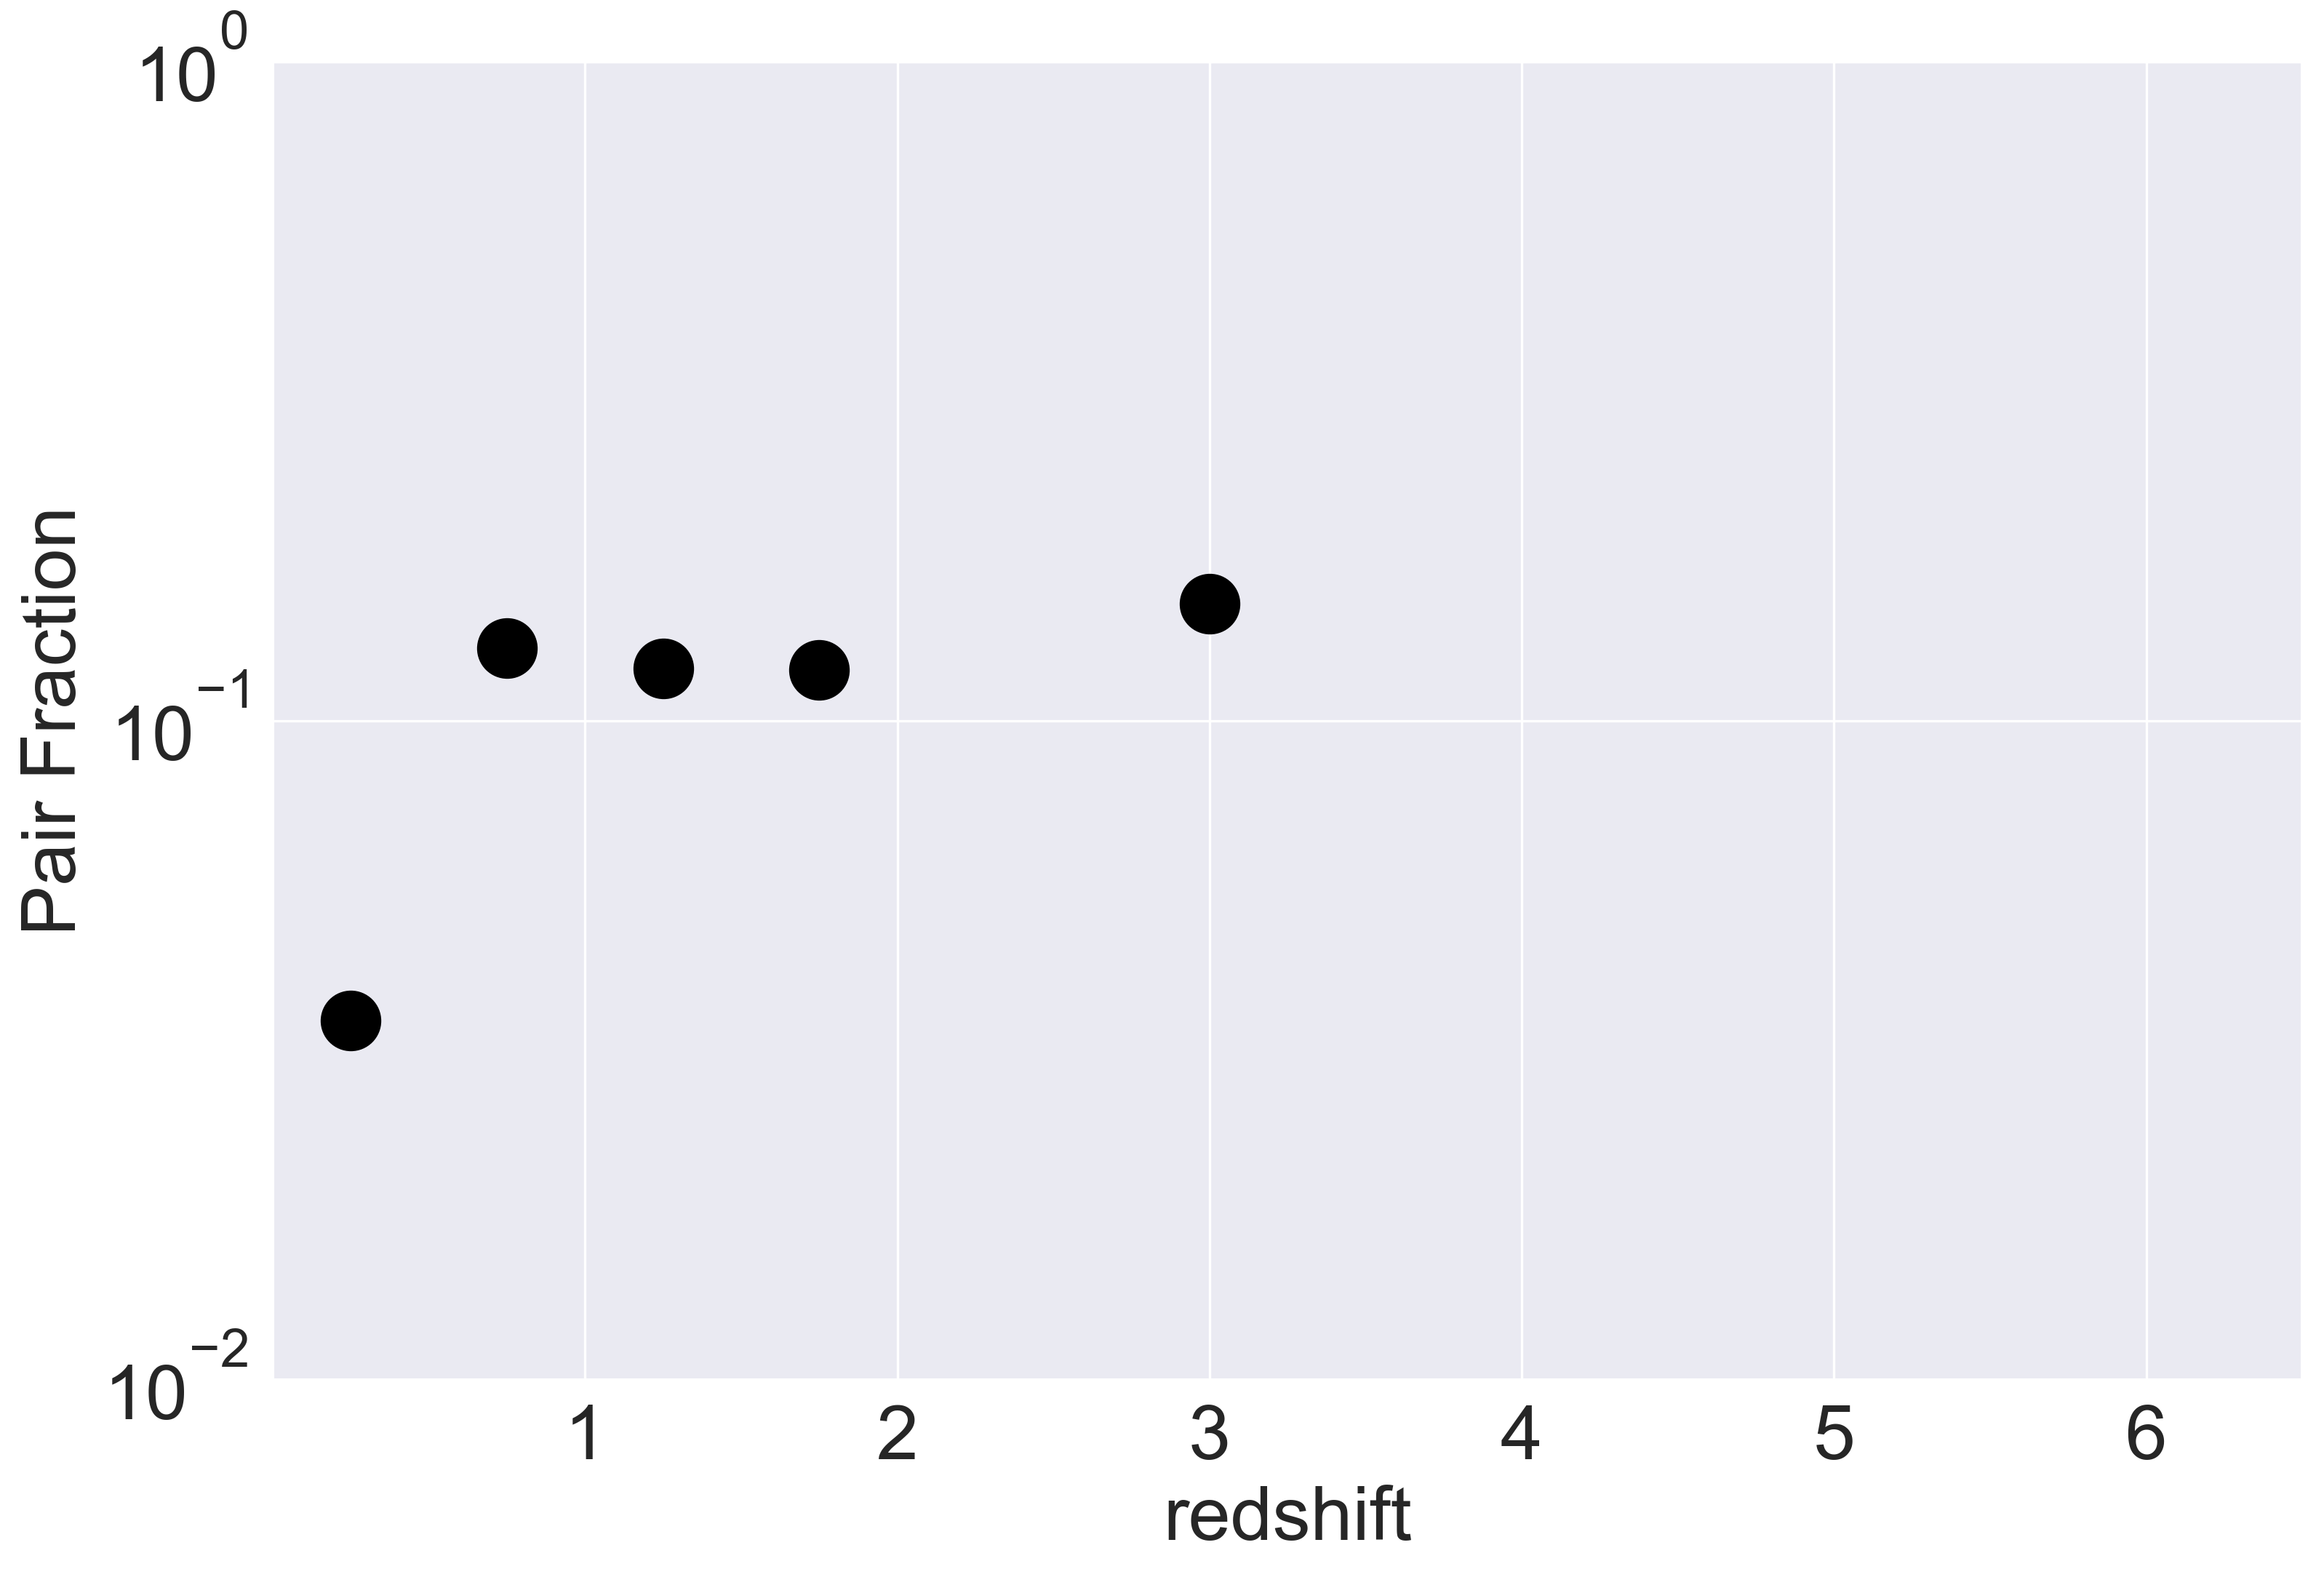

861 possible primaries found, 27354 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 22
Pairs detected for this bin: 2
Pair fraction for this bin: 0.09090909090909091
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 262
Pairs detected for this bin: 30
Pair fraction for this bin: 0.11450381679389313
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 209
Pairs detected for this bin: 23
Pair fraction for this bin: 0.11004784688995216
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 159
Pairs detected for this bin: 14
Pair fraction for this bin: 0.0880503144654088
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 87
Pairs detected for this bin: 29
Pair fraction for this bin: 0.3333333333333333
-----

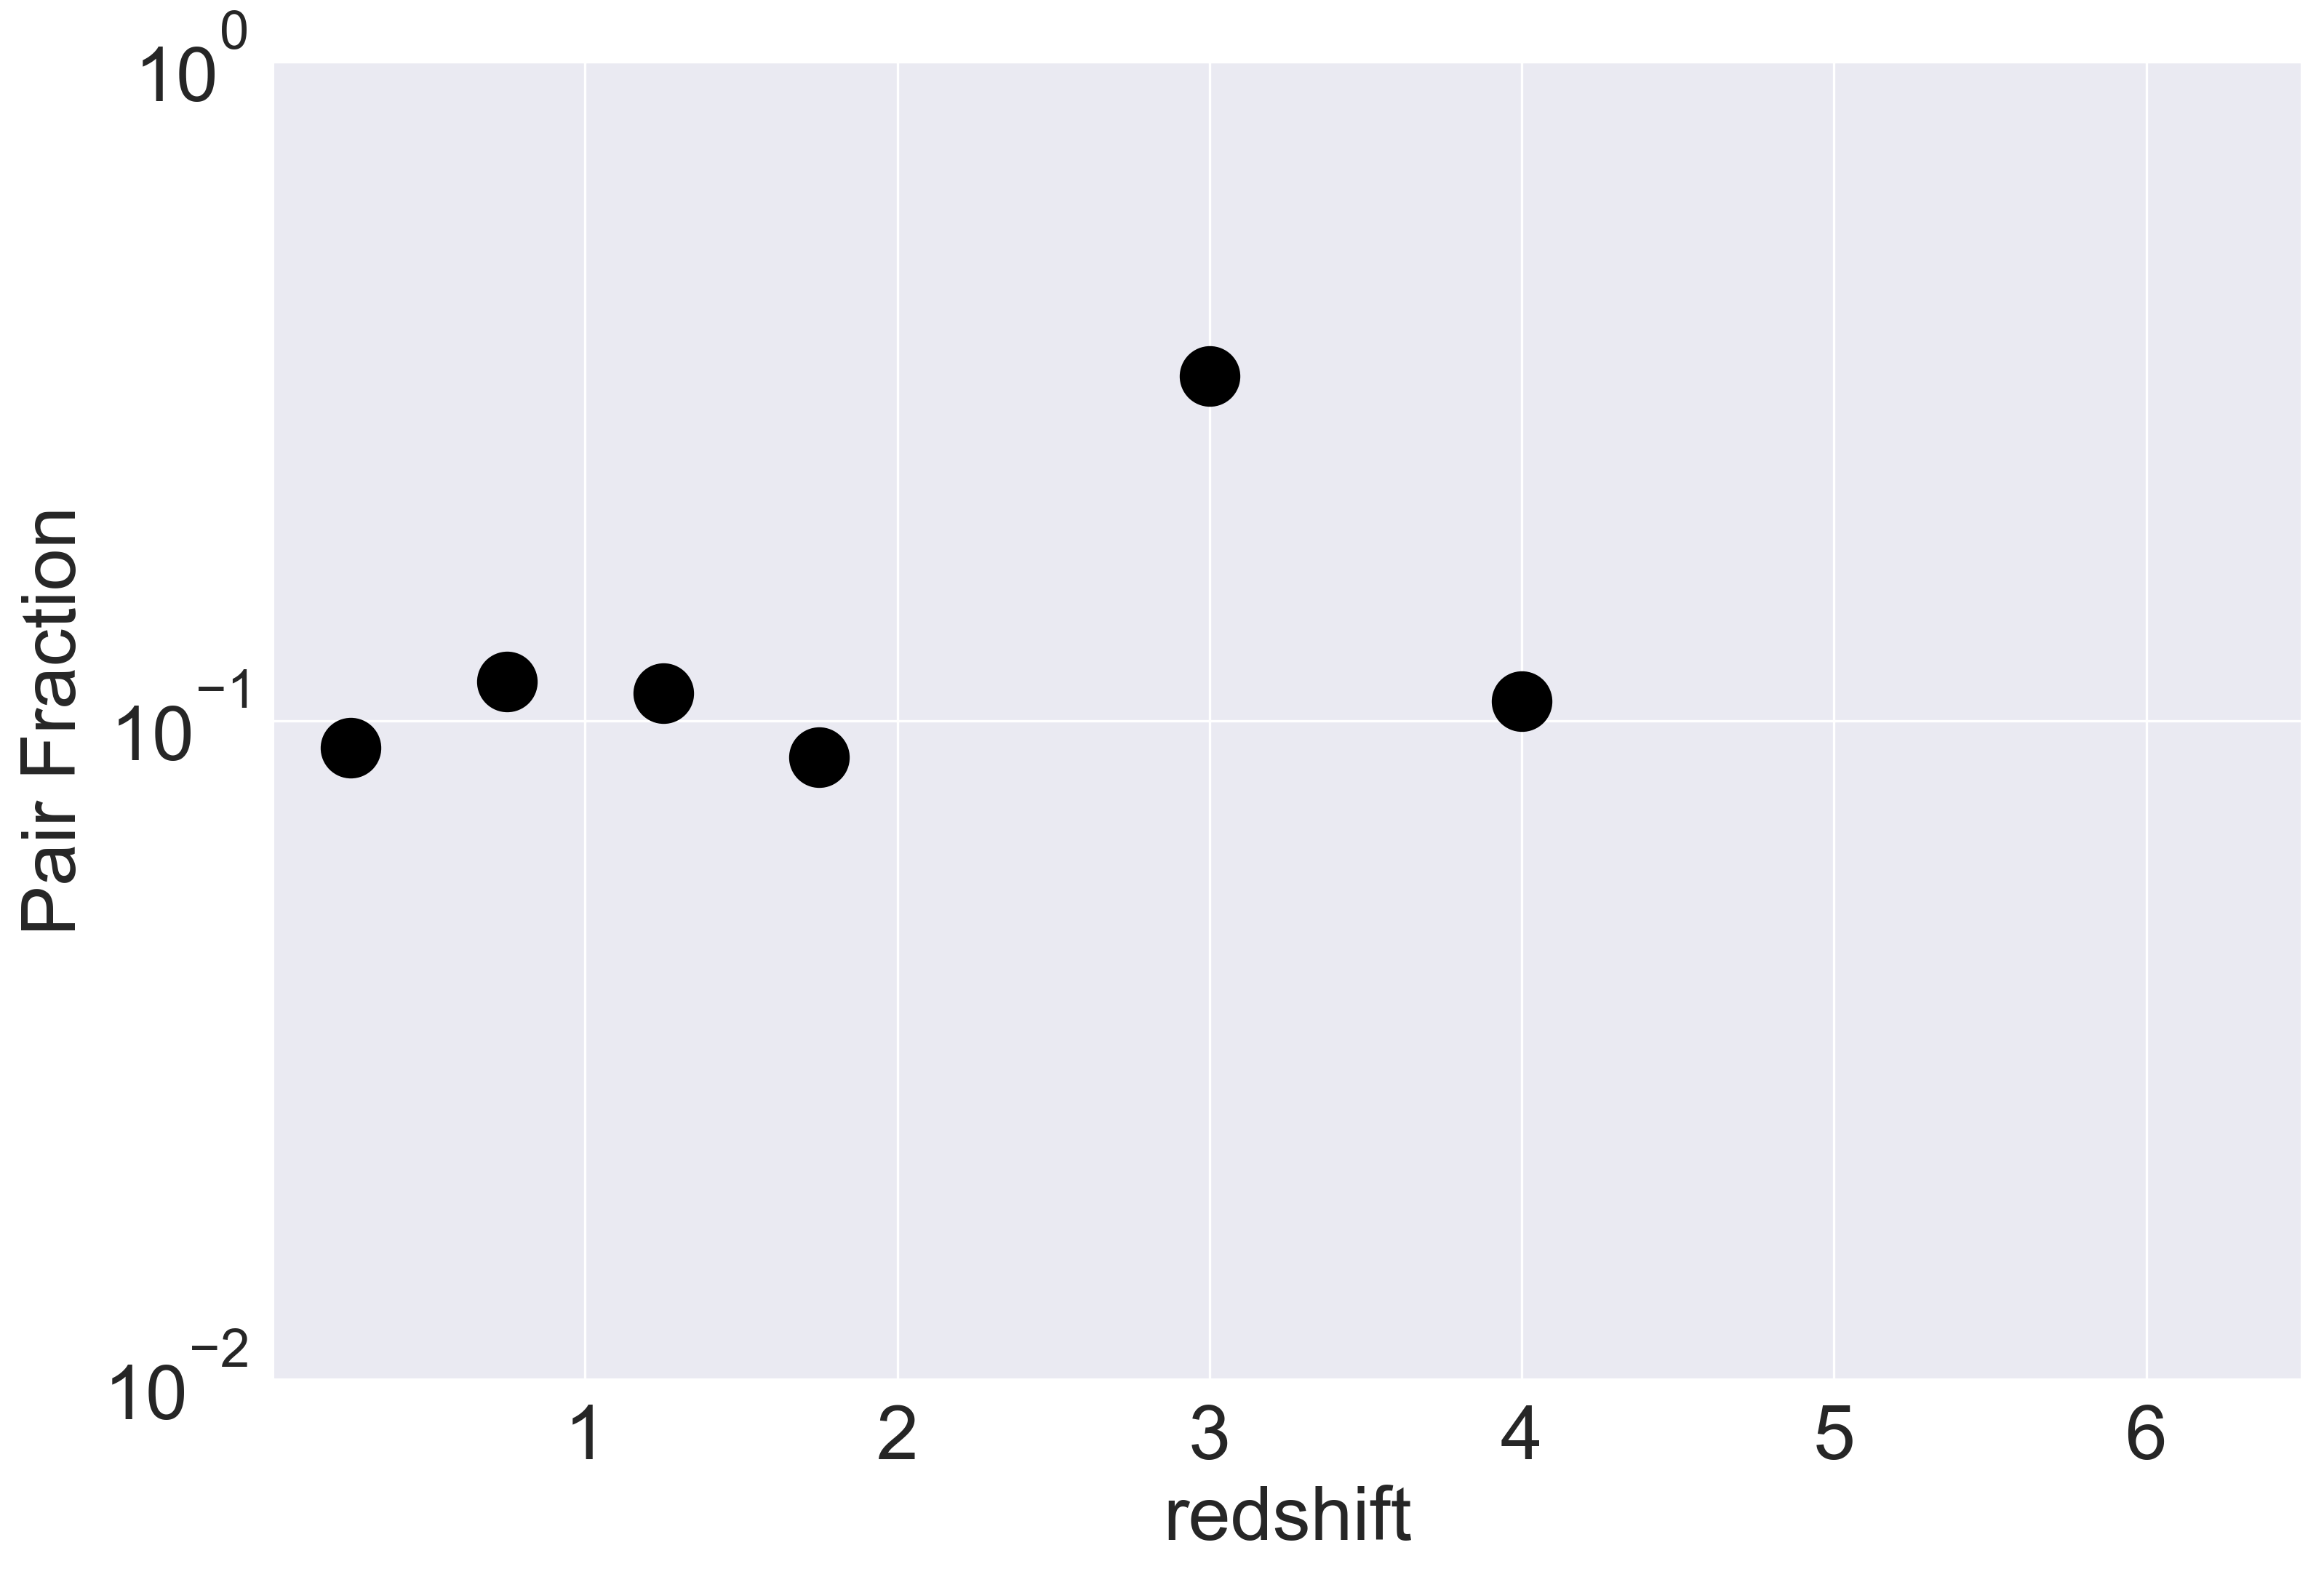

1012 possible primaries found, 27990 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 114
Pairs detected for this bin: 17
Pair fraction for this bin: 0.14912280701754385
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 210
Pairs detected for this bin: 12
Pair fraction for this bin: 0.05714285714285714
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 222
Pairs detected for this bin: 25
Pair fraction for this bin: 0.11261261261261261
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 169
Pairs detected for this bin: 19
Pair fraction for this bin: 0.11242603550295859
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 132
Pairs detected for this bin: 15
Pair fraction for this bin: 0.11363636363636363

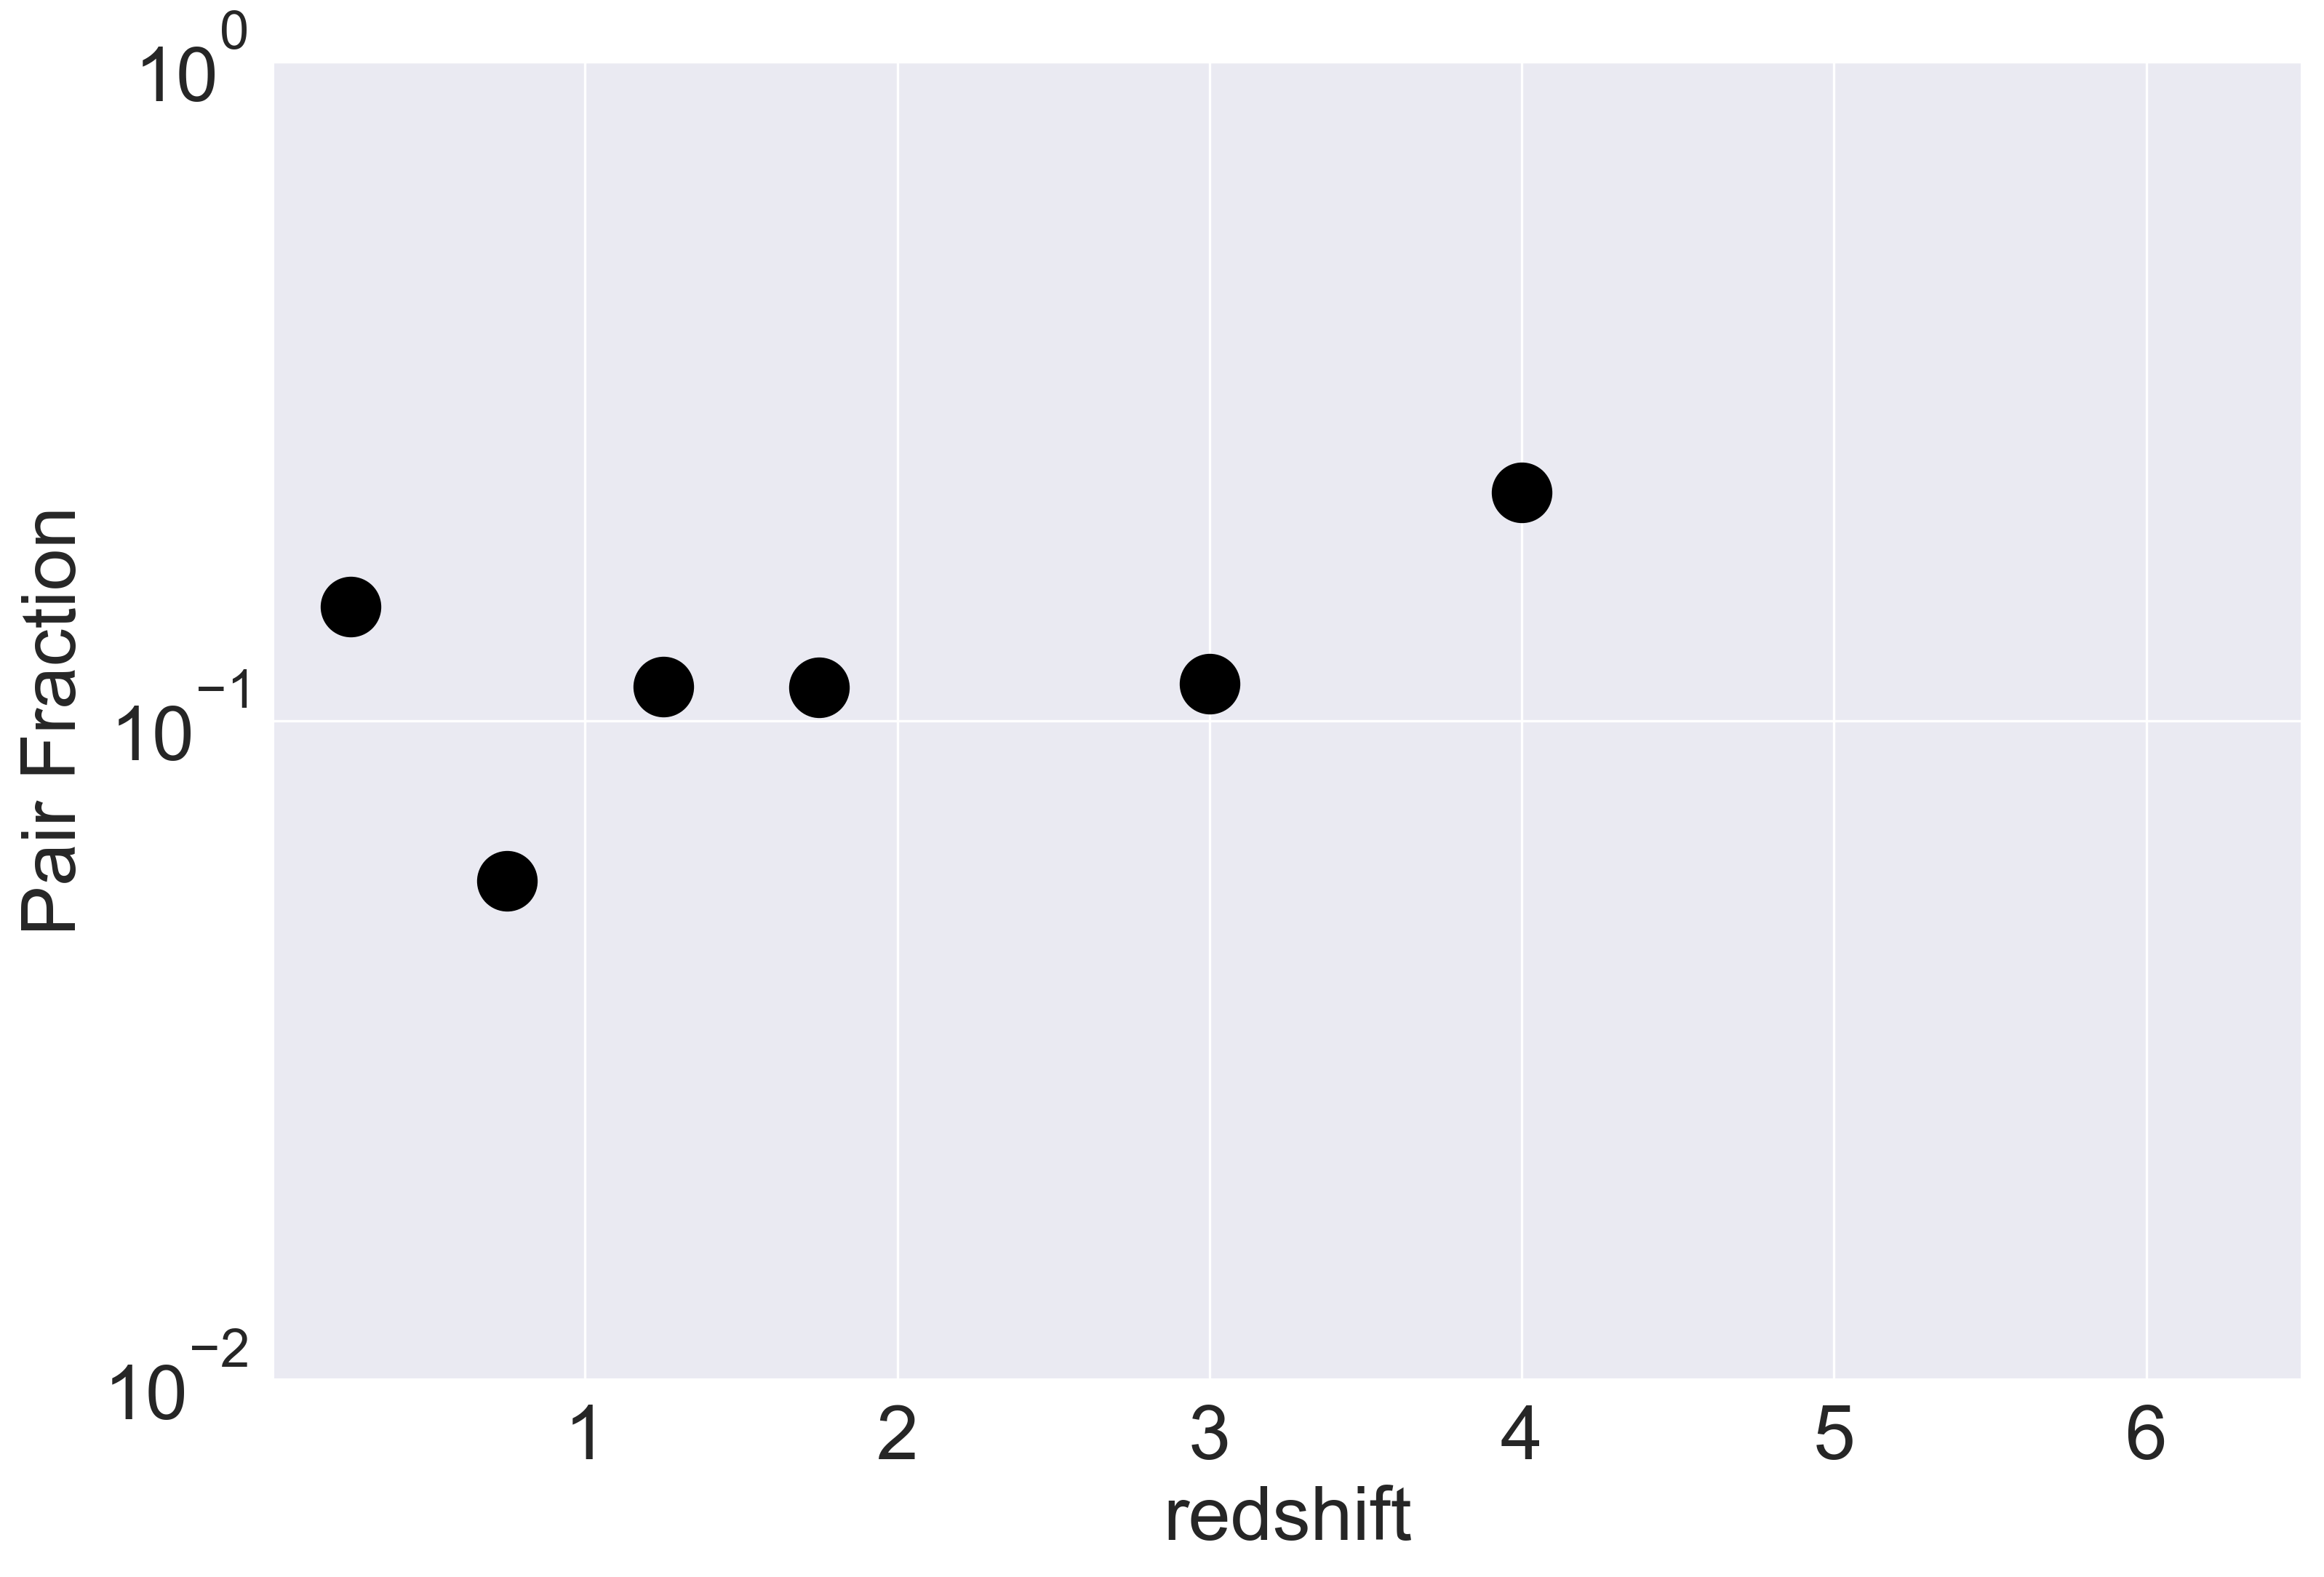

898 possible primaries found, 27000 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 51
Pairs detected for this bin: 1
Pair fraction for this bin: 0.0196078431372549
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 183
Pairs detected for this bin: 18
Pair fraction for this bin: 0.09836065573770492
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 224
Pairs detected for this bin: 23
Pair fraction for this bin: 0.10267857142857142
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 225
Pairs detected for this bin: 26
Pair fraction for this bin: 0.11555555555555555
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 77
Pairs detected for this bin: 12
Pair fraction for this bin: 0.15584415584415584
----

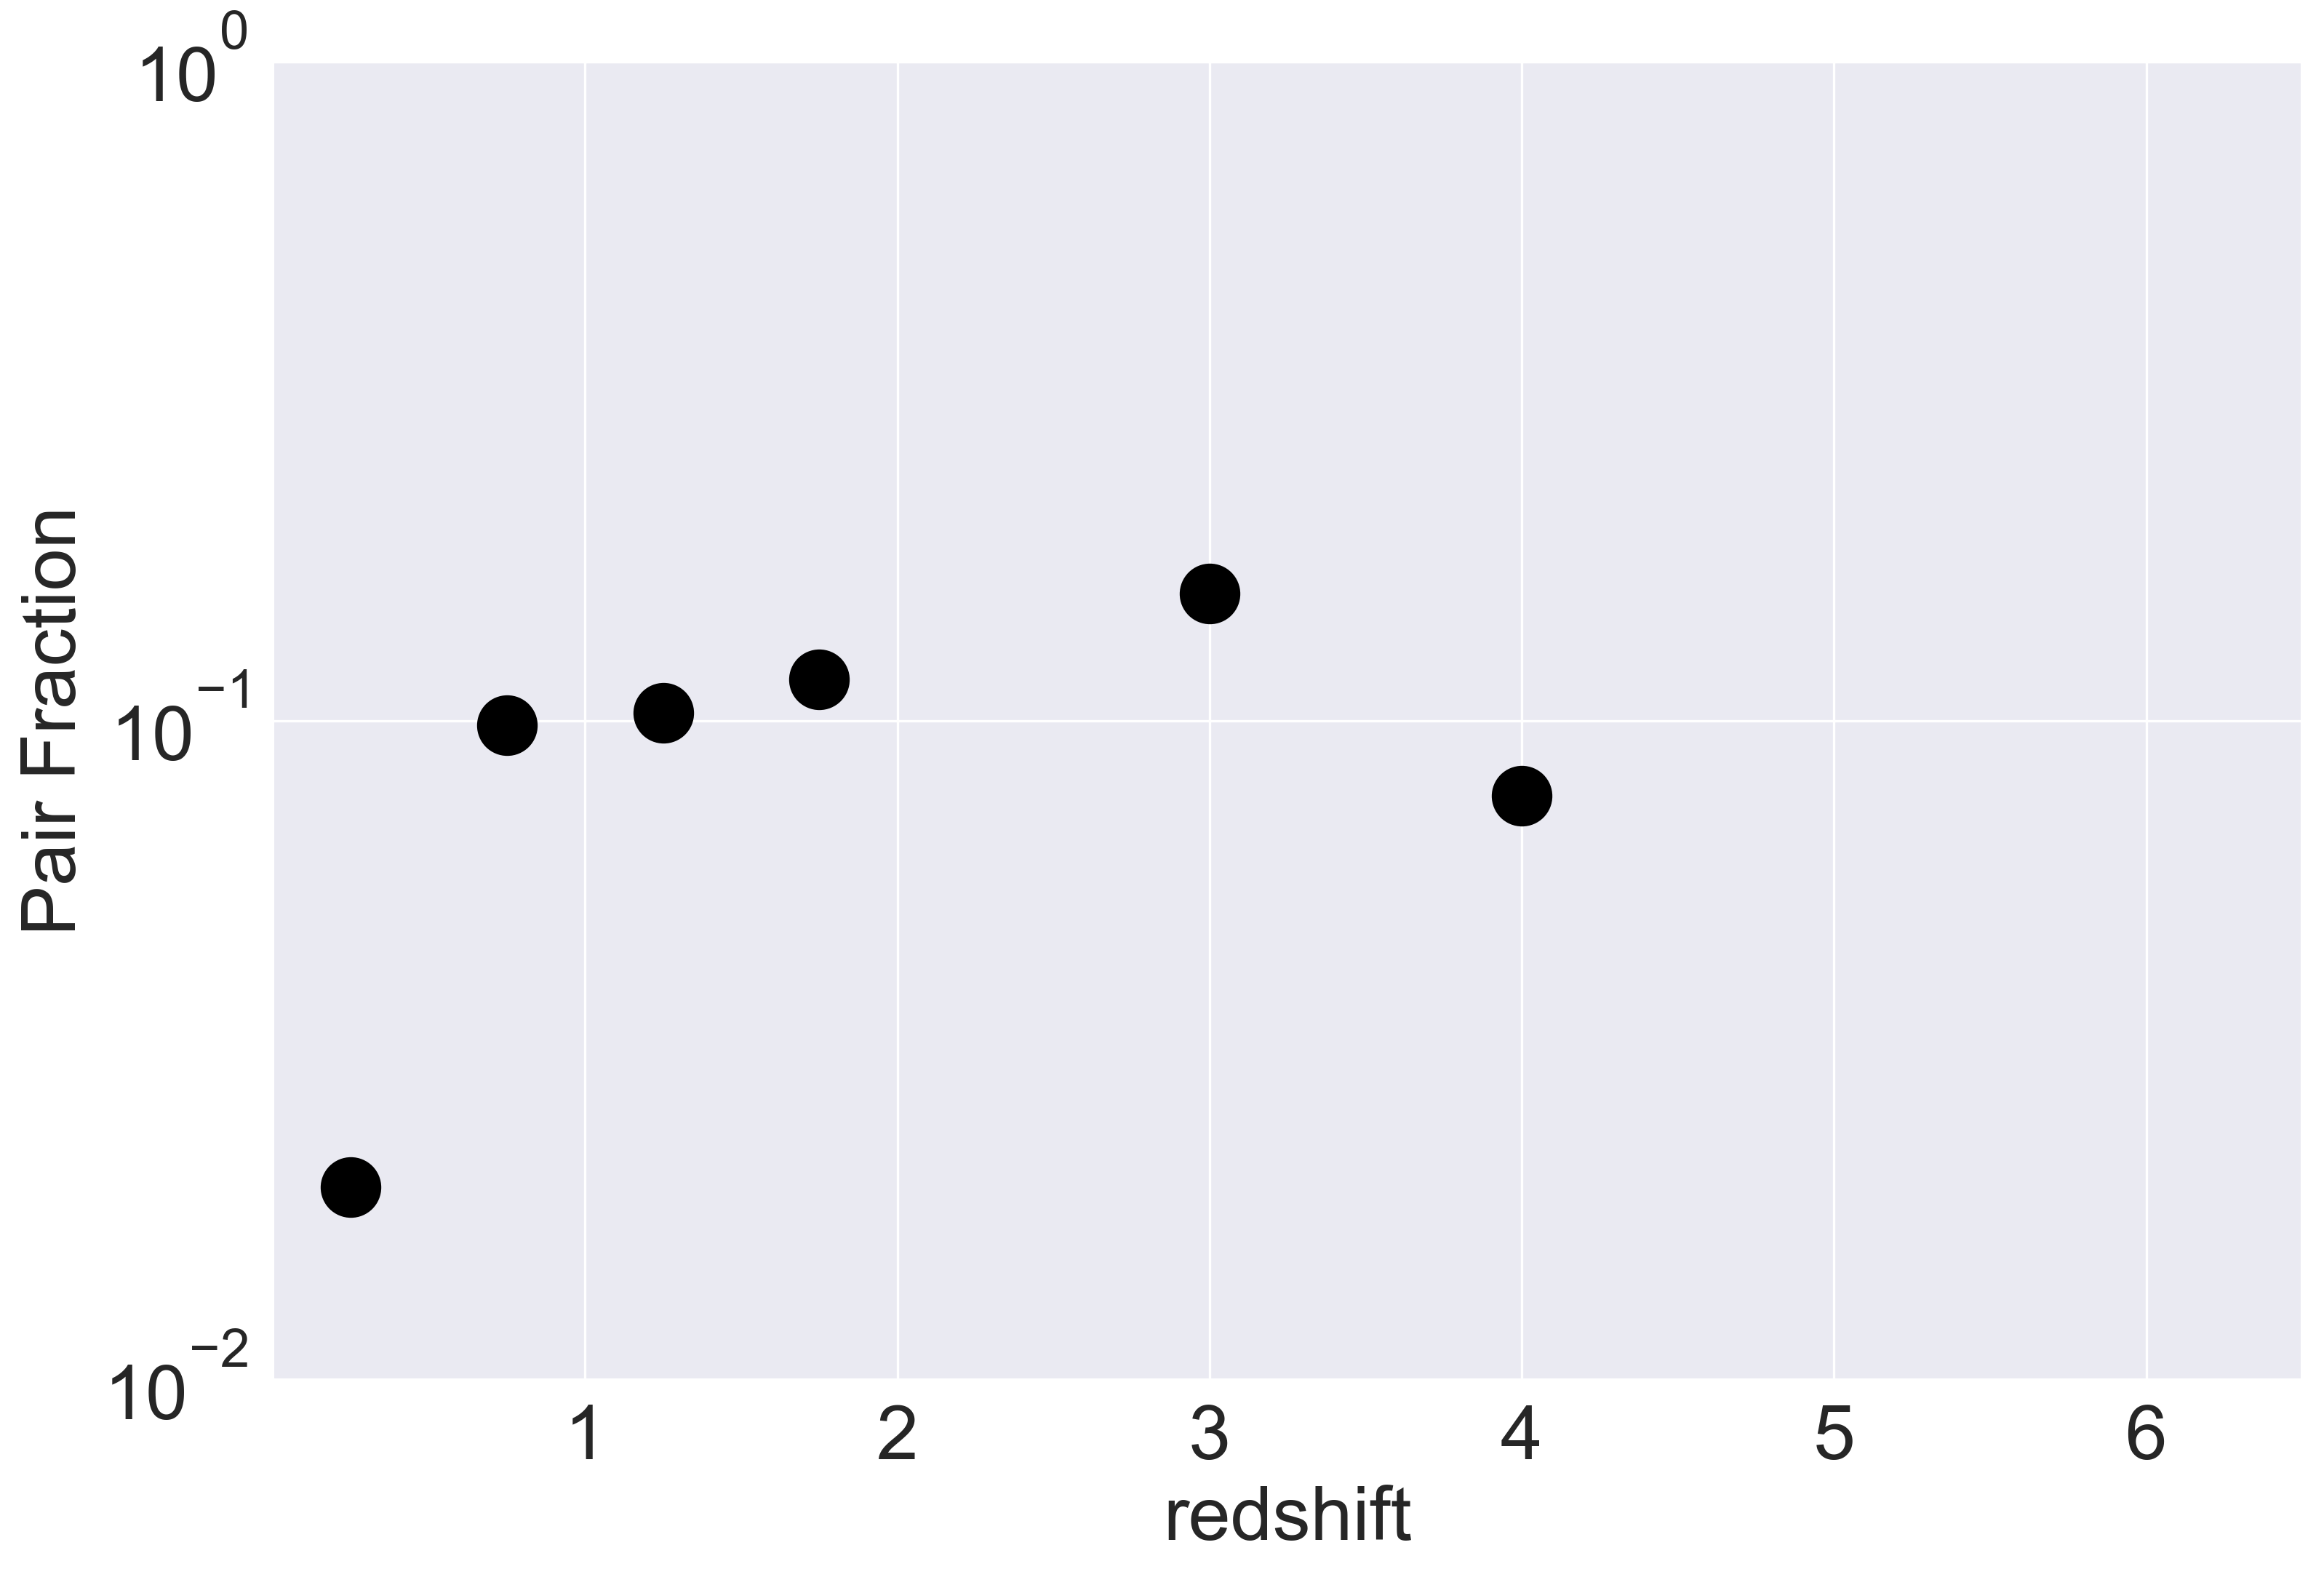

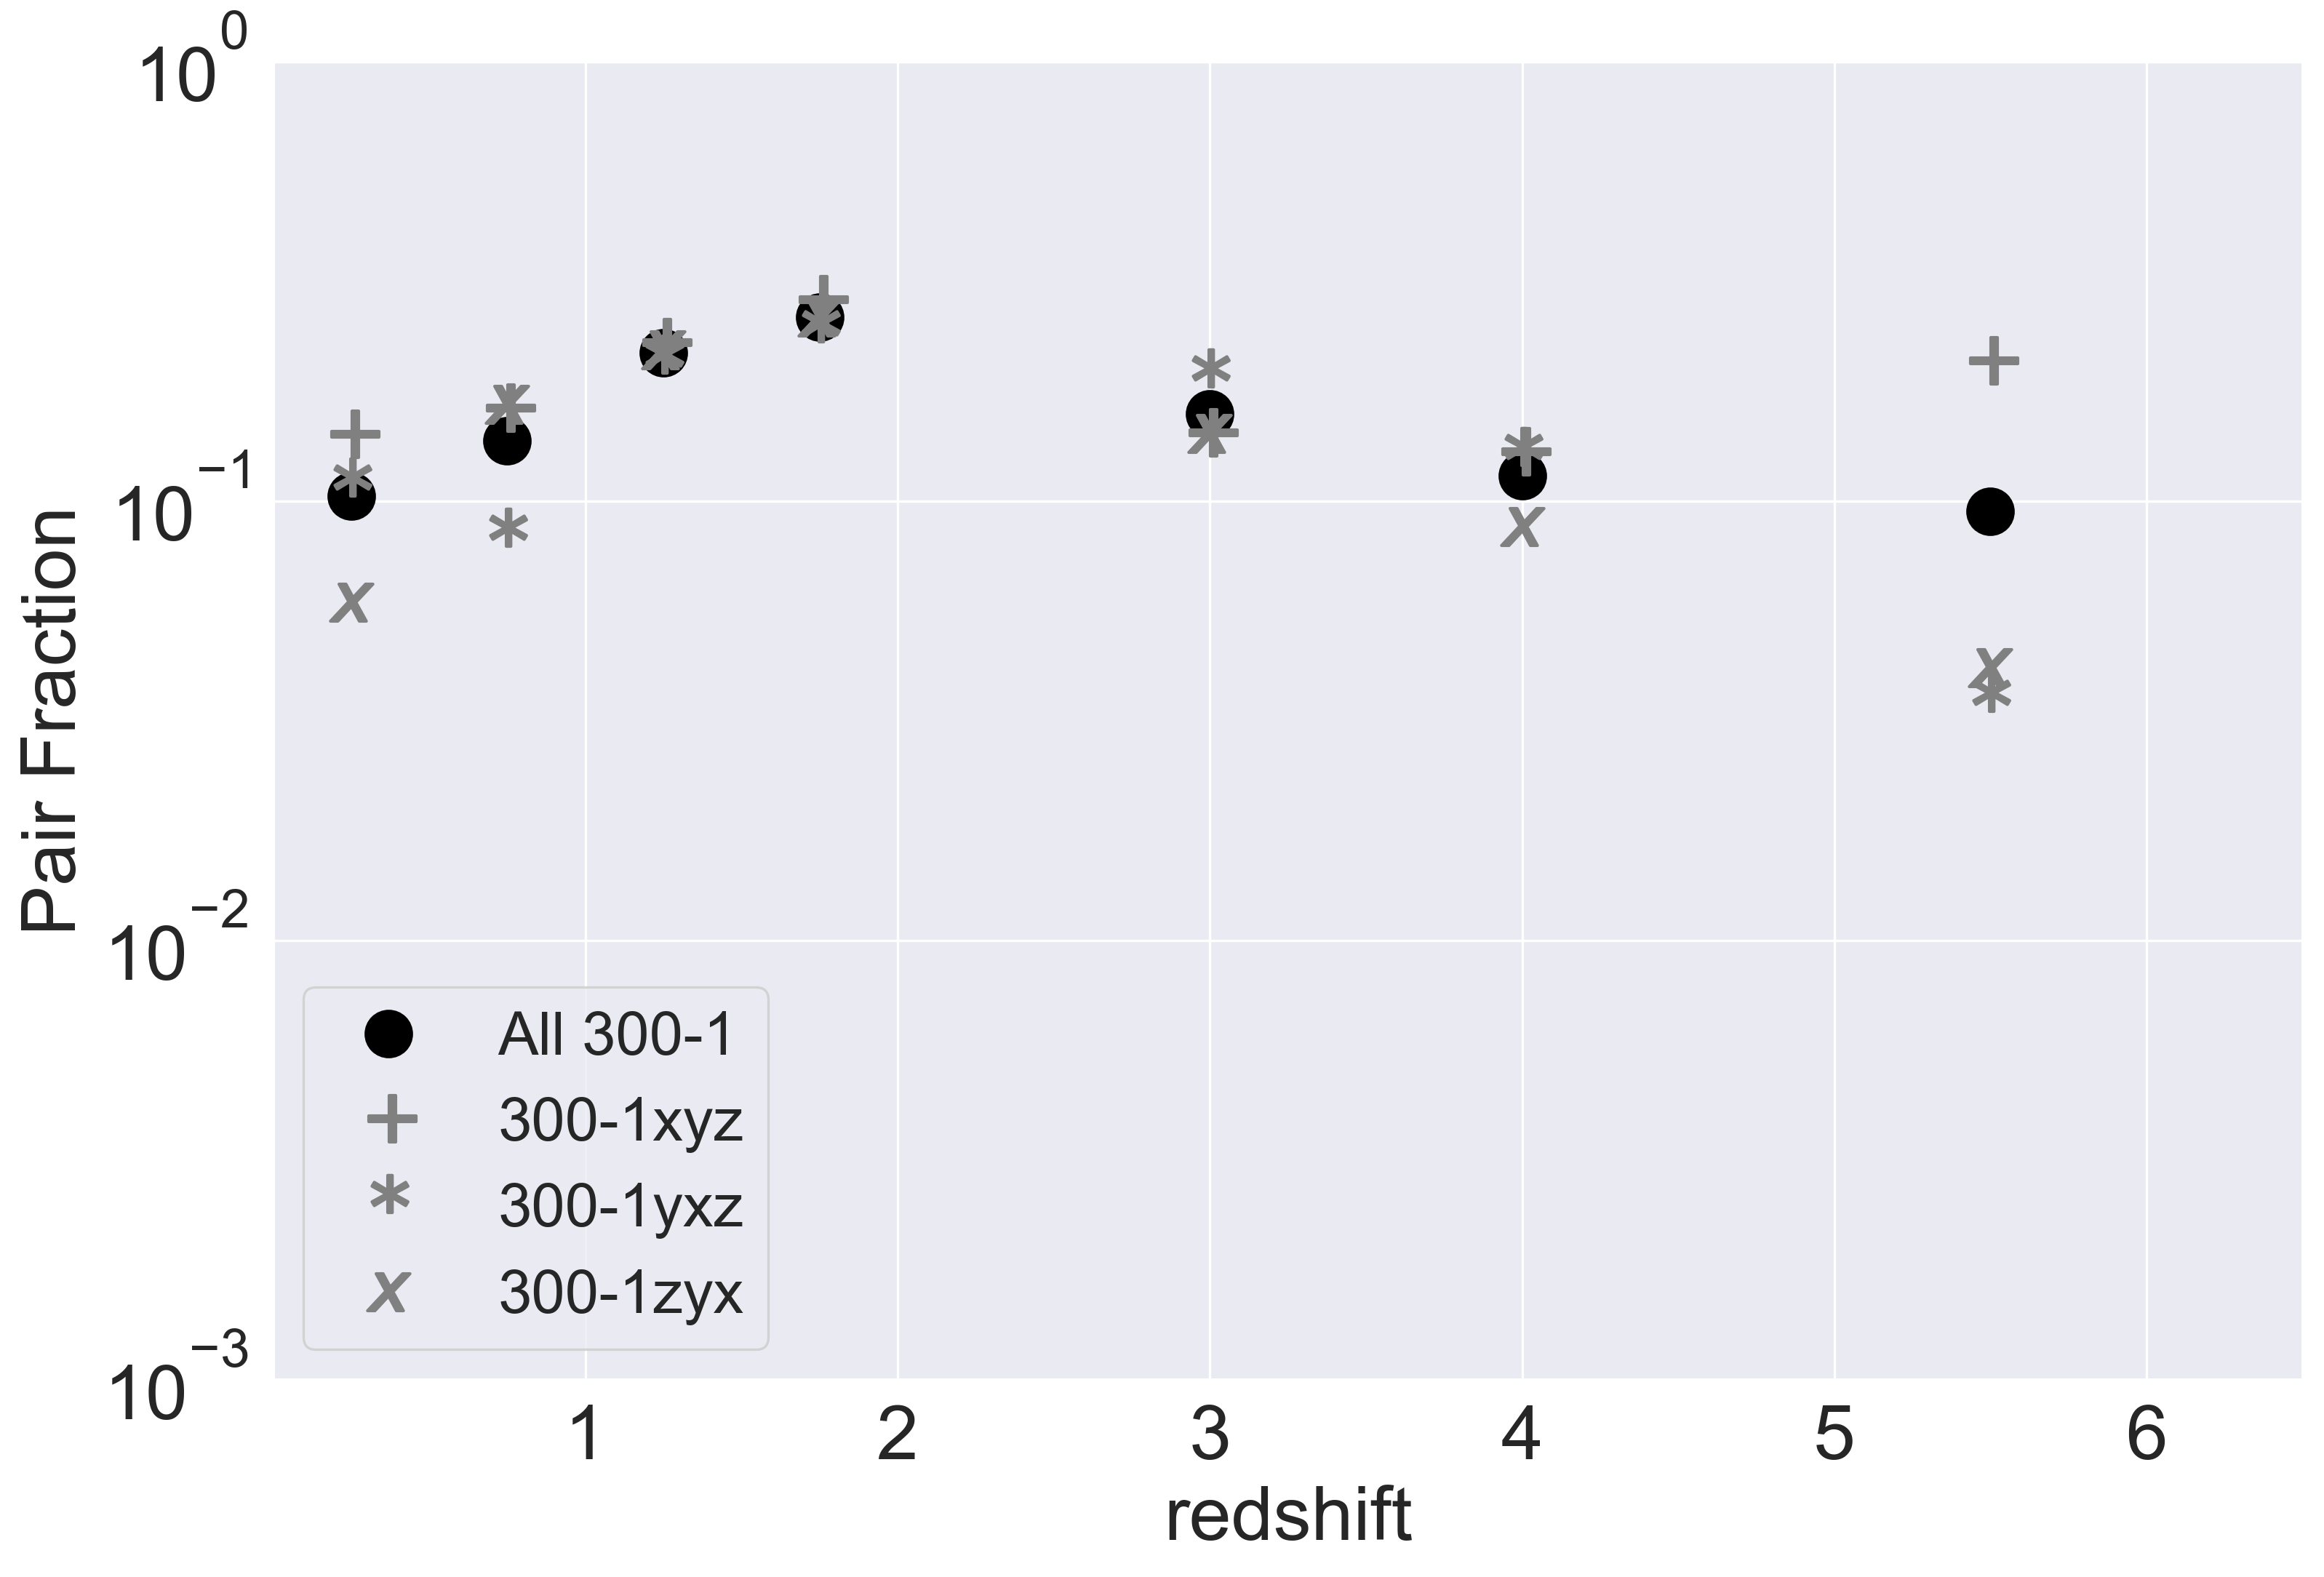

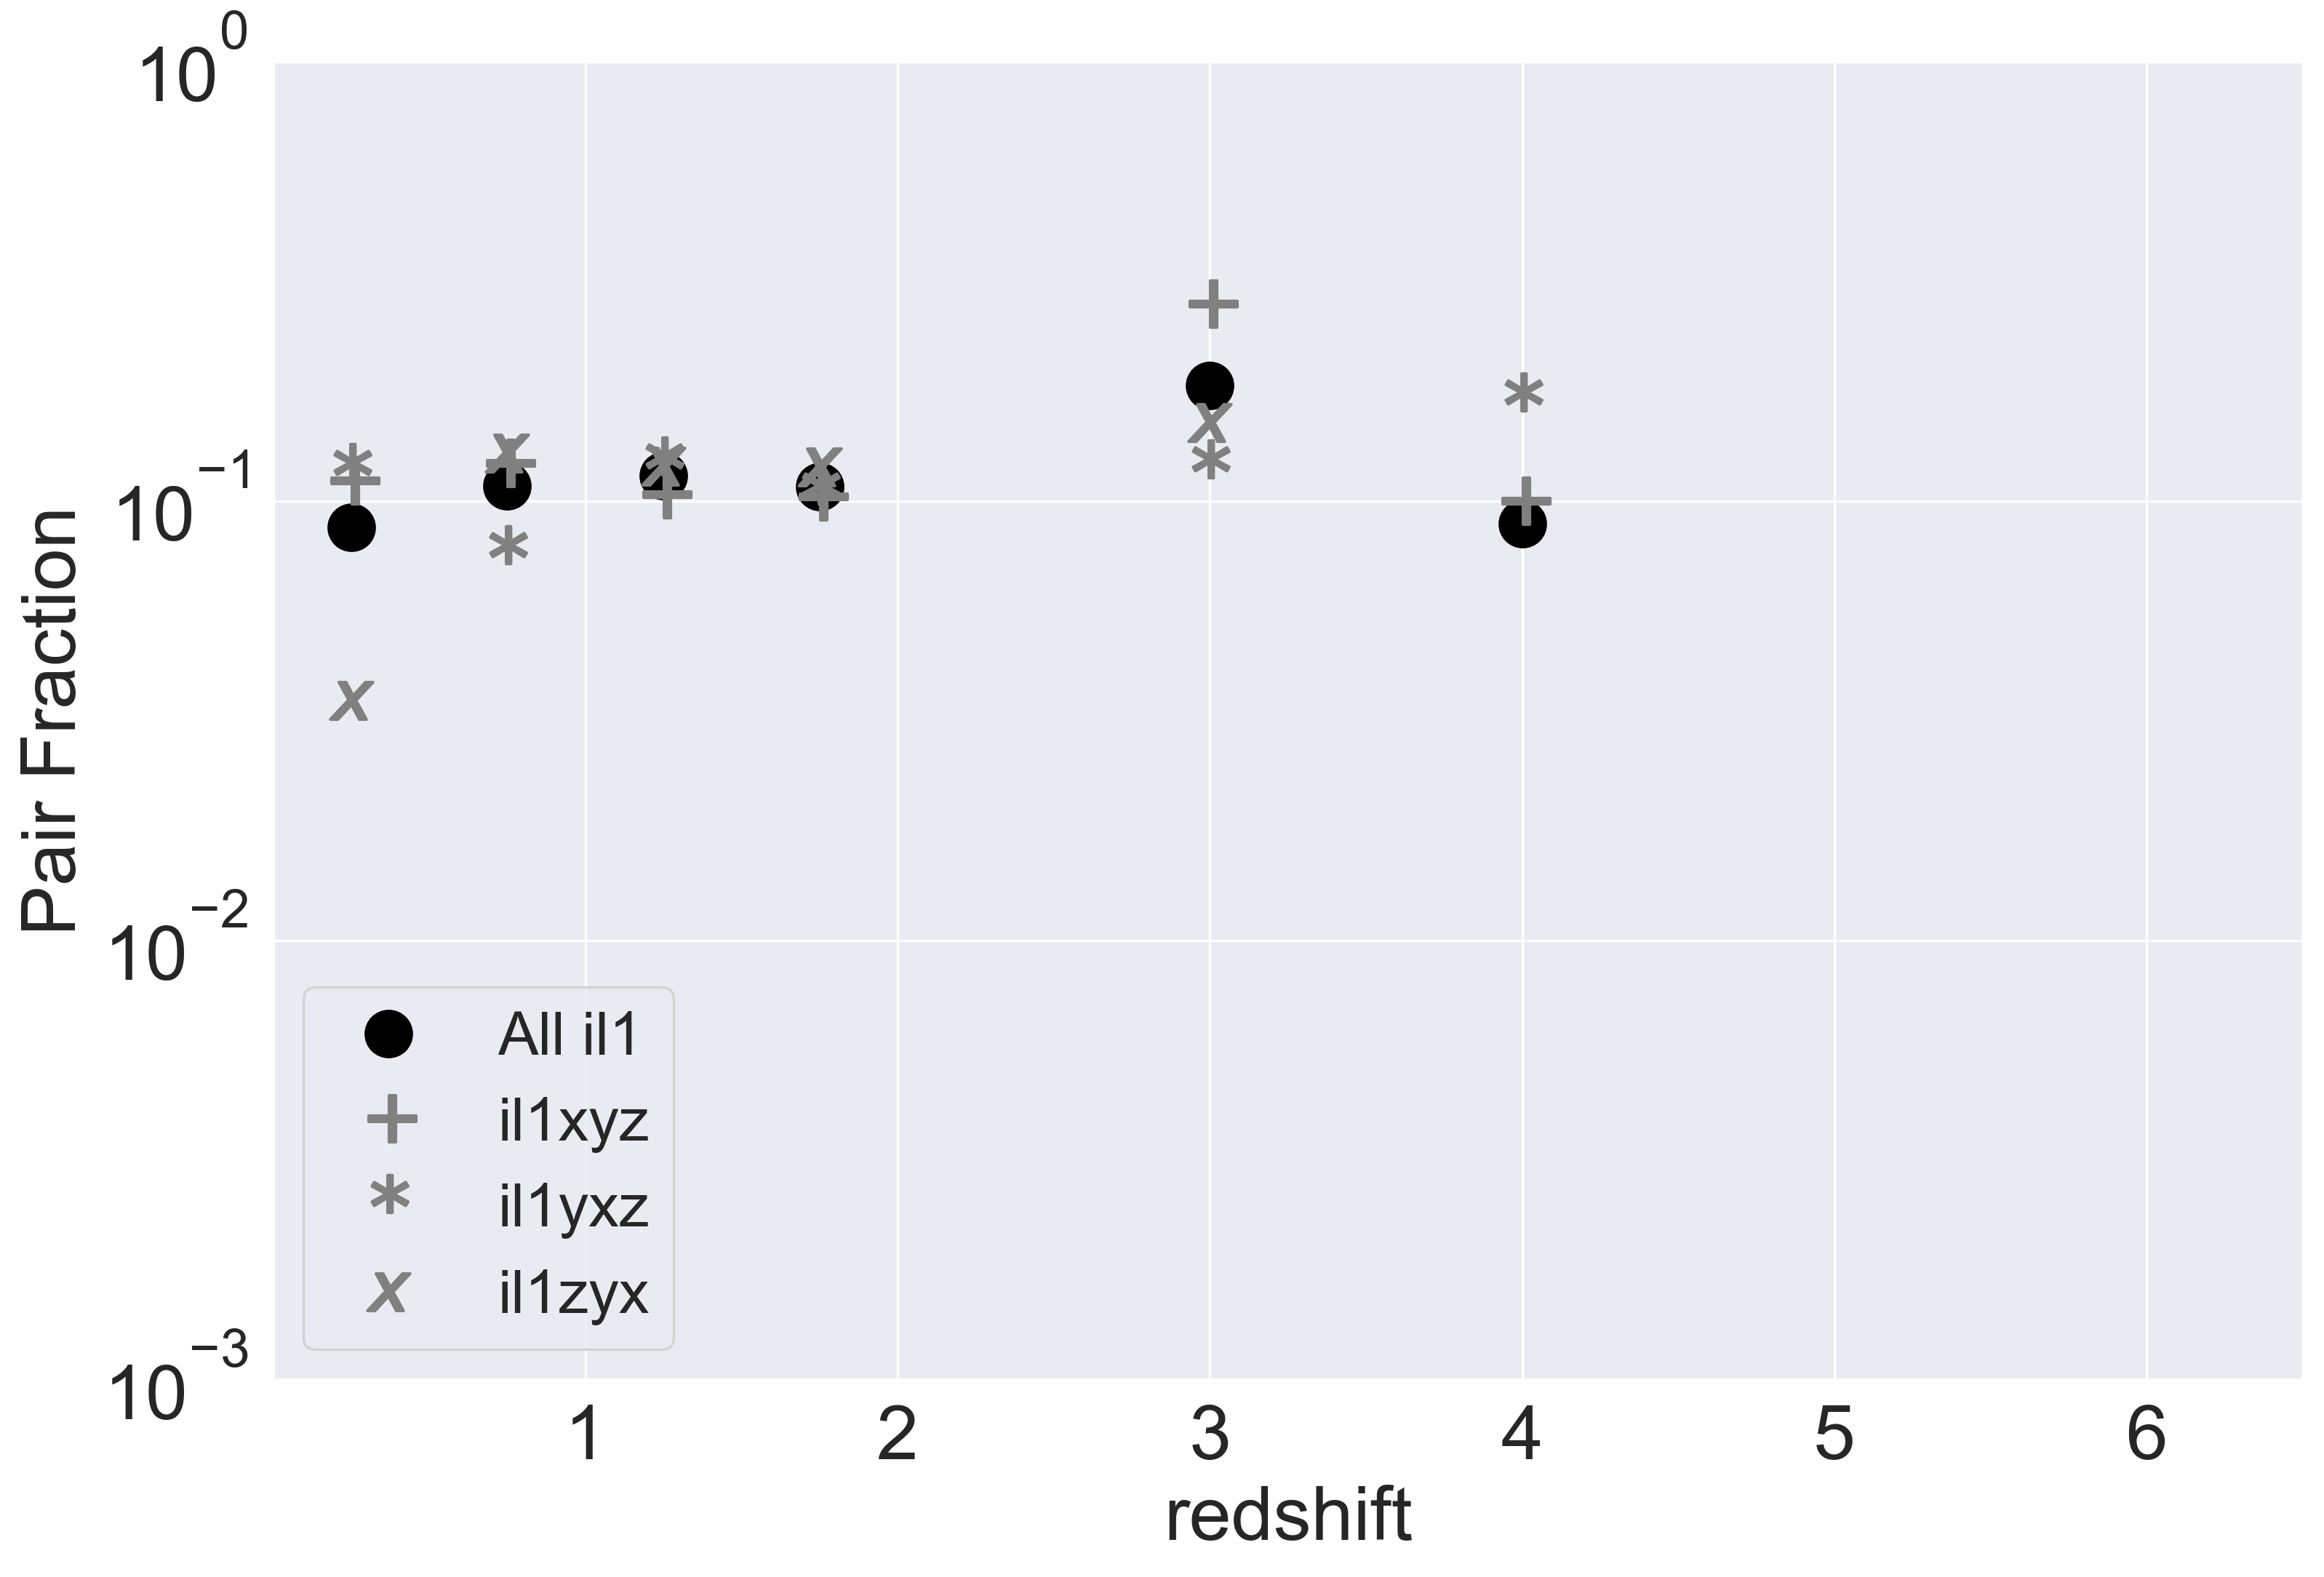

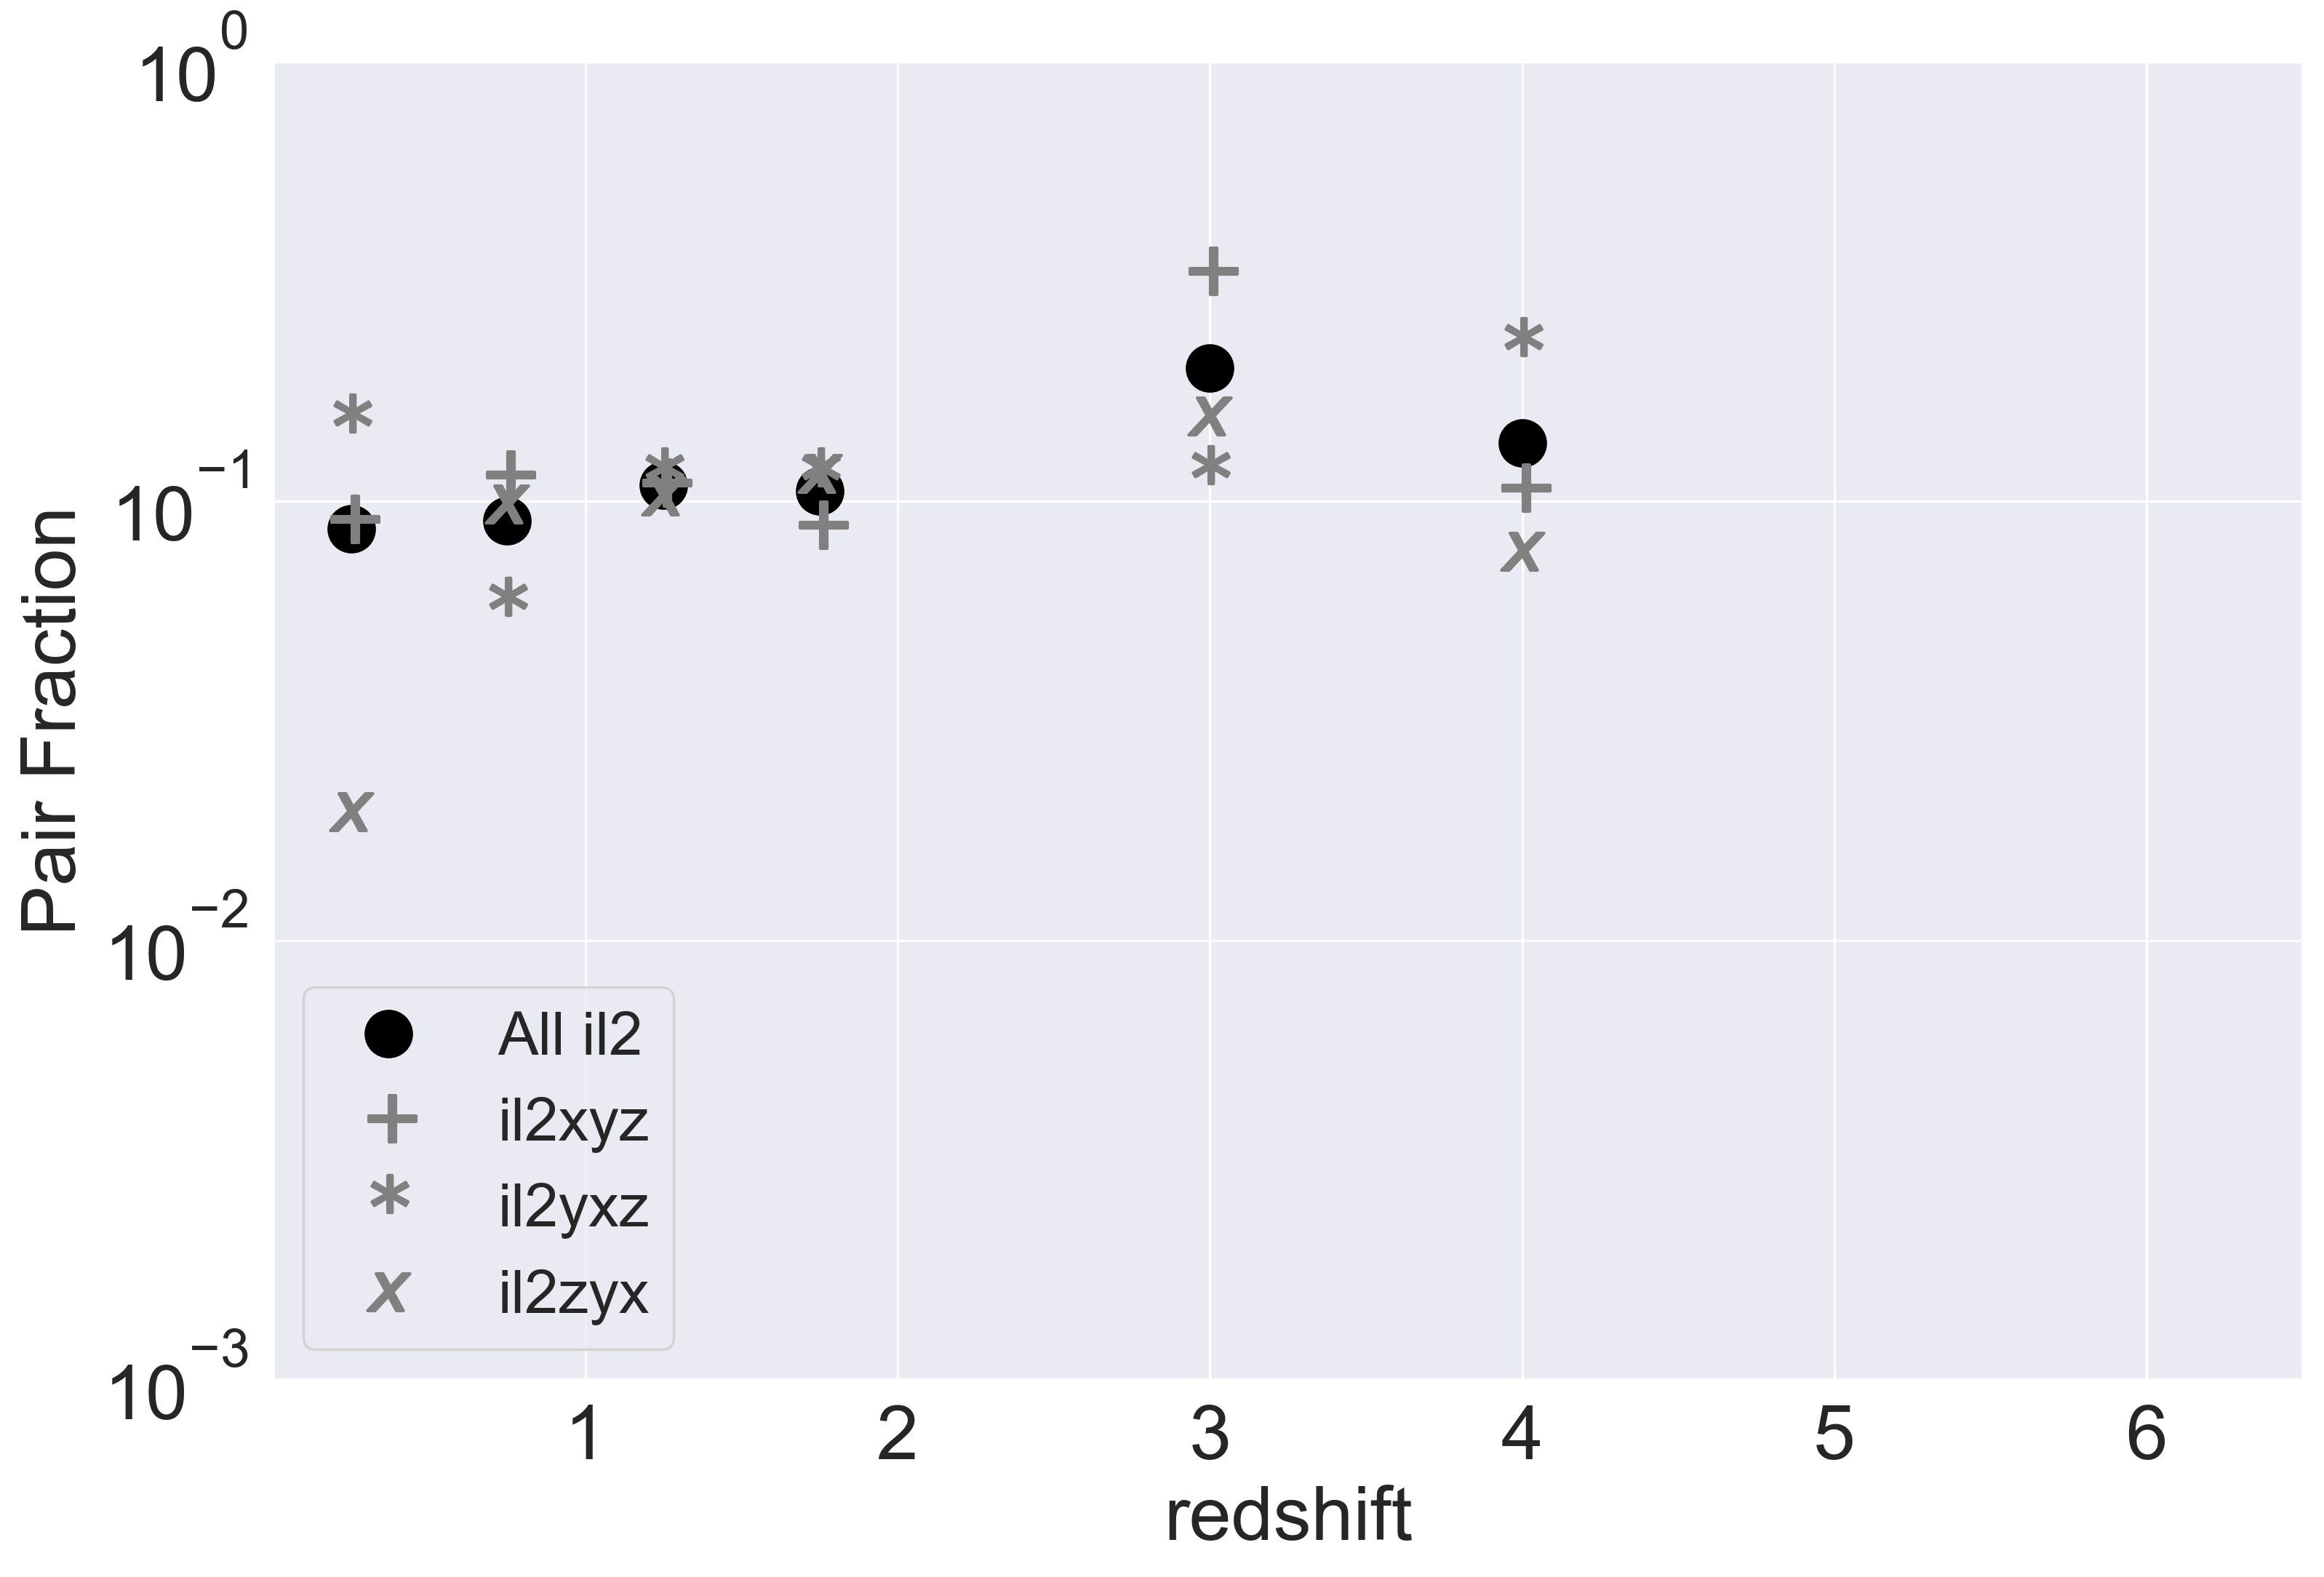

In [54]:
xyz_info = pairs_plots(dash1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot2)
yxz_info = pairs_plots(dash1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot2)
zyx_info = pairs_plots(dash1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot2)

xyz_infoil1 = pairs_plots(il1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot2)
yxz_infoil1 = pairs_plots(il1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot2)
zyx_infoil1 = pairs_plots(il1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot2)

xyz_infoil2 = pairs_plots(il2xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot2)
yxz_infoil2 = pairs_plots(il2yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot2)
zyx_infoil2 = pairs_plots(il2zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'Inferred z',zbins=bins_for_plot2)

all_ = all_plot(xyz_info,yxz_info,zyx_info)
allil1 = all_plot(xyz_infoil1,yxz_infoil1,zyx_infoil1)
allil2 = all_plot(xyz_infoil2,yxz_infoil2,zyx_infoil2)

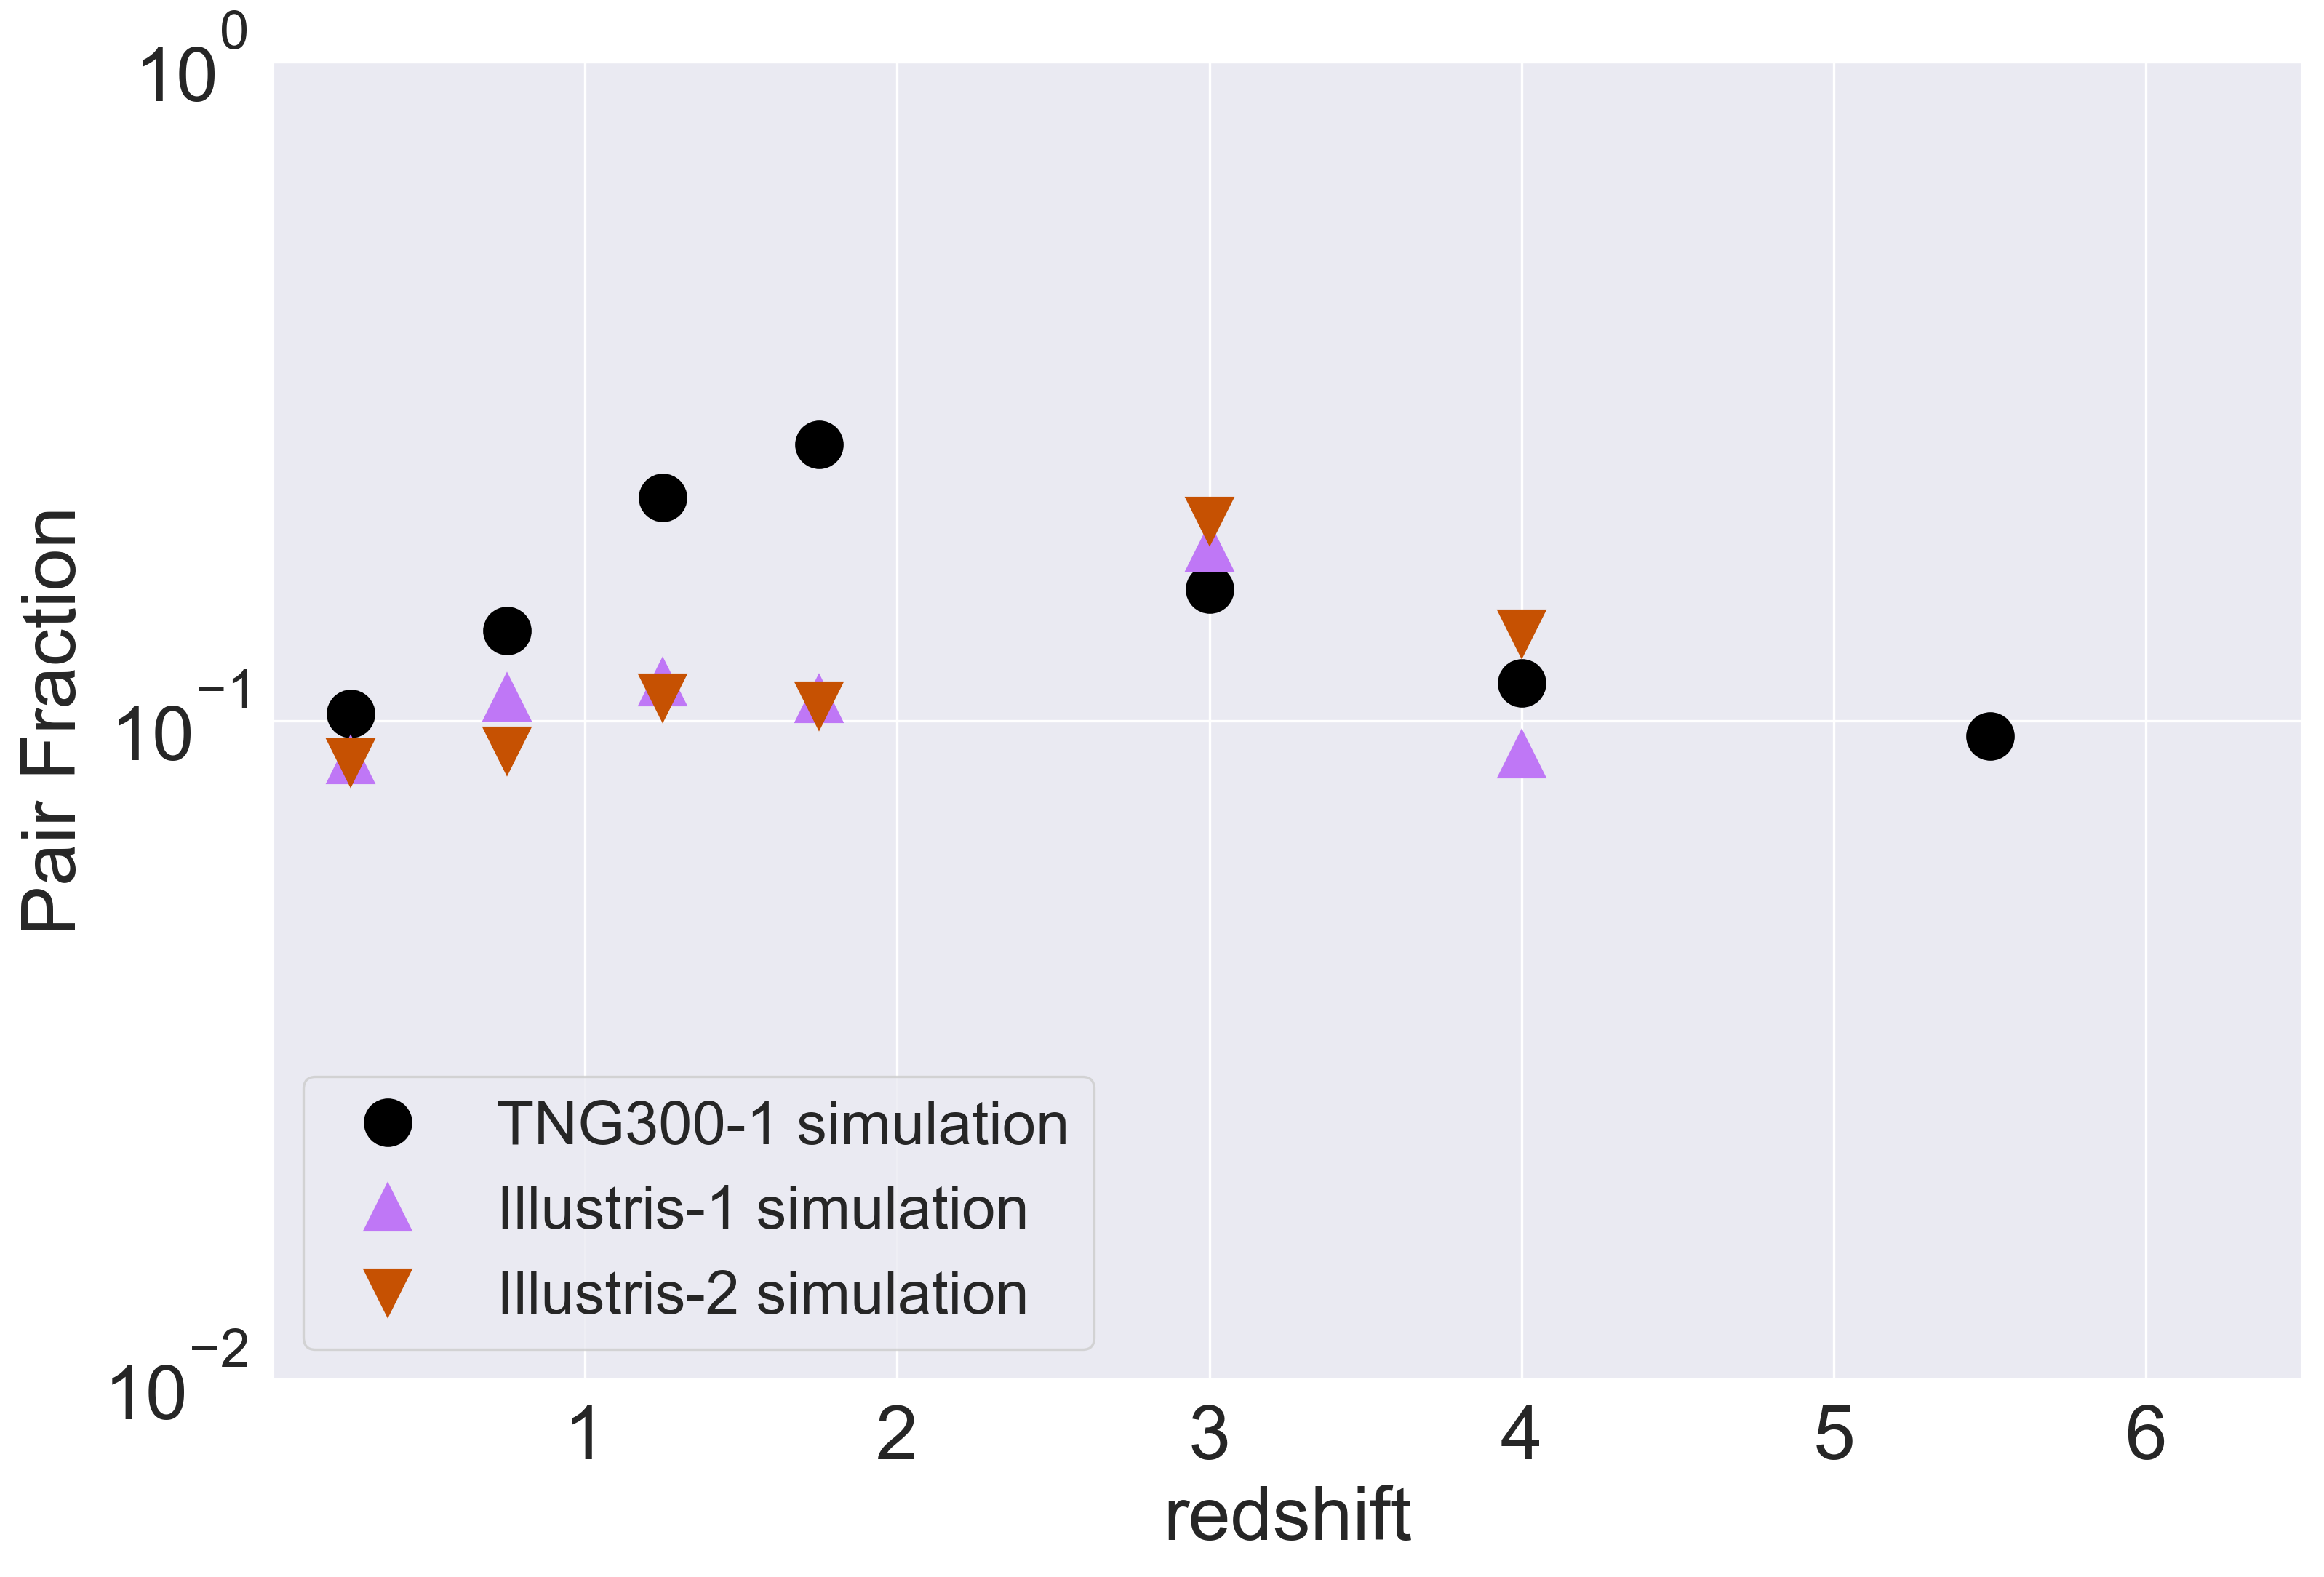

In [55]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(12, 8),dpi=300)
ax1.plot(all_[1],all_[0],marker='o',linestyle='None',markersize=15,color='Black',label=('TNG300-1 simulation'))
ax1.plot(allil1[1],allil1[0],marker='^',linestyle='None',markersize=15,color='xkcd:light purple',label=('Illustris-1 simulation'))
ax1.plot(allil2[1],allil2[0],marker='v',linestyle='None',markersize=15,color='xkcd:dark orange',label=('Illustris-2 simulation'))
#ax1.errorbar(obs_info[0], obs_info[1], yerr=obs_info[2], marker='o', linestyle='None', markersize=10, color='red', label = 'Observational data')
ax1.legend(loc='lower left',fontsize=20)

ax1.set_xlabel('redshift',size=25)
ax1.set_xlim(bins_for_plot[0][0], 6.5)
ax1.set_ylabel('Pair Fraction',size=25)
ax1.set_ylim([0.01, 1])
ax1.set_yscale('log')

ax1.tick_params(labelsize=25)
plt.show()